In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import encoder

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, roc_auc_score

import seaborn as sns; sns.set()

NomeBase = "Galah"

Loaded  10 encoders.


In [2]:
from keras.layers import Input, Dense, LeakyReLU
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard
from keras import regularizers

import math
import keras
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from keras.models import Model

from pympler import muppy, summary

In [3]:
def print_memory_summary():
    all_objects = muppy.get_objects()
    sum1 = summary.summarize(all_objects)
    summary.print_(sum1)

## Modelos para treinamento

In [3]:
def training_model():
    input_x0 = Input(shape=(66,), name='inp0')
    encoded0 = Dense(224, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(input_x0)
    a0=LeakyReLU(alpha=0.1)(encoded0)
    encoded1 = Dense(320, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a0)
    a1=LeakyReLU(alpha=0.1)(encoded1)
    encoded2 = Dense(608, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a1)
    a2=LeakyReLU(alpha=0.1)(encoded2)
    encoded3 = Dense(320, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a2)
    a3=LeakyReLU(alpha=0.1)(encoded3)
    encoded4 = Dense(128, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a3)
    a4=LeakyReLU(alpha=0.1)(encoded4)
    encoded5 = Dense(64, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a4)
    a5=LeakyReLU(alpha=0.1)(encoded5)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "HeUniform", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

# Dwarfs

In [4]:
AouG = "Dwarfs"
NomeBase = "Galah"

In [5]:
AnasCores = pd.read_csv(f"E:\\IC\\BasesTreino\\{NomeBase}-Colors-{AouG}.csv", index_col = 'ID')

In [6]:
AnasCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n02n18_0034008   0.3397  0.3683  0.8651  0.9080  1.1441  1.3375   
iDR4_3_SPLUS-n02n18_0031473   0.3475  0.3656  0.9622  1.0294  1.2451  1.3967   
iDR4_3_SPLUS-n02n18_0038116   0.3444  0.4102  0.9300  0.9854  1.2357  1.4309   
iDR4_3_SPLUS-n02n18_0031473   0.3475  0.3656  0.9622  1.0294  1.2451  1.3967   
iDR4_3_SPLUS-n02n18_0040540   0.2976  0.3801  0.9803  1.0386  1.3613  1.5700   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0166_0019699  0.2592  0.4443  1.0143  1.1275  1.5810  1.7703   
iDR4_3_STRIPE82-0166_0024945  0.3997  0.4424  0.8430  0.9220  1.2176  1.3978   
iDR4_3_STRIPE82-0166_0025420  0.4300  0.4673  0.9081  0.9714  1.3337  1.5328   
iDR4_3_STRIPE82-0166_0005188  0.3807  0.4073  0.9044  0.9798  1.2192  1.3794   
iDR4_3_STRIPE82-0166_0006404  0.3259  0.4067  0.9322  0.9999  1.3489  1.5208   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n02n18_0034008   1.5342  1.5474  1.6532  1.6932  ...   5571.39   
iDR4_3_SPLUS-n02n18_0031473   1.5786  1.5614  1.6406  1.6060  ...   5848.15   
iDR4_3_SPLUS-n02n18_0038116   1.6053  1.6115  1.7318  1.7130  ...   5875.89   
iDR4_3_SPLUS-n02n18_0031473   1.5786  1.5614  1.6406  1.6060  ...   5861.72   
iDR4_3_SPLUS-n02n18_0040540   1.7984  1.8302  1.9513  1.9553  ...   5846.95   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0166_0019699  1.8973  2.1393  2.0126  2.3844  ...   5217.11   
iDR4_3_STRIPE82-0166_0024945  1.6361  1.6588  1.7134  1.7275  ...   5840.85   
iDR4_3_STRIPE82-0166_0025420  1.8208  1.8784  1.9396  2.0069  ...   5458.37   
iDR4_3_STRIPE82-0166_0005188  1.6216  1.6405  1.7150  1.7126  ...   5824.64   
iDR4_3_STRIPE82-0166_0006404  1.7715  1.8749  1.8885  1.9898  ...   5634.35   

                              logg_cnn  feh_cnn  alpha_m_cnn     c_fe  \
ID                                                                      
iDR4_3_SPLUS-n02n18_0034008      4.334   -0.640        0.140  0.05902   
iDR4_3_SPLUS-n02n18_0031473      4.414   -0.233        0.025 -0.00765   
iDR4_3_SPLUS-n02n18_0038116      4.185   -0.095        0.008 -0.02354   
iDR4_3_SPLUS-n02n18_0031473      4.371   -0.263        0.036  0.02390   
iDR4_3_SPLUS-n02n18_0040540      4.381   -0.032        0.010  0.03985   
...                                ...      ...          ...      ...   
iDR4_3_STRIPE82-0166_0019699     4.611   -0.253        0.023 -0.00759   
iDR4_3_STRIPE82-0166_0024945     4.351   -0.164        0.016 -0.00716   
iDR4_3_STRIPE82-0166_0025420     3.751   -0.447        0.051  0.06939   
iDR4_3_STRIPE82-0166_0005188     4.346   -0.239        0.029  0.02794   
iDR4_3_STRIPE82-0166_0006404     4.423   -0.291        0.056  0.03668   

                                ca_fe     n_fe    mg_fe    si_fe    ni_fe  
ID                                                                         
iDR4_3_SPLUS-n02n18_0034008   0.17627 -0.04697  0.21311  0.09576 -0.01894  
iDR4_3_SPLUS-n02n18_0031473  -0.00332  0.18771  0.05045  0.02364 -0.01598  
iDR4_3_SPLUS-n02n18_0038116   0.00043  0.10622  0.01526  0.02671  0.02089  
iDR4_3_SPLUS-n02n18_0031473   0.03971  0.10339  0.07745  0.03457  0.01997  
iDR4_3_SPLUS-n02n18_0040540  -0.02785  0.12295  0.04304  0.03549  0.00984  
...                               ...      ...      ...      ...      ...  
iDR4_3_STRIPE82-0166_0019699  0.03142 -0.15014  0.04740 -0.01393 -0.02637  
iDR4_3_STRIPE82-0166_0024945  0.04263  0.08796  0.03482  0.01930 -0.02507  
iDR4_3_STRIPE82-0166_0025420  0.08622  0.02988  0.07714  0.02860  0.05118  
iDR4_3_STRIPE82-0166_0005188  0.00159 -0.08244  0.05066  0.03969 -0.03031  
iDR4_3_STRIPE82-0166_0006404  0.04206 -0.03473  0.10007  0.04562  0.01225  

[4064 rows x 76 column

In [8]:
print('TEFF =', AnasCores['teff_cnn'].min())
print('LOGG = ', AnasCores['logg_cnn'].min())
print('Feh = ', AnasCores['feh_cnn'].min())
print('Alpha = ', AnasCores['alpha_m_cnn'].min())

print('cfe =', AnasCores['c_fe'].min())
print('cafe = ', AnasCores['ca_fe'].min())
print('nfe = ', AnasCores['n_fe'].min())
print('mgfe = ', AnasCores['mg_fe'].min())
print('sife = ', AnasCores['si_fe'].min())
print('nife = ', AnasCores['ni_fe'].min())

TEFF = 4025.68
LOGG =  3.341
Feh =  -1.398
Alpha =  -0.135
cfe = -0.24814
cafe =  -0.45868
nfe =  -0.24572
mgfe =  -0.29935
sife =  -0.17489
nife =  -0.2868


In [9]:
AnasCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n02n18_0034008   0.3397  0.3683  0.8651  0.9080  1.1441  1.3375   
iDR4_3_SPLUS-n02n18_0031473   0.3475  0.3656  0.9622  1.0294  1.2451  1.3967   
iDR4_3_SPLUS-n02n18_0038116   0.3444  0.4102  0.9300  0.9854  1.2357  1.4309   
iDR4_3_SPLUS-n02n18_0031473   0.3475  0.3656  0.9622  1.0294  1.2451  1.3967   
iDR4_3_SPLUS-n02n18_0040540   0.2976  0.3801  0.9803  1.0386  1.3613  1.5700   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0166_0019699  0.2592  0.4443  1.0143  1.1275  1.5810  1.7703   
iDR4_3_STRIPE82-0166_0024945  0.3997  0.4424  0.8430  0.9220  1.2176  1.3978   
iDR4_3_STRIPE82-0166_0025420  0.4300  0.4673  0.9081  0.9714  1.3337  1.5328   
iDR4_3_STRIPE82-0166_0005188  0.3807  0.4073  0.9044  0.9798  1.2192  1.3794   
iDR4_3_STRIPE82-0166_0006404  0.3259  0.4067  0.9322  0.9999  1.3489  1.5208   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n02n18_0034008   1.5342  1.5474  1.6532  1.6932  ...   5571.39   
iDR4_3_SPLUS-n02n18_0031473   1.5786  1.5614  1.6406  1.6060  ...   5848.15   
iDR4_3_SPLUS-n02n18_0038116   1.6053  1.6115  1.7318  1.7130  ...   5875.89   
iDR4_3_SPLUS-n02n18_0031473   1.5786  1.5614  1.6406  1.6060  ...   5861.72   
iDR4_3_SPLUS-n02n18_0040540   1.7984  1.8302  1.9513  1.9553  ...   5846.95   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0166_0019699  1.8973  2.1393  2.0126  2.3844  ...   5217.11   
iDR4_3_STRIPE82-0166_0024945  1.6361  1.6588  1.7134  1.7275  ...   5840.85   
iDR4_3_STRIPE82-0166_0025420  1.8208  1.8784  1.9396  2.0069  ...   5458.37   
iDR4_3_STRIPE82-0166_0005188  1.6216  1.6405  1.7150  1.7126  ...   5824.64   
iDR4_3_STRIPE82-0166_0006404  1.7715  1.8749  1.8885  1.9898  ...   5634.35   

                              logg_cnn  feh_cnn  alpha_m_cnn     c_fe  \
ID                                                                      
iDR4_3_SPLUS-n02n18_0034008      4.334   -0.640        0.140  0.05902   
iDR4_3_SPLUS-n02n18_0031473      4.414   -0.233        0.025 -0.00765   
iDR4_3_SPLUS-n02n18_0038116      4.185   -0.095        0.008 -0.02354   
iDR4_3_SPLUS-n02n18_0031473      4.371   -0.263        0.036  0.02390   
iDR4_3_SPLUS-n02n18_0040540      4.381   -0.032        0.010  0.03985   
...                                ...      ...          ...      ...   
iDR4_3_STRIPE82-0166_0019699     4.611   -0.253        0.023 -0.00759   
iDR4_3_STRIPE82-0166_0024945     4.351   -0.164        0.016 -0.00716   
iDR4_3_STRIPE82-0166_0025420     3.751   -0.447        0.051  0.06939   
iDR4_3_STRIPE82-0166_0005188     4.346   -0.239        0.029  0.02794   
iDR4_3_STRIPE82-0166_0006404     4.423   -0.291        0.056  0.03668   

                                ca_fe     n_fe    mg_fe    si_fe    ni_fe  
ID                                                                         
iDR4_3_SPLUS-n02n18_0034008   0.17627 -0.04697  0.21311  0.09576 -0.01894  
iDR4_3_SPLUS-n02n18_0031473  -0.00332  0.18771  0.05045  0.02364 -0.01598  
iDR4_3_SPLUS-n02n18_0038116   0.00043  0.10622  0.01526  0.02671  0.02089  
iDR4_3_SPLUS-n02n18_0031473   0.03971  0.10339  0.07745  0.03457  0.01997  
iDR4_3_SPLUS-n02n18_0040540  -0.02785  0.12295  0.04304  0.03549  0.00984  
...                               ...      ...      ...      ...      ...  
iDR4_3_STRIPE82-0166_0019699  0.03142 -0.15014  0.04740 -0.01393 -0.02637  
iDR4_3_STRIPE82-0166_0024945  0.04263  0.08796  0.03482  0.01930 -0.02507  
iDR4_3_STRIPE82-0166_0025420  0.08622  0.02988  0.07714  0.02860  0.05118  
iDR4_3_STRIPE82-0166_0005188  0.00159 -0.08244  0.05066  0.03969 -0.03031  
iDR4_3_STRIPE82-0166_0006404  0.04206 -0.03473  0.10007  0.04562  0.01225  

[4064 rows x 76 column

In [10]:
xtrain = AnasCores.iloc[:, :66]

In [11]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [12]:
ytrain = AnasCores[columnYtrain]

In [13]:
ytrain['teffEncoded'] = encoder.encode_DataFrame(pd.DataFrame(ytrain['teff_cnn']), 'teffGalah')

In [14]:
#encoder.save_encoders()

In [15]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

##### Separando base para Treinamento da temperatura, logg e feh

In [16]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [17]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [18]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n02s28_0024382    5863.83     4.149   -0.438        0.136   
iDR4_3_STRIPE82-0024_0040109   5886.29     4.223   -0.192        0.021   
iDR4_3_SPLUS-n01s26_0011164    5833.90     4.186   -0.197        0.016   
iDR4_3_STRIPE82-0168_0030169   5628.83     4.293   -0.265        0.014   
iDR4_3_SPLUS-n05s43_0030378    5505.30     4.278    0.312       -0.029   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0004_0030892   5714.67     4.127   -0.897        0.196   
iDR4_3_SPLUS-n02n44_0028655    5910.35     4.008   -0.449        0.062   
iDR4_3_STRIPE82-0048_0018333   5867.85     4.365   -0.245        0.152   
iDR4_3_STRIPE82-0026_0033157   5646.33     4.319   -0.002       -0.005   
iDR4_3_SPLUS-n05s44_0009627    5603.38     4.235   -0.314        0.162   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n02s28_0024382   0.08000  0.08117  0.05482  0.19230  0.12617   
iDR4_3_STRIPE82-0024_0040109  0.04634  0.00635  0.13555  0.03607  0.02003   
iDR4_3_SPLUS-n01s26_0011164   0.01951  0.02248 -0.00912  0.03087  0.01324   
iDR4_3_STRIPE82-0168_0030169 -0.01721  0.05954 -0.05187  0.04548 -0.03024   
iDR4_3_SPLUS-n05s43_0030378  -0.05027 -0.06468  0.26555 -0.03097  0.02786   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0004_0030892  0.24237  0.16171  0.06538  0.25412  0.18343   
iDR4_3_SPLUS-n02n44_0028655   0.00484  0.06539  0.14547  0.08856  0.05541   
iDR4_3_STRIPE82-0048_0018333  0.10387  0.10507  0.23299  0.23443  0.15001   
iDR4_3_STRIPE82-0026_0033157  0.00953 -0.01291  0.31148  0.03218 -0.00939   
iDR4_3_SPLUS-n05s44_0009627   0.17746  0.17021  0.04441  0.24426  0.14131   

                                ni_fe  teffEncoded  
ID                                                  
iDR4_3_SPLUS-n02s28_0024382   0.03700     0.489768  
iDR4_3_STRIPE82-0024_0040109 -0.00277     0.507971  
iDR4_3_SPLUS-n01s26_0011164   0.00809     0.465510  
iDR4_3_STRIPE82-0168_0030169  0.02231     0.299307  
iDR4_3_SPLUS-n05s43_0030378   0.05162     0.199190  
...                               ...          ...  
iDR4_3_STRIPE82-0004_0030892  0.06915     0.368878  
iDR4_3_SPLUS-n02n44_0028655  -0.03434     0.527471  
iDR4_3_STRIPE82-0048_0018333  0.04617     0.493026  
iDR4_3_STRIPE82-0026_0033157  0.03679     0.313490  
iDR4_3_SPLUS-n05s44_0009627   0.08938     0.278681  

[2925 rows x 11 columns]

### Teff

In [19]:
Parametro = "TEFF"
columnTrain = 'teffEncoded'

AouG = "Dwarfs"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [35]:
modelTEFF = training_model()

In [36]:
# Training model
historyTEFF = modelTEFF.fit(X_train, Y_train[[columnTrain]], epochs = 3000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000


1/1 - 1s - loss: 0.3293 - val_loss: 0.2806 - 685ms/epoch - 685ms/step
Epoch 2/3000
1/1 - 0s - loss: 0.2660 - val_loss: 0.2188 - 88ms/epoch - 88ms/step
Epoch 3/3000
1/1 - 0s - loss: 0.2128 - val_loss: 0.1986 - 83ms/epoch - 83ms/step
Epoch 4/3000
1/1 - 0s - loss: 0.1975 - val_loss: 0.1892 - 71ms/epoch - 71ms/step
Epoch 5/3000
1/1 - 0s - loss: 0.1898 - val_loss: 0.1874 - 68ms/epoch - 68ms/step
Epoch 6/3000
1/1 - 0s - loss: 0.1883 - val_loss: 0.1939 - 69ms/epoch - 69ms/step
Epoch 7/3000
1/1 - 0s - loss: 0.1946 - val_loss: 0.1968 - 53ms/epoch - 53ms/step
Epoch 8/3000
1/1 - 0s - loss: 0.1965 - val_loss: 0.1947 - 58ms/epoch - 58ms/step
Epoch 9/3000
1/1 - 0s - loss: 0.1936 - val_loss: 0.1918 - 62ms/epoch - 62ms/step
Epoch 10/3000
1/1 - 0s - loss: 0.1905 - val_loss: 0.1882 - 60ms/epoch - 60ms/step
Epoch 11/3000
1/1 - 0s - loss: 0.1873 - val_loss: 0.1827 - 52ms/epoch - 52ms/step
Epoch 12/3000
1/1 - 0s - loss: 0.1827 - val_loss: 0.1779 - 52ms/epoch - 52ms/step
Epoch 13/3000
1/1 - 0s - loss: 0.178

Text(0, 0.5, 'Loss')

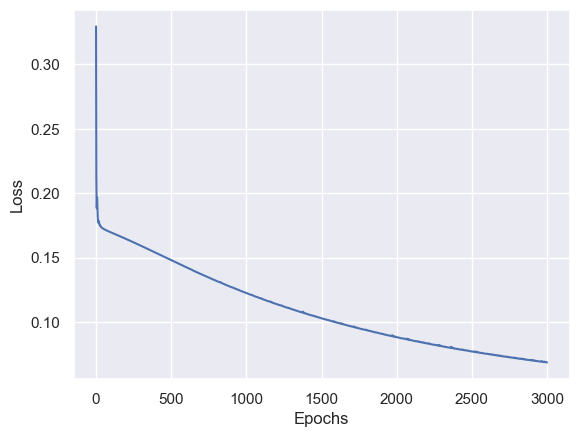

In [37]:
# Verify if is training correctly
plt.plot(historyTEFF.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

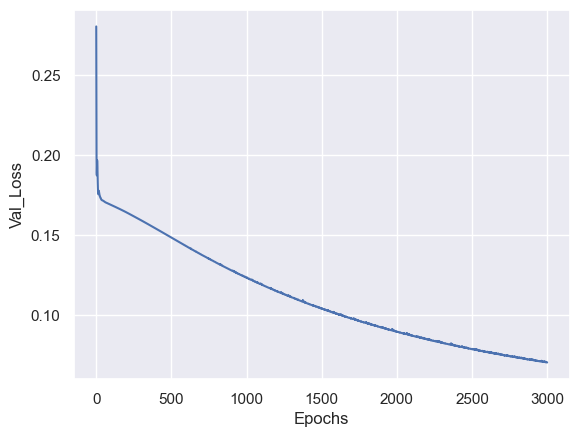

In [38]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyTEFF.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [44]:
modelTEFF.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\TEFF-Dwarfs.h5


In [39]:
predTeff = modelTEFF.predict(X_test)

26/26 [==============================] - 0s 3ms/step


In [40]:
predaux = encoder.decode_DataFrame(predTeff, 'teffGalah')
Y_test['TEFF_PredictDecoded'] = predaux

In [41]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0038417   4921.37     4.651   -0.181        0.005   
iDR4_3_SPLUS-n06s42_0007379    6030.42     4.245    0.130       -0.008   
iDR4_3_STRIPE82-0132_0036437   5819.09     4.285   -0.549        0.182   
iDR4_3_STRIPE82-0004_0008822   5544.12     4.224   -0.151        0.115   
iDR4_3_SPLUS-n02s28_0005543    6092.42     4.536   -0.048       -0.021   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0004_0017908   6040.59     4.168   -0.192        0.037   
iDR4_3_STRIPE82-0001_0018941   5714.94     4.069    0.052        0.003   
iDR4_3_STRIPE82-0024_0032338   5304.86     4.456   -0.138        0.064   
iDR4_3_SPLUS-n06s42_0023601    5391.21     4.178    0.211       -0.013   
iDR4_3_SPLUS-n04s43_0004434    5591.29     4.069   -0.129        0.004   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0024_0038417 -0.04975 -0.01964 -0.00570  0.00842 -0.07885   
iDR4_3_SPLUS-n06s42_0007379   0.01449 -0.04694  0.23062 -0.02586  0.02393   
iDR4_3_STRIPE82-0132_0036437  0.20548  0.04547  0.07696  0.31184  0.16932   
iDR4_3_STRIPE82-0004_0008822  0.13684  0.03922  0.08200  0.21118  0.11384   
iDR4_3_SPLUS-n02s28_0005543  -0.01856 -0.06742  0.27131 -0.03767 -0.01378   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0004_0017908  0.06951  0.03663  0.05333  0.05084  0.04985   
iDR4_3_STRIPE82-0001_0018941  0.01061  0.00962  0.16620  0.01764  0.01869   
iDR4_3_STRIPE82-0024_0032338  0.02239  0.06251 -0.05183  0.12319  0.02592   
iDR4_3_SPLUS-n06s42_0023601   0.01314 -0.01790  0.12130  0.00432  0.01938   
iDR4_3_SPLUS-n04s43_0004434   0.01163  0.01534  0.09806  0.02079 -0.00273   

                                ni_fe  teffEncoded  TEFF_PredictDecoded  
ID                                                                       
iDR4_3_STRIPE82-0024_0038417 -0.04684    -0.274069          4970.353516  
iDR4_3_SPLUS-n06s42_0007379   0.05594     0.624784          5904.667969  
iDR4_3_STRIPE82-0132_0036437  0.05811     0.453507          5738.497070  
iDR4_3_STRIPE82-0004_0008822  0.07739     0.230652          5588.700684  
iDR4_3_SPLUS-n02s28_0005543  -0.01454     0.675033          5844.033691  
...                               ...          ...                  ...  
iDR4_3_STRIPE82-0004_0017908  0.02317     0.633027          6135.777344  
iDR4_3_STRIPE82-0001_0018941  0.03555     0.369097          5563.619629  
iDR4_3_STRIPE82-0024_0032338  0.01970     0.036739          5264.395020  
iDR4_3_SPLUS-n06s42_0023601   0.07138     0.106723          5383.046875  
iDR4_3_SPLUS-n04s43_0004434  -0.01214     0.268882          5556.528320  

[813 rows x 12 columns]

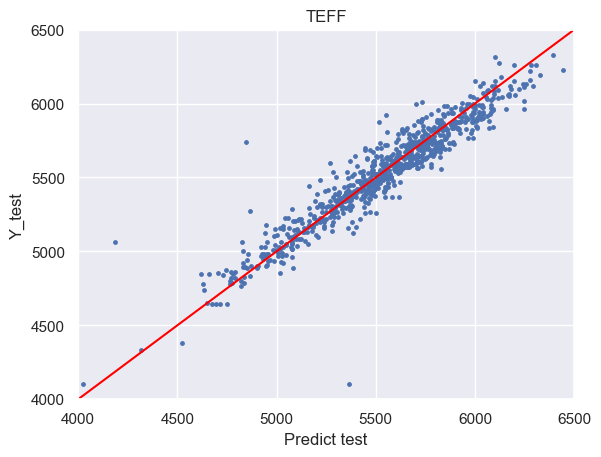

In [42]:
plt.scatter(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'], s=6)
plt.title(Parametro)
plt.xlim(4000, 6500)
plt.ylim(4000, 6500)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([4000, 7000], [4000, 7000], c='red')

In [43]:
score = r2_score(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 90.0%


In [45]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0038417   4921.37     4.651   -0.181        0.005   
iDR4_3_SPLUS-n06s42_0007379    6030.42     4.245    0.130       -0.008   
iDR4_3_STRIPE82-0132_0036437   5819.09     4.285   -0.549        0.182   
iDR4_3_STRIPE82-0004_0008822   5544.12     4.224   -0.151        0.115   
iDR4_3_SPLUS-n02s28_0005543    6092.42     4.536   -0.048       -0.021   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0004_0017908   6040.59     4.168   -0.192        0.037   
iDR4_3_STRIPE82-0001_0018941   5714.94     4.069    0.052        0.003   
iDR4_3_STRIPE82-0024_0032338   5304.86     4.456   -0.138        0.064   
iDR4_3_SPLUS-n06s42_0023601    5391.21     4.178    0.211       -0.013   
iDR4_3_SPLUS-n04s43_0004434    5591.29     4.069   -0.129        0.004   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0024_0038417 -0.04975 -0.01964 -0.00570  0.00842 -0.07885   
iDR4_3_SPLUS-n06s42_0007379   0.01449 -0.04694  0.23062 -0.02586  0.02393   
iDR4_3_STRIPE82-0132_0036437  0.20548  0.04547  0.07696  0.31184  0.16932   
iDR4_3_STRIPE82-0004_0008822  0.13684  0.03922  0.08200  0.21118  0.11384   
iDR4_3_SPLUS-n02s28_0005543  -0.01856 -0.06742  0.27131 -0.03767 -0.01378   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0004_0017908  0.06951  0.03663  0.05333  0.05084  0.04985   
iDR4_3_STRIPE82-0001_0018941  0.01061  0.00962  0.16620  0.01764  0.01869   
iDR4_3_STRIPE82-0024_0032338  0.02239  0.06251 -0.05183  0.12319  0.02592   
iDR4_3_SPLUS-n06s42_0023601   0.01314 -0.01790  0.12130  0.00432  0.01938   
iDR4_3_SPLUS-n04s43_0004434   0.01163  0.01534  0.09806  0.02079 -0.00273   

                                ni_fe  teffEncoded  TEFF_PredictDecoded  
ID                                                                       
iDR4_3_STRIPE82-0024_0038417 -0.04684    -0.274069          4970.353516  
iDR4_3_SPLUS-n06s42_0007379   0.05594     0.624784          5904.667969  
iDR4_3_STRIPE82-0132_0036437  0.05811     0.453507          5738.497070  
iDR4_3_STRIPE82-0004_0008822  0.07739     0.230652          5588.700684  
iDR4_3_SPLUS-n02s28_0005543  -0.01454     0.675033          5844.033691  
...                               ...          ...                  ...  
iDR4_3_STRIPE82-0004_0017908  0.02317     0.633027          6135.777344  
iDR4_3_STRIPE82-0001_0018941  0.03555     0.369097          5563.619629  
iDR4_3_STRIPE82-0024_0032338  0.01970     0.036739          5264.395020  
iDR4_3_SPLUS-n06s42_0023601   0.07138     0.106723          5383.046875  
iDR4_3_SPLUS-n04s43_0004434  -0.01214     0.268882          5556.528320  

[813 rows x 12 columns]

In [46]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Logg

In [59]:
Parametro = "LOGG"
columnTrain = 'logg_cnn'

AouG = "Dwarfs"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [60]:
modelLOGG = training_model()

In [61]:
# Treinando e guardando o modelo
historyLOGG = modelLOGG.fit(X_train, Y_train[[columnTrain]], epochs = 5000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/5000


1/1 - 1s - loss: 26.8966 - val_loss: 23.8677 - 655ms/epoch - 655ms/step
Epoch 2/5000
1/1 - 0s - loss: 23.6989 - val_loss: 21.0671 - 58ms/epoch - 58ms/step
Epoch 3/5000
1/1 - 0s - loss: 20.8304 - val_loss: 18.5711 - 53ms/epoch - 53ms/step
Epoch 4/5000
1/1 - 0s - loss: 18.2730 - val_loss: 16.3427 - 48ms/epoch - 48ms/step
Epoch 5/5000
1/1 - 0s - loss: 16.0042 - val_loss: 14.3654 - 47ms/epoch - 47ms/step
Epoch 6/5000
1/1 - 0s - loss: 13.9999 - val_loss: 12.6594 - 48ms/epoch - 48ms/step
Epoch 7/5000
1/1 - 0s - loss: 12.2718 - val_loss: 11.1736 - 47ms/epoch - 47ms/step
Epoch 8/5000
1/1 - 0s - loss: 10.7595 - val_loss: 9.8888 - 48ms/epoch - 48ms/step
Epoch 9/5000
1/1 - 0s - loss: 9.4573 - val_loss: 8.8119 - 53ms/epoch - 53ms/step
Epoch 10/5000
1/1 - 0s - loss: 8.3686 - val_loss: 7.8488 - 45ms/epoch - 45ms/step
Epoch 11/5000
1/1 - 0s - loss: 7.3995 - val_loss: 6.9582 - 62ms/epoch - 62ms/step
Epoch 12/5000
1/1 - 0s - loss: 6.5086 - val_loss: 6.1327 - 47ms/epoch - 47ms/step
Epoch 13/5000
1/1 - 0

Text(0, 0.5, 'Loss')

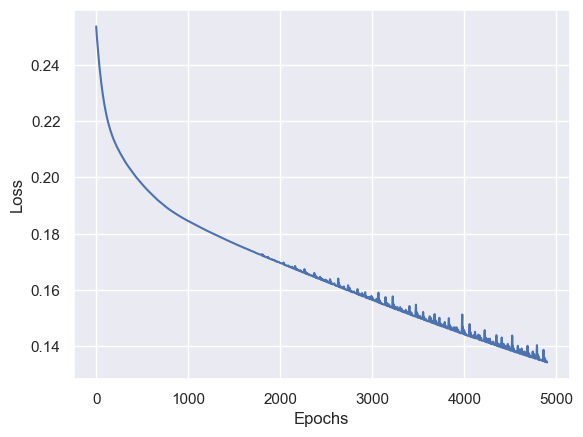

In [62]:
# plota as loss para ver se está treinando
plt.plot(historyLOGG.history['loss'][100:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

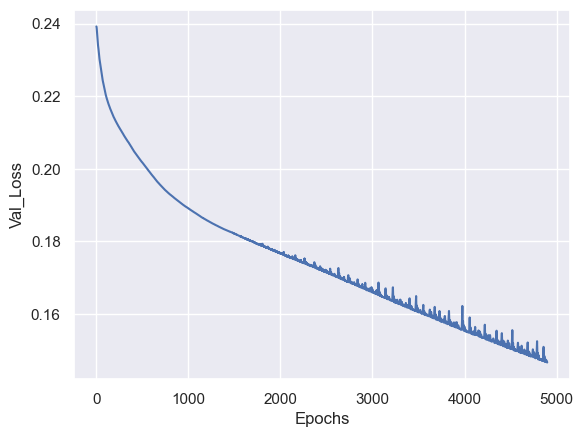

In [63]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyLOGG.history['val_loss'][100:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [64]:
modelLOGG.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\LOGG-Dwarfs.h5


In [65]:
predlogg = modelLOGG.predict(X_test)

15/26 [================>.............] - ETA: 0s

26/26 [==============================] - 0s 3ms/step


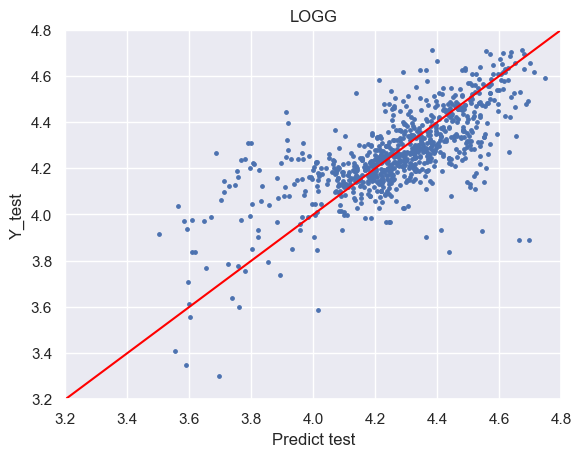

In [66]:
plt.scatter(Y_test[[columnTrain]], predlogg, s=6)
plt.title(Parametro)
plt.xlim(3.2, 4.8)
plt.ylim(3.2, 4.8)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([3, 5], [3, 5], c='red')

plt.grid(True)

In [67]:
score = r2_score(Y_test[columnTrain], predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 49.0%


In [68]:
Y_test['LOGG_Predict'] = predlogg

In [69]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0038417   4921.37     4.651   -0.181        0.005   
iDR4_3_SPLUS-n06s42_0007379    6030.42     4.245    0.130       -0.008   
iDR4_3_STRIPE82-0132_0036437   5819.09     4.285   -0.549        0.182   
iDR4_3_STRIPE82-0004_0008822   5544.12     4.224   -0.151        0.115   
iDR4_3_SPLUS-n02s28_0005543    6092.42     4.536   -0.048       -0.021   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0004_0017908   6040.59     4.168   -0.192        0.037   
iDR4_3_STRIPE82-0001_0018941   5714.94     4.069    0.052        0.003   
iDR4_3_STRIPE82-0024_0032338   5304.86     4.456   -0.138        0.064   
iDR4_3_SPLUS-n06s42_0023601    5391.21     4.178    0.211       -0.013   
iDR4_3_SPLUS-n04s43_0004434    5591.29     4.069   -0.129        0.004   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0024_0038417 -0.04975 -0.01964 -0.00570  0.00842 -0.07885   
iDR4_3_SPLUS-n06s42_0007379   0.01449 -0.04694  0.23062 -0.02586  0.02393   
iDR4_3_STRIPE82-0132_0036437  0.20548  0.04547  0.07696  0.31184  0.16932   
iDR4_3_STRIPE82-0004_0008822  0.13684  0.03922  0.08200  0.21118  0.11384   
iDR4_3_SPLUS-n02s28_0005543  -0.01856 -0.06742  0.27131 -0.03767 -0.01378   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0004_0017908  0.06951  0.03663  0.05333  0.05084  0.04985   
iDR4_3_STRIPE82-0001_0018941  0.01061  0.00962  0.16620  0.01764  0.01869   
iDR4_3_STRIPE82-0024_0032338  0.02239  0.06251 -0.05183  0.12319  0.02592   
iDR4_3_SPLUS-n06s42_0023601   0.01314 -0.01790  0.12130  0.00432  0.01938   
iDR4_3_SPLUS-n04s43_0004434   0.01163  0.01534  0.09806  0.02079 -0.00273   

                                ni_fe  teffEncoded  TEFF_PredictDecoded  \
ID                                                                        
iDR4_3_STRIPE82-0024_0038417 -0.04684    -0.274069          4970.353516   
iDR4_3_SPLUS-n06s42_0007379   0.05594     0.624784          5904.667969   
iDR4_3_STRIPE82-0132_0036437  0.05811     0.453507          5738.497070   
iDR4_3_STRIPE82-0004_0008822  0.07739     0.230652          5588.700684   
iDR4_3_SPLUS-n02s28_0005543  -0.01454     0.675033          5844.033691   
...                               ...          ...                  ...   
iDR4_3_STRIPE82-0004_0017908  0.02317     0.633027          6135.777344   
iDR4_3_STRIPE82-0001_0018941  0.03555     0.369097          5563.619629   
iDR4_3_STRIPE82-0024_0032338  0.01970     0.036739          5264.395020   
iDR4_3_SPLUS-n06s42_0023601   0.07138     0.106723          5383.046875   
iDR4_3_SPLUS-n04s43_0004434  -0.01214     0.268882          5556.528320   

                              LOGG_Predict  
ID                                          
iDR4_3_STRIPE82-0024_0038417      4.655734  
iDR4_3_SPLUS-n06s42_0007379       3.965398  
iDR4_3_STRIPE82-0132_0036437      4.210884  
iDR4_3_STRIPE82-0004_0008822      4.248859  
iDR4_3_SPLUS-n02s28_0005543       4.251205  
...                                    ...  
iDR4_3_STRIPE82-0004_0017908      4.192989  
iDR4_3_STRIPE82-0001_0018941      4.176312  
iDR4_3_STRIPE82-0024_0032338      4.467935  
iDR4_3_SPLUS-n06s42_0023601       4.107751  
iDR4_3_SPLUS-n04s43_0004434       4.366136  

[813 rows x 13 columns]

In [70]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### FEH

In [71]:
Parametro = "FEH"
columnTrain = 'feh_cnn'

AouG = "Dwarfs"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [72]:
modelFEH = training_model()

In [73]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyFEH = modelFEH.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 0.2559 - val_loss: 0.2363 - 675ms/epoch - 675ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.2403 - val_loss: 0.2319 - 54ms/epoch - 54ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.2364 - val_loss: 0.2080 - 51ms/epoch - 51ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.2101 - val_loss: 0.2066 - 44ms/epoch - 44ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.2083 - val_loss: 0.2143 - 46ms/epoch - 46ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.2168 - val_loss: 0.2107 - 46ms/epoch - 46ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.2135 - val_loss: 0.2013 - 42ms/epoch - 42ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.2040 - val_loss: 0.1968 - 42ms/epoch - 42ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.1993 - val_loss: 0.1982 - 44ms/epoch - 44ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.2009 - val_loss: 0.1991 - 52ms/epoch - 52ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.2021 - val_loss: 0.1958 - 43ms/epoch - 43ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.1991 - val_loss: 0.1909 - 45ms/epoch - 45ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.194

Text(0, 0.5, 'Loss')

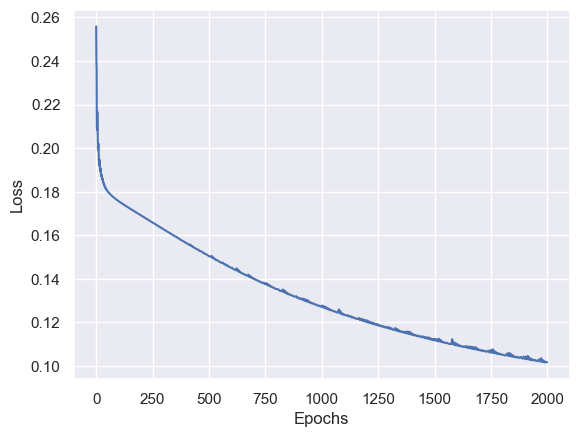

In [74]:
# plota as loss para ver se está treinando
plt.plot(historyFEH.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

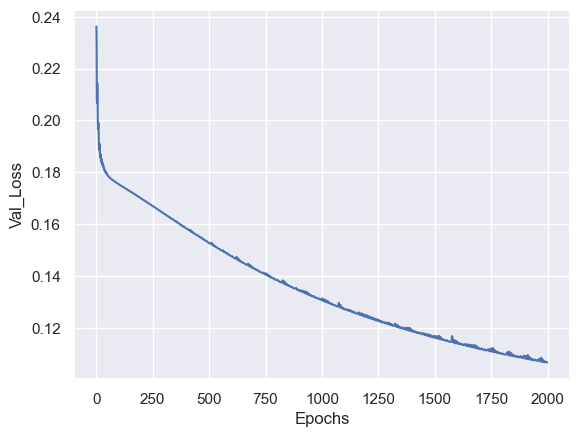

In [75]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyFEH.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [76]:
modelFEH.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\FEH-Dwarfs.h5


In [77]:
predfeh = modelFEH.predict(X_test)

26/26 [==============================] - 0s 4ms/step


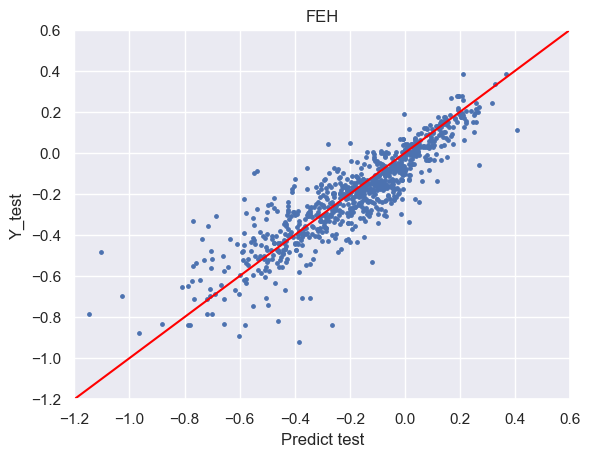

In [78]:
plt.scatter(Y_test[[columnTrain]], predfeh, s=6)
plt.title(Parametro)
plt.xlim(-1.2, 0.6)
plt.ylim(-1.2, 0.6)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([-2, 1], [-2, 1], c='red')

In [79]:
score = r2_score(Y_test[columnTrain], predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 79.0%


In [80]:
Y_test['FEH_Predict'] = predfeh

In [81]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0038417   4921.37     4.651   -0.181        0.005   
iDR4_3_SPLUS-n06s42_0007379    6030.42     4.245    0.130       -0.008   
iDR4_3_STRIPE82-0132_0036437   5819.09     4.285   -0.549        0.182   
iDR4_3_STRIPE82-0004_0008822   5544.12     4.224   -0.151        0.115   
iDR4_3_SPLUS-n02s28_0005543    6092.42     4.536   -0.048       -0.021   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0004_0017908   6040.59     4.168   -0.192        0.037   
iDR4_3_STRIPE82-0001_0018941   5714.94     4.069    0.052        0.003   
iDR4_3_STRIPE82-0024_0032338   5304.86     4.456   -0.138        0.064   
iDR4_3_SPLUS-n06s42_0023601    5391.21     4.178    0.211       -0.013   
iDR4_3_SPLUS-n04s43_0004434    5591.29     4.069   -0.129        0.004   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0024_0038417 -0.04975 -0.01964 -0.00570  0.00842 -0.07885   
iDR4_3_SPLUS-n06s42_0007379   0.01449 -0.04694  0.23062 -0.02586  0.02393   
iDR4_3_STRIPE82-0132_0036437  0.20548  0.04547  0.07696  0.31184  0.16932   
iDR4_3_STRIPE82-0004_0008822  0.13684  0.03922  0.08200  0.21118  0.11384   
iDR4_3_SPLUS-n02s28_0005543  -0.01856 -0.06742  0.27131 -0.03767 -0.01378   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0004_0017908  0.06951  0.03663  0.05333  0.05084  0.04985   
iDR4_3_STRIPE82-0001_0018941  0.01061  0.00962  0.16620  0.01764  0.01869   
iDR4_3_STRIPE82-0024_0032338  0.02239  0.06251 -0.05183  0.12319  0.02592   
iDR4_3_SPLUS-n06s42_0023601   0.01314 -0.01790  0.12130  0.00432  0.01938   
iDR4_3_SPLUS-n04s43_0004434   0.01163  0.01534  0.09806  0.02079 -0.00273   

                                ni_fe  teffEncoded  TEFF_PredictDecoded  \
ID                                                                        
iDR4_3_STRIPE82-0024_0038417 -0.04684    -0.274069          4970.353516   
iDR4_3_SPLUS-n06s42_0007379   0.05594     0.624784          5904.667969   
iDR4_3_STRIPE82-0132_0036437  0.05811     0.453507          5738.497070   
iDR4_3_STRIPE82-0004_0008822  0.07739     0.230652          5588.700684   
iDR4_3_SPLUS-n02s28_0005543  -0.01454     0.675033          5844.033691   
...                               ...          ...                  ...   
iDR4_3_STRIPE82-0004_0017908  0.02317     0.633027          6135.777344   
iDR4_3_STRIPE82-0001_0018941  0.03555     0.369097          5563.619629   
iDR4_3_STRIPE82-0024_0032338  0.01970     0.036739          5264.395020   
iDR4_3_SPLUS-n06s42_0023601   0.07138     0.106723          5383.046875   
iDR4_3_SPLUS-n04s43_0004434  -0.01214     0.268882          5556.528320   

                              LOGG_Predict  FEH_Predict  
ID                                                       
iDR4_3_STRIPE82-0024_0038417      4.655734    -0.155536  
iDR4_3_SPLUS-n06s42_0007379       3.965398     0.100100  
iDR4_3_STRIPE82-0132_0036437      4.210884    -0.424734  
iDR4_3_STRIPE82-0004_0008822      4.248859    -0.125864  
iDR4_3_SPLUS-n02s28_0005543       4.251205    -0.152800  
...                                    ...          ...  
iDR4_3_STRIPE82-0004_0017908      4.192989    -0.110852  
iDR4_3_STRIPE82-0001_0018941      4.176312    -0.238602  
iDR4_3_STRIPE82-0024_0032338      4.467935    -0.140445  
iDR4_3_SPLUS-n06s42_0023601       4.107751     0.255069  
iDR4_3_SPLUS-n04s43_0004434       4.366136    -0.197738  

[813 rows x 14 columns]

In [82]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Outros parametros

In [83]:
AnasCores = pd.read_csv(f"E:\\IC\\BasesTreino\\{NomeBase}-Colors-{AouG}.csv", index_col = 'ID')

In [84]:
AnasCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n02n18_0034008   0.3397  0.3683  0.8651  0.9080  1.1441  1.3375   
iDR4_3_SPLUS-n02n18_0031473   0.3475  0.3656  0.9622  1.0294  1.2451  1.3967   
iDR4_3_SPLUS-n02n18_0038116   0.3444  0.4102  0.9300  0.9854  1.2357  1.4309   
iDR4_3_SPLUS-n02n18_0031473   0.3475  0.3656  0.9622  1.0294  1.2451  1.3967   
iDR4_3_SPLUS-n02n18_0040540   0.2976  0.3801  0.9803  1.0386  1.3613  1.5700   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0166_0019699  0.2592  0.4443  1.0143  1.1275  1.5810  1.7703   
iDR4_3_STRIPE82-0166_0024945  0.3997  0.4424  0.8430  0.9220  1.2176  1.3978   
iDR4_3_STRIPE82-0166_0025420  0.4300  0.4673  0.9081  0.9714  1.3337  1.5328   
iDR4_3_STRIPE82-0166_0005188  0.3807  0.4073  0.9044  0.9798  1.2192  1.3794   
iDR4_3_STRIPE82-0166_0006404  0.3259  0.4067  0.9322  0.9999  1.3489  1.5208   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n02n18_0034008   1.5342  1.5474  1.6532  1.6932  ...   5571.39   
iDR4_3_SPLUS-n02n18_0031473   1.5786  1.5614  1.6406  1.6060  ...   5848.15   
iDR4_3_SPLUS-n02n18_0038116   1.6053  1.6115  1.7318  1.7130  ...   5875.89   
iDR4_3_SPLUS-n02n18_0031473   1.5786  1.5614  1.6406  1.6060  ...   5861.72   
iDR4_3_SPLUS-n02n18_0040540   1.7984  1.8302  1.9513  1.9553  ...   5846.95   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0166_0019699  1.8973  2.1393  2.0126  2.3844  ...   5217.11   
iDR4_3_STRIPE82-0166_0024945  1.6361  1.6588  1.7134  1.7275  ...   5840.85   
iDR4_3_STRIPE82-0166_0025420  1.8208  1.8784  1.9396  2.0069  ...   5458.37   
iDR4_3_STRIPE82-0166_0005188  1.6216  1.6405  1.7150  1.7126  ...   5824.64   
iDR4_3_STRIPE82-0166_0006404  1.7715  1.8749  1.8885  1.9898  ...   5634.35   

                              logg_cnn  feh_cnn  alpha_m_cnn     c_fe  \
ID                                                                      
iDR4_3_SPLUS-n02n18_0034008      4.334   -0.640        0.140  0.05902   
iDR4_3_SPLUS-n02n18_0031473      4.414   -0.233        0.025 -0.00765   
iDR4_3_SPLUS-n02n18_0038116      4.185   -0.095        0.008 -0.02354   
iDR4_3_SPLUS-n02n18_0031473      4.371   -0.263        0.036  0.02390   
iDR4_3_SPLUS-n02n18_0040540      4.381   -0.032        0.010  0.03985   
...                                ...      ...          ...      ...   
iDR4_3_STRIPE82-0166_0019699     4.611   -0.253        0.023 -0.00759   
iDR4_3_STRIPE82-0166_0024945     4.351   -0.164        0.016 -0.00716   
iDR4_3_STRIPE82-0166_0025420     3.751   -0.447        0.051  0.06939   
iDR4_3_STRIPE82-0166_0005188     4.346   -0.239        0.029  0.02794   
iDR4_3_STRIPE82-0166_0006404     4.423   -0.291        0.056  0.03668   

                                ca_fe     n_fe    mg_fe    si_fe    ni_fe  
ID                                                                         
iDR4_3_SPLUS-n02n18_0034008   0.17627 -0.04697  0.21311  0.09576 -0.01894  
iDR4_3_SPLUS-n02n18_0031473  -0.00332  0.18771  0.05045  0.02364 -0.01598  
iDR4_3_SPLUS-n02n18_0038116   0.00043  0.10622  0.01526  0.02671  0.02089  
iDR4_3_SPLUS-n02n18_0031473   0.03971  0.10339  0.07745  0.03457  0.01997  
iDR4_3_SPLUS-n02n18_0040540  -0.02785  0.12295  0.04304  0.03549  0.00984  
...                               ...      ...      ...      ...      ...  
iDR4_3_STRIPE82-0166_0019699  0.03142 -0.15014  0.04740 -0.01393 -0.02637  
iDR4_3_STRIPE82-0166_0024945  0.04263  0.08796  0.03482  0.01930 -0.02507  
iDR4_3_STRIPE82-0166_0025420  0.08622  0.02988  0.07714  0.02860  0.05118  
iDR4_3_STRIPE82-0166_0005188  0.00159 -0.08244  0.05066  0.03969 -0.03031  
iDR4_3_STRIPE82-0166_0006404  0.04206 -0.03473  0.10007  0.04562  0.01225  

[4064 rows x 76 column

In [85]:
AnasCoresParams = AnasCores

In [86]:
print('alpha =', AnasCoresParams['alpha_m_cnn'].min())
print('cfe =', AnasCoresParams['c_fe'].min())
print('cafe = ', AnasCoresParams['ca_fe'].min())
print('nfe = ', AnasCoresParams['n_fe'].min())
print('mgfe = ', AnasCoresParams['mg_fe'].min())
print('sife = ', AnasCoresParams['si_fe'].min())
print('nife = ', AnasCoresParams['ni_fe'].min())

alpha = -0.135
cfe = -0.24814
cafe =  -0.45868
nfe =  -0.24572
mgfe =  -0.29935
sife =  -0.17489
nife =  -0.2868


In [87]:
AnasCoresParams

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n02n18_0034008   0.3397  0.3683  0.8651  0.9080  1.1441  1.3375   
iDR4_3_SPLUS-n02n18_0031473   0.3475  0.3656  0.9622  1.0294  1.2451  1.3967   
iDR4_3_SPLUS-n02n18_0038116   0.3444  0.4102  0.9300  0.9854  1.2357  1.4309   
iDR4_3_SPLUS-n02n18_0031473   0.3475  0.3656  0.9622  1.0294  1.2451  1.3967   
iDR4_3_SPLUS-n02n18_0040540   0.2976  0.3801  0.9803  1.0386  1.3613  1.5700   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0166_0019699  0.2592  0.4443  1.0143  1.1275  1.5810  1.7703   
iDR4_3_STRIPE82-0166_0024945  0.3997  0.4424  0.8430  0.9220  1.2176  1.3978   
iDR4_3_STRIPE82-0166_0025420  0.4300  0.4673  0.9081  0.9714  1.3337  1.5328   
iDR4_3_STRIPE82-0166_0005188  0.3807  0.4073  0.9044  0.9798  1.2192  1.3794   
iDR4_3_STRIPE82-0166_0006404  0.3259  0.4067  0.9322  0.9999  1.3489  1.5208   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n02n18_0034008   1.5342  1.5474  1.6532  1.6932  ...   5571.39   
iDR4_3_SPLUS-n02n18_0031473   1.5786  1.5614  1.6406  1.6060  ...   5848.15   
iDR4_3_SPLUS-n02n18_0038116   1.6053  1.6115  1.7318  1.7130  ...   5875.89   
iDR4_3_SPLUS-n02n18_0031473   1.5786  1.5614  1.6406  1.6060  ...   5861.72   
iDR4_3_SPLUS-n02n18_0040540   1.7984  1.8302  1.9513  1.9553  ...   5846.95   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0166_0019699  1.8973  2.1393  2.0126  2.3844  ...   5217.11   
iDR4_3_STRIPE82-0166_0024945  1.6361  1.6588  1.7134  1.7275  ...   5840.85   
iDR4_3_STRIPE82-0166_0025420  1.8208  1.8784  1.9396  2.0069  ...   5458.37   
iDR4_3_STRIPE82-0166_0005188  1.6216  1.6405  1.7150  1.7126  ...   5824.64   
iDR4_3_STRIPE82-0166_0006404  1.7715  1.8749  1.8885  1.9898  ...   5634.35   

                              logg_cnn  feh_cnn  alpha_m_cnn     c_fe  \
ID                                                                      
iDR4_3_SPLUS-n02n18_0034008      4.334   -0.640        0.140  0.05902   
iDR4_3_SPLUS-n02n18_0031473      4.414   -0.233        0.025 -0.00765   
iDR4_3_SPLUS-n02n18_0038116      4.185   -0.095        0.008 -0.02354   
iDR4_3_SPLUS-n02n18_0031473      4.371   -0.263        0.036  0.02390   
iDR4_3_SPLUS-n02n18_0040540      4.381   -0.032        0.010  0.03985   
...                                ...      ...          ...      ...   
iDR4_3_STRIPE82-0166_0019699     4.611   -0.253        0.023 -0.00759   
iDR4_3_STRIPE82-0166_0024945     4.351   -0.164        0.016 -0.00716   
iDR4_3_STRIPE82-0166_0025420     3.751   -0.447        0.051  0.06939   
iDR4_3_STRIPE82-0166_0005188     4.346   -0.239        0.029  0.02794   
iDR4_3_STRIPE82-0166_0006404     4.423   -0.291        0.056  0.03668   

                                ca_fe     n_fe    mg_fe    si_fe    ni_fe  
ID                                                                         
iDR4_3_SPLUS-n02n18_0034008   0.17627 -0.04697  0.21311  0.09576 -0.01894  
iDR4_3_SPLUS-n02n18_0031473  -0.00332  0.18771  0.05045  0.02364 -0.01598  
iDR4_3_SPLUS-n02n18_0038116   0.00043  0.10622  0.01526  0.02671  0.02089  
iDR4_3_SPLUS-n02n18_0031473   0.03971  0.10339  0.07745  0.03457  0.01997  
iDR4_3_SPLUS-n02n18_0040540  -0.02785  0.12295  0.04304  0.03549  0.00984  
...                               ...      ...      ...      ...      ...  
iDR4_3_STRIPE82-0166_0019699  0.03142 -0.15014  0.04740 -0.01393 -0.02637  
iDR4_3_STRIPE82-0166_0024945  0.04263  0.08796  0.03482  0.01930 -0.02507  
iDR4_3_STRIPE82-0166_0025420  0.08622  0.02988  0.07714  0.02860  0.05118  
iDR4_3_STRIPE82-0166_0005188  0.00159 -0.08244  0.05066  0.03969 -0.03031  
iDR4_3_STRIPE82-0166_0006404  0.04206 -0.03473  0.10007  0.04562  0.01225  

[4064 rows x 76 column

In [88]:
xtrain = AnasCoresParams.iloc[:, :66]

In [89]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [90]:
ytrain = AnasCoresParams[columnYtrain]

In [91]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [92]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [93]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [94]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n02s28_0024382    5863.83     4.149   -0.438        0.136   
iDR4_3_STRIPE82-0024_0040109   5886.29     4.223   -0.192        0.021   
iDR4_3_SPLUS-n01s26_0011164    5833.90     4.186   -0.197        0.016   
iDR4_3_STRIPE82-0168_0030169   5628.83     4.293   -0.265        0.014   
iDR4_3_SPLUS-n05s43_0030378    5505.30     4.278    0.312       -0.029   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0004_0030892   5714.67     4.127   -0.897        0.196   
iDR4_3_SPLUS-n02n44_0028655    5910.35     4.008   -0.449        0.062   
iDR4_3_STRIPE82-0048_0018333   5867.85     4.365   -0.245        0.152   
iDR4_3_STRIPE82-0026_0033157   5646.33     4.319   -0.002       -0.005   
iDR4_3_SPLUS-n05s44_0009627    5603.38     4.235   -0.314        0.162   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n02s28_0024382   0.08000  0.08117  0.05482  0.19230  0.12617   
iDR4_3_STRIPE82-0024_0040109  0.04634  0.00635  0.13555  0.03607  0.02003   
iDR4_3_SPLUS-n01s26_0011164   0.01951  0.02248 -0.00912  0.03087  0.01324   
iDR4_3_STRIPE82-0168_0030169 -0.01721  0.05954 -0.05187  0.04548 -0.03024   
iDR4_3_SPLUS-n05s43_0030378  -0.05027 -0.06468  0.26555 -0.03097  0.02786   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0004_0030892  0.24237  0.16171  0.06538  0.25412  0.18343   
iDR4_3_SPLUS-n02n44_0028655   0.00484  0.06539  0.14547  0.08856  0.05541   
iDR4_3_STRIPE82-0048_0018333  0.10387  0.10507  0.23299  0.23443  0.15001   
iDR4_3_STRIPE82-0026_0033157  0.00953 -0.01291  0.31148  0.03218 -0.00939   
iDR4_3_SPLUS-n05s44_0009627   0.17746  0.17021  0.04441  0.24426  0.14131   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-n02s28_0024382   0.03700  
iDR4_3_STRIPE82-0024_0040109 -0.00277  
iDR4_3_SPLUS-n01s26_0011164   0.00809  
iDR4_3_STRIPE82-0168_0030169  0.02231  
iDR4_3_SPLUS-n05s43_0030378   0.05162  
...                               ...  
iDR4_3_STRIPE82-0004_0030892  0.06915  
iDR4_3_SPLUS-n02n44_0028655  -0.03434  
iDR4_3_STRIPE82-0048_0018333  0.04617  
iDR4_3_STRIPE82-0026_0033157  0.03679  
iDR4_3_SPLUS-n05s44_0009627   0.08938  

[2925 rows x 10 columns]

### Alpha

In [95]:
Parametro = "Alpha"
columnTrain = 'alpha_m_cnn'

AouG = "Dwarfs"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [97]:
modelAlpha = training_model()

In [98]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyAlpha = modelAlpha.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


2/2 - 1s - loss: 0.2333 - val_loss: 0.1819 - 616ms/epoch - 308ms/step
Epoch 2/2000
2/2 - 0s - loss: 0.1922 - val_loss: 0.2406 - 68ms/epoch - 34ms/step
Epoch 3/2000
2/2 - 0s - loss: 0.2369 - val_loss: 0.1793 - 43ms/epoch - 22ms/step
Epoch 4/2000
2/2 - 0s - loss: 0.1779 - val_loss: 0.1884 - 47ms/epoch - 24ms/step
Epoch 5/2000
2/2 - 0s - loss: 0.1927 - val_loss: 0.1918 - 41ms/epoch - 21ms/step
Epoch 6/2000
2/2 - 0s - loss: 0.1894 - val_loss: 0.1721 - 48ms/epoch - 24ms/step
Epoch 7/2000
2/2 - 0s - loss: 0.1731 - val_loss: 0.1800 - 52ms/epoch - 26ms/step
Epoch 8/2000
2/2 - 0s - loss: 0.1820 - val_loss: 0.1796 - 57ms/epoch - 29ms/step
Epoch 9/2000
2/2 - 0s - loss: 0.1790 - val_loss: 0.1708 - 54ms/epoch - 27ms/step
Epoch 10/2000
2/2 - 0s - loss: 0.1711 - val_loss: 0.1749 - 54ms/epoch - 27ms/step
Epoch 11/2000
2/2 - 0s - loss: 0.1755 - val_loss: 0.1761 - 47ms/epoch - 24ms/step
Epoch 12/2000
2/2 - 0s - loss: 0.1752 - val_loss: 0.1702 - 52ms/epoch - 26ms/step
Epoch 13/2000
2/2 - 0s - loss: 0.170

Text(0, 0.5, 'Loss')

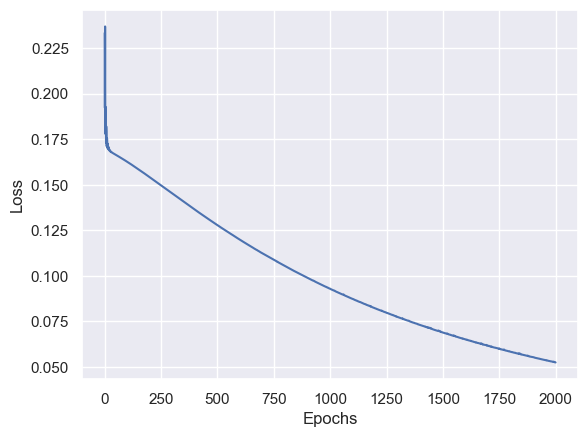

In [99]:
# plota as loss para ver se está treinando
plt.plot(historyAlpha.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

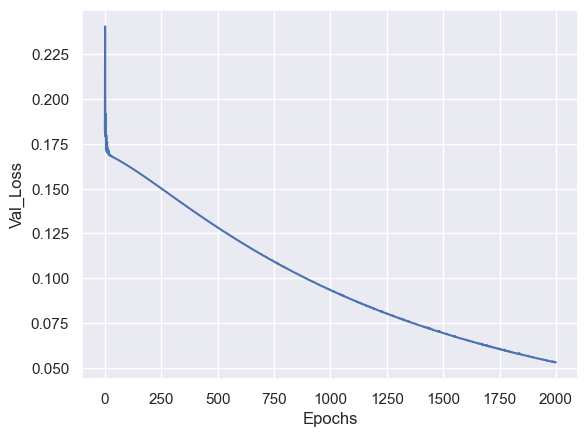

In [100]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyAlpha.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [101]:
modelAlpha.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\Alpha-Dwarfs.h5


In [102]:
predalpha = modelAlpha.predict(X_test)

 1/26 [>.............................] - ETA: 1s

26/26 [==============================] - 0s 2ms/step


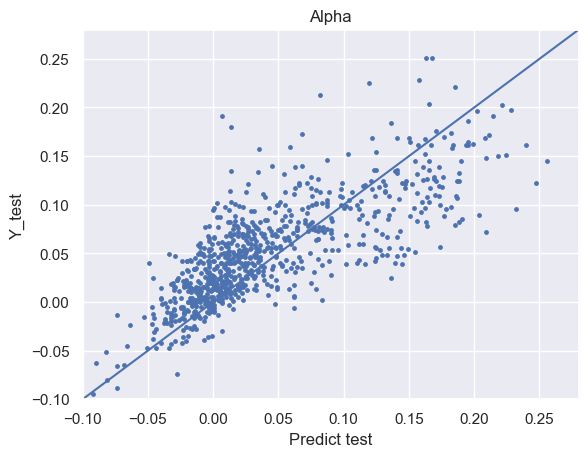

In [103]:
plt.scatter(Y_test[[columnTrain]], predalpha, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.28)
plt.ylim(-0.1, 0.28)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [104]:
score = r2_score(Y_test[columnTrain], predalpha)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 56.99999999999999%


In [105]:
Y_test['alpha_predict'] = predalpha

In [106]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0038417   4921.37     4.651   -0.181        0.005   
iDR4_3_SPLUS-n06s42_0007379    6030.42     4.245    0.130       -0.008   
iDR4_3_STRIPE82-0132_0036437   5819.09     4.285   -0.549        0.182   
iDR4_3_STRIPE82-0004_0008822   5544.12     4.224   -0.151        0.115   
iDR4_3_SPLUS-n02s28_0005543    6092.42     4.536   -0.048       -0.021   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0004_0017908   6040.59     4.168   -0.192        0.037   
iDR4_3_STRIPE82-0001_0018941   5714.94     4.069    0.052        0.003   
iDR4_3_STRIPE82-0024_0032338   5304.86     4.456   -0.138        0.064   
iDR4_3_SPLUS-n06s42_0023601    5391.21     4.178    0.211       -0.013   
iDR4_3_SPLUS-n04s43_0004434    5591.29     4.069   -0.129        0.004   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0024_0038417 -0.04975 -0.01964 -0.00570  0.00842 -0.07885   
iDR4_3_SPLUS-n06s42_0007379   0.01449 -0.04694  0.23062 -0.02586  0.02393   
iDR4_3_STRIPE82-0132_0036437  0.20548  0.04547  0.07696  0.31184  0.16932   
iDR4_3_STRIPE82-0004_0008822  0.13684  0.03922  0.08200  0.21118  0.11384   
iDR4_3_SPLUS-n02s28_0005543  -0.01856 -0.06742  0.27131 -0.03767 -0.01378   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0004_0017908  0.06951  0.03663  0.05333  0.05084  0.04985   
iDR4_3_STRIPE82-0001_0018941  0.01061  0.00962  0.16620  0.01764  0.01869   
iDR4_3_STRIPE82-0024_0032338  0.02239  0.06251 -0.05183  0.12319  0.02592   
iDR4_3_SPLUS-n06s42_0023601   0.01314 -0.01790  0.12130  0.00432  0.01938   
iDR4_3_SPLUS-n04s43_0004434   0.01163  0.01534  0.09806  0.02079 -0.00273   

                                ni_fe  alpha_predict  
ID                                                    
iDR4_3_STRIPE82-0024_0038417 -0.04684       0.031706  
iDR4_3_SPLUS-n06s42_0007379   0.05594       0.015877  
iDR4_3_STRIPE82-0132_0036437  0.05811       0.097206  
iDR4_3_STRIPE82-0004_0008822  0.07739       0.069076  
iDR4_3_SPLUS-n02s28_0005543  -0.01454       0.022098  
...                               ...            ...  
iDR4_3_STRIPE82-0004_0017908  0.02317       0.037217  
iDR4_3_STRIPE82-0001_0018941  0.03555       0.087026  
iDR4_3_STRIPE82-0024_0032338  0.01970       0.074271  
iDR4_3_SPLUS-n06s42_0023601   0.07138      -0.013350  
iDR4_3_SPLUS-n04s43_0004434  -0.01214       0.076826  

[813 rows x 11 columns]

In [107]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### MGFE

In [108]:
Parametro = "MGFE"
columnTrain = 'mg_fe'

AouG = "Dwarfs"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [109]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n02s28_0024382    5863.83     4.149   -0.438        0.136   
iDR4_3_STRIPE82-0024_0040109   5886.29     4.223   -0.192        0.021   
iDR4_3_SPLUS-n01s26_0011164    5833.90     4.186   -0.197        0.016   
iDR4_3_STRIPE82-0168_0030169   5628.83     4.293   -0.265        0.014   
iDR4_3_SPLUS-n05s43_0030378    5505.30     4.278    0.312       -0.029   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0004_0030892   5714.67     4.127   -0.897        0.196   
iDR4_3_SPLUS-n02n44_0028655    5910.35     4.008   -0.449        0.062   
iDR4_3_STRIPE82-0048_0018333   5867.85     4.365   -0.245        0.152   
iDR4_3_STRIPE82-0026_0033157   5646.33     4.319   -0.002       -0.005   
iDR4_3_SPLUS-n05s44_0009627    5603.38     4.235   -0.314        0.162   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n02s28_0024382   0.08000  0.08117  0.05482  0.19230  0.12617   
iDR4_3_STRIPE82-0024_0040109  0.04634  0.00635  0.13555  0.03607  0.02003   
iDR4_3_SPLUS-n01s26_0011164   0.01951  0.02248 -0.00912  0.03087  0.01324   
iDR4_3_STRIPE82-0168_0030169 -0.01721  0.05954 -0.05187  0.04548 -0.03024   
iDR4_3_SPLUS-n05s43_0030378  -0.05027 -0.06468  0.26555 -0.03097  0.02786   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0004_0030892  0.24237  0.16171  0.06538  0.25412  0.18343   
iDR4_3_SPLUS-n02n44_0028655   0.00484  0.06539  0.14547  0.08856  0.05541   
iDR4_3_STRIPE82-0048_0018333  0.10387  0.10507  0.23299  0.23443  0.15001   
iDR4_3_STRIPE82-0026_0033157  0.00953 -0.01291  0.31148  0.03218 -0.00939   
iDR4_3_SPLUS-n05s44_0009627   0.17746  0.17021  0.04441  0.24426  0.14131   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-n02s28_0024382   0.03700  
iDR4_3_STRIPE82-0024_0040109 -0.00277  
iDR4_3_SPLUS-n01s26_0011164   0.00809  
iDR4_3_STRIPE82-0168_0030169  0.02231  
iDR4_3_SPLUS-n05s43_0030378   0.05162  
...                               ...  
iDR4_3_STRIPE82-0004_0030892  0.06915  
iDR4_3_SPLUS-n02n44_0028655  -0.03434  
iDR4_3_STRIPE82-0048_0018333  0.04617  
iDR4_3_STRIPE82-0026_0033157  0.03679  
iDR4_3_SPLUS-n05s44_0009627   0.08938  

[2925 rows x 10 columns]

In [110]:
modelMGFE = training_model()

In [111]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyMGFE = modelMGFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


2/2 - 1s - loss: 0.3017 - val_loss: 0.2456 - 651ms/epoch - 326ms/step
Epoch 2/2000
2/2 - 0s - loss: 0.2456 - val_loss: 0.2070 - 42ms/epoch - 21ms/step
Epoch 3/2000
2/2 - 0s - loss: 0.2022 - val_loss: 0.1925 - 43ms/epoch - 22ms/step
Epoch 4/2000
2/2 - 0s - loss: 0.1944 - val_loss: 0.2096 - 40ms/epoch - 20ms/step
Epoch 5/2000
2/2 - 0s - loss: 0.2054 - val_loss: 0.1891 - 41ms/epoch - 21ms/step
Epoch 6/2000
2/2 - 0s - loss: 0.1853 - val_loss: 0.1752 - 40ms/epoch - 20ms/step
Epoch 7/2000
2/2 - 0s - loss: 0.1767 - val_loss: 0.1801 - 42ms/epoch - 21ms/step
Epoch 8/2000
2/2 - 0s - loss: 0.1824 - val_loss: 0.1824 - 44ms/epoch - 22ms/step
Epoch 9/2000
2/2 - 0s - loss: 0.1826 - val_loss: 0.1777 - 41ms/epoch - 21ms/step
Epoch 10/2000
2/2 - 0s - loss: 0.1775 - val_loss: 0.1759 - 42ms/epoch - 21ms/step
Epoch 11/2000
2/2 - 0s - loss: 0.1761 - val_loss: 0.1771 - 41ms/epoch - 21ms/step
Epoch 12/2000
2/2 - 0s - loss: 0.1773 - val_loss: 0.1763 - 41ms/epoch - 20ms/step
Epoch 13/2000
2/2 - 0s - loss: 0.176

Text(0, 0.5, 'Loss')

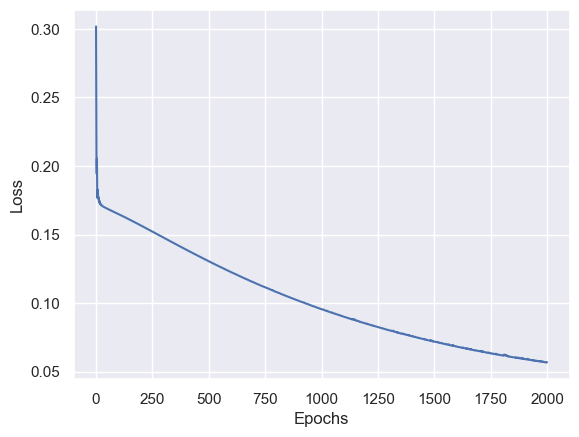

In [112]:
# plota as loss para ver se está treinando
plt.plot(historyMGFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

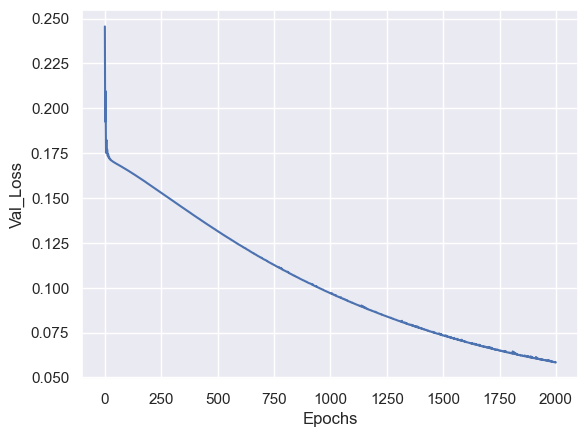

In [113]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyMGFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [114]:
modelMGFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\MGFE-Dwarfs.h5


In [115]:
predMGFE = modelMGFE.predict(X_test)

 1/26 [>.............................] - ETA: 2s

26/26 [==============================] - 0s 3ms/step


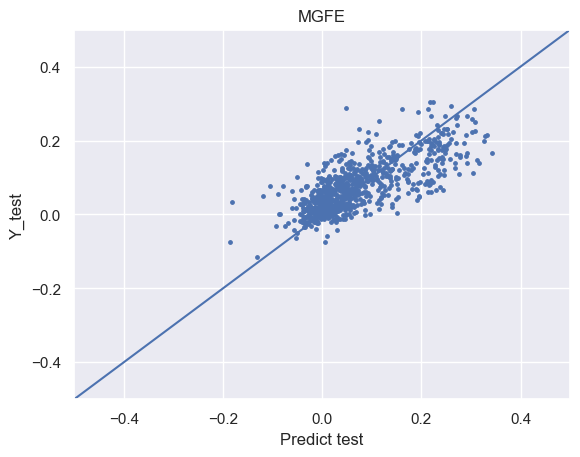

In [116]:
plt.scatter(Y_test[[columnTrain]], predMGFE, s=6)
plt.title(Parametro)
plt.xlim(-0.2, 0.3)
plt.ylim(-0.2, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [117]:
score = r2_score(Y_test[columnTrain], predMGFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 56.00000000000001%


In [118]:
Y_test['MGFE_predict'] = predMGFE

In [119]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0038417   4921.37     4.651   -0.181        0.005   
iDR4_3_SPLUS-n06s42_0007379    6030.42     4.245    0.130       -0.008   
iDR4_3_STRIPE82-0132_0036437   5819.09     4.285   -0.549        0.182   
iDR4_3_STRIPE82-0004_0008822   5544.12     4.224   -0.151        0.115   
iDR4_3_SPLUS-n02s28_0005543    6092.42     4.536   -0.048       -0.021   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0004_0017908   6040.59     4.168   -0.192        0.037   
iDR4_3_STRIPE82-0001_0018941   5714.94     4.069    0.052        0.003   
iDR4_3_STRIPE82-0024_0032338   5304.86     4.456   -0.138        0.064   
iDR4_3_SPLUS-n06s42_0023601    5391.21     4.178    0.211       -0.013   
iDR4_3_SPLUS-n04s43_0004434    5591.29     4.069   -0.129        0.004   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0024_0038417 -0.04975 -0.01964 -0.00570  0.00842 -0.07885   
iDR4_3_SPLUS-n06s42_0007379   0.01449 -0.04694  0.23062 -0.02586  0.02393   
iDR4_3_STRIPE82-0132_0036437  0.20548  0.04547  0.07696  0.31184  0.16932   
iDR4_3_STRIPE82-0004_0008822  0.13684  0.03922  0.08200  0.21118  0.11384   
iDR4_3_SPLUS-n02s28_0005543  -0.01856 -0.06742  0.27131 -0.03767 -0.01378   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0004_0017908  0.06951  0.03663  0.05333  0.05084  0.04985   
iDR4_3_STRIPE82-0001_0018941  0.01061  0.00962  0.16620  0.01764  0.01869   
iDR4_3_STRIPE82-0024_0032338  0.02239  0.06251 -0.05183  0.12319  0.02592   
iDR4_3_SPLUS-n06s42_0023601   0.01314 -0.01790  0.12130  0.00432  0.01938   
iDR4_3_SPLUS-n04s43_0004434   0.01163  0.01534  0.09806  0.02079 -0.00273   

                                ni_fe  alpha_predict  MGFE_predict  
ID                                                                  
iDR4_3_STRIPE82-0024_0038417 -0.04684       0.031706      0.034746  
iDR4_3_SPLUS-n06s42_0007379   0.05594       0.015877     -0.002261  
iDR4_3_STRIPE82-0132_0036437  0.05811       0.097206      0.148232  
iDR4_3_STRIPE82-0004_0008822  0.07739       0.069076      0.090235  
iDR4_3_SPLUS-n02s28_0005543  -0.01454       0.022098      0.016284  
...                               ...            ...           ...  
iDR4_3_STRIPE82-0004_0017908  0.02317       0.037217      0.057804  
iDR4_3_STRIPE82-0001_0018941  0.03555       0.087026      0.147576  
iDR4_3_STRIPE82-0024_0032338  0.01970       0.074271      0.111157  
iDR4_3_SPLUS-n06s42_0023601   0.07138      -0.013350     -0.006724  
iDR4_3_SPLUS-n04s43_0004434  -0.01214       0.076826      0.097196  

[813 rows x 12 columns]

In [120]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CFE

In [121]:
Parametro = "CFE"
columnTrain = 'c_fe'

AouG = "Dwarfs"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [122]:
modelCFE = training_model()

In [123]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCFE = modelCFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


2/2 - 1s - loss: 0.2045 - val_loss: 0.1928 - 639ms/epoch - 319ms/step
Epoch 2/2000
2/2 - 0s - loss: 0.1920 - val_loss: 0.1771 - 45ms/epoch - 22ms/step
Epoch 3/2000
2/2 - 0s - loss: 0.1760 - val_loss: 0.1804 - 42ms/epoch - 21ms/step
Epoch 4/2000
2/2 - 0s - loss: 0.1798 - val_loss: 0.1767 - 42ms/epoch - 21ms/step
Epoch 5/2000
2/2 - 0s - loss: 0.1751 - val_loss: 0.1708 - 42ms/epoch - 21ms/step
Epoch 6/2000
2/2 - 0s - loss: 0.1714 - val_loss: 0.1727 - 41ms/epoch - 21ms/step
Epoch 7/2000
2/2 - 0s - loss: 0.1739 - val_loss: 0.1719 - 41ms/epoch - 21ms/step
Epoch 8/2000
2/2 - 0s - loss: 0.1723 - val_loss: 0.1703 - 41ms/epoch - 20ms/step
Epoch 9/2000
2/2 - 0s - loss: 0.1705 - val_loss: 0.1714 - 41ms/epoch - 21ms/step
Epoch 10/2000
2/2 - 0s - loss: 0.1711 - val_loss: 0.1709 - 42ms/epoch - 21ms/step
Epoch 11/2000
2/2 - 0s - loss: 0.1704 - val_loss: 0.1702 - 40ms/epoch - 20ms/step
Epoch 12/2000
2/2 - 0s - loss: 0.1699 - val_loss: 0.1704 - 41ms/epoch - 21ms/step
Epoch 13/2000
2/2 - 0s - loss: 0.170

Text(0, 0.5, 'Loss')

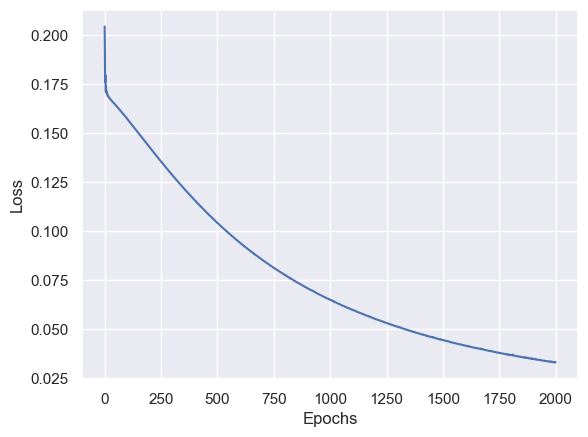

In [124]:
# plota as loss para ver se está treinando
plt.plot(historyCFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

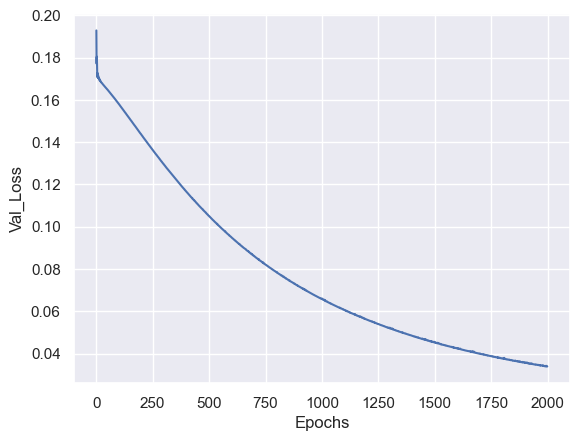

In [125]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [126]:
modelCFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\CFE-Dwarfs.h5


In [127]:
predCFE = modelCFE.predict(X_test)

 1/26 [>.............................] - ETA: 1s

26/26 [==============================] - 0s 4ms/step


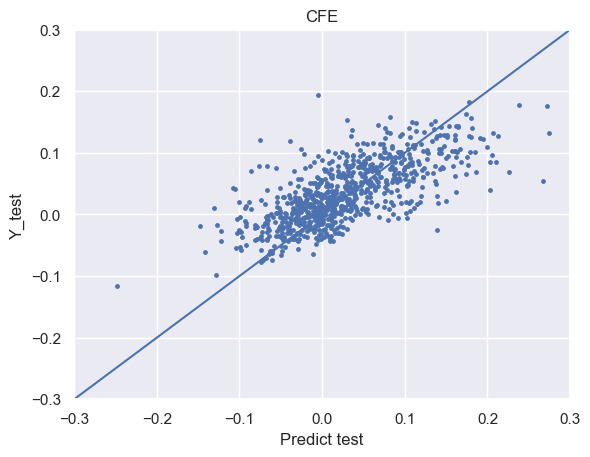

In [128]:
plt.scatter(Y_test[[columnTrain]], predCFE, s=6)
plt.title(Parametro)
plt.xlim(-0.3, 0.3)
plt.ylim(-0.3, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [129]:
score = r2_score(Y_test[columnTrain], predCFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 49.0%


In [130]:
Y_test['CFE_predict'] = predCFE

In [131]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0038417   4921.37     4.651   -0.181        0.005   
iDR4_3_SPLUS-n06s42_0007379    6030.42     4.245    0.130       -0.008   
iDR4_3_STRIPE82-0132_0036437   5819.09     4.285   -0.549        0.182   
iDR4_3_STRIPE82-0004_0008822   5544.12     4.224   -0.151        0.115   
iDR4_3_SPLUS-n02s28_0005543    6092.42     4.536   -0.048       -0.021   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0004_0017908   6040.59     4.168   -0.192        0.037   
iDR4_3_STRIPE82-0001_0018941   5714.94     4.069    0.052        0.003   
iDR4_3_STRIPE82-0024_0032338   5304.86     4.456   -0.138        0.064   
iDR4_3_SPLUS-n06s42_0023601    5391.21     4.178    0.211       -0.013   
iDR4_3_SPLUS-n04s43_0004434    5591.29     4.069   -0.129        0.004   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0024_0038417 -0.04975 -0.01964 -0.00570  0.00842 -0.07885   
iDR4_3_SPLUS-n06s42_0007379   0.01449 -0.04694  0.23062 -0.02586  0.02393   
iDR4_3_STRIPE82-0132_0036437  0.20548  0.04547  0.07696  0.31184  0.16932   
iDR4_3_STRIPE82-0004_0008822  0.13684  0.03922  0.08200  0.21118  0.11384   
iDR4_3_SPLUS-n02s28_0005543  -0.01856 -0.06742  0.27131 -0.03767 -0.01378   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0004_0017908  0.06951  0.03663  0.05333  0.05084  0.04985   
iDR4_3_STRIPE82-0001_0018941  0.01061  0.00962  0.16620  0.01764  0.01869   
iDR4_3_STRIPE82-0024_0032338  0.02239  0.06251 -0.05183  0.12319  0.02592   
iDR4_3_SPLUS-n06s42_0023601   0.01314 -0.01790  0.12130  0.00432  0.01938   
iDR4_3_SPLUS-n04s43_0004434   0.01163  0.01534  0.09806  0.02079 -0.00273   

                                ni_fe  alpha_predict  MGFE_predict  \
ID                                                                   
iDR4_3_STRIPE82-0024_0038417 -0.04684       0.031706      0.034746   
iDR4_3_SPLUS-n06s42_0007379   0.05594       0.015877     -0.002261   
iDR4_3_STRIPE82-0132_0036437  0.05811       0.097206      0.148232   
iDR4_3_STRIPE82-0004_0008822  0.07739       0.069076      0.090235   
iDR4_3_SPLUS-n02s28_0005543  -0.01454       0.022098      0.016284   
...                               ...            ...           ...   
iDR4_3_STRIPE82-0004_0017908  0.02317       0.037217      0.057804   
iDR4_3_STRIPE82-0001_0018941  0.03555       0.087026      0.147576   
iDR4_3_STRIPE82-0024_0032338  0.01970       0.074271      0.111157   
iDR4_3_SPLUS-n06s42_0023601   0.07138      -0.013350     -0.006724   
iDR4_3_SPLUS-n04s43_0004434  -0.01214       0.076826      0.097196   

                              CFE_predict  
ID                                         
iDR4_3_STRIPE82-0024_0038417    -0.037071  
iDR4_3_SPLUS-n06s42_0007379     -0.002022  
iDR4_3_STRIPE82-0132_0036437     0.097223  
iDR4_3_STRIPE82-0004_0008822     0.054439  
iDR4_3_SPLUS-n02s28_0005543      0.025007  
...                                   ...  
iDR4_3_STRIPE82-0004_0017908     0.060792  
iDR4_3_STRIPE82-0001_0018941     0.061029  
iDR4_3_STRIPE82-0024_0032338    -0.010455  
iDR4_3_SPLUS-n06s42_0023601      0.009435  
iDR4_3_SPLUS-n04s43_0004434      0.037957  

[813 rows x 13 columns]

In [132]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CAFE

In [133]:
Parametro = "CAFE"
columnTrain = 'ca_fe'

AouG = "Dwarfs"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [134]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n02s28_0024382    5863.83     4.149   -0.438        0.136   
iDR4_3_STRIPE82-0024_0040109   5886.29     4.223   -0.192        0.021   
iDR4_3_SPLUS-n01s26_0011164    5833.90     4.186   -0.197        0.016   
iDR4_3_STRIPE82-0168_0030169   5628.83     4.293   -0.265        0.014   
iDR4_3_SPLUS-n05s43_0030378    5505.30     4.278    0.312       -0.029   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0004_0030892   5714.67     4.127   -0.897        0.196   
iDR4_3_SPLUS-n02n44_0028655    5910.35     4.008   -0.449        0.062   
iDR4_3_STRIPE82-0048_0018333   5867.85     4.365   -0.245        0.152   
iDR4_3_STRIPE82-0026_0033157   5646.33     4.319   -0.002       -0.005   
iDR4_3_SPLUS-n05s44_0009627    5603.38     4.235   -0.314        0.162   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n02s28_0024382   0.08000  0.08117  0.05482  0.19230  0.12617   
iDR4_3_STRIPE82-0024_0040109  0.04634  0.00635  0.13555  0.03607  0.02003   
iDR4_3_SPLUS-n01s26_0011164   0.01951  0.02248 -0.00912  0.03087  0.01324   
iDR4_3_STRIPE82-0168_0030169 -0.01721  0.05954 -0.05187  0.04548 -0.03024   
iDR4_3_SPLUS-n05s43_0030378  -0.05027 -0.06468  0.26555 -0.03097  0.02786   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0004_0030892  0.24237  0.16171  0.06538  0.25412  0.18343   
iDR4_3_SPLUS-n02n44_0028655   0.00484  0.06539  0.14547  0.08856  0.05541   
iDR4_3_STRIPE82-0048_0018333  0.10387  0.10507  0.23299  0.23443  0.15001   
iDR4_3_STRIPE82-0026_0033157  0.00953 -0.01291  0.31148  0.03218 -0.00939   
iDR4_3_SPLUS-n05s44_0009627   0.17746  0.17021  0.04441  0.24426  0.14131   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-n02s28_0024382   0.03700  
iDR4_3_STRIPE82-0024_0040109 -0.00277  
iDR4_3_SPLUS-n01s26_0011164   0.00809  
iDR4_3_STRIPE82-0168_0030169  0.02231  
iDR4_3_SPLUS-n05s43_0030378   0.05162  
...                               ...  
iDR4_3_STRIPE82-0004_0030892  0.06915  
iDR4_3_SPLUS-n02n44_0028655  -0.03434  
iDR4_3_STRIPE82-0048_0018333  0.04617  
iDR4_3_STRIPE82-0026_0033157  0.03679  
iDR4_3_SPLUS-n05s44_0009627   0.08938  

[2925 rows x 10 columns]

In [135]:
modelCAFE = training_model()

In [136]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCAFE = modelCAFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


2/2 - 1s - loss: 0.2053 - val_loss: 0.1830 - 661ms/epoch - 331ms/step
Epoch 2/2000
2/2 - 0s - loss: 0.1810 - val_loss: 0.1838 - 42ms/epoch - 21ms/step
Epoch 3/2000
2/2 - 0s - loss: 0.1856 - val_loss: 0.1744 - 44ms/epoch - 22ms/step
Epoch 4/2000
2/2 - 0s - loss: 0.1747 - val_loss: 0.1757 - 41ms/epoch - 20ms/step
Epoch 5/2000
2/2 - 0s - loss: 0.1773 - val_loss: 0.1752 - 41ms/epoch - 21ms/step
Epoch 6/2000
2/2 - 0s - loss: 0.1743 - val_loss: 0.1693 - 41ms/epoch - 20ms/step
Epoch 7/2000
2/2 - 0s - loss: 0.1706 - val_loss: 0.1724 - 44ms/epoch - 22ms/step
Epoch 8/2000
2/2 - 0s - loss: 0.1729 - val_loss: 0.1699 - 42ms/epoch - 21ms/step
Epoch 9/2000
2/2 - 0s - loss: 0.1702 - val_loss: 0.1699 - 43ms/epoch - 21ms/step
Epoch 10/2000
2/2 - 0s - loss: 0.1706 - val_loss: 0.1707 - 43ms/epoch - 21ms/step
Epoch 11/2000
2/2 - 0s - loss: 0.1706 - val_loss: 0.1687 - 39ms/epoch - 20ms/step
Epoch 12/2000
2/2 - 0s - loss: 0.1689 - val_loss: 0.1691 - 41ms/epoch - 20ms/step
Epoch 13/2000
2/2 - 0s - loss: 0.169

Text(0, 0.5, 'Loss')

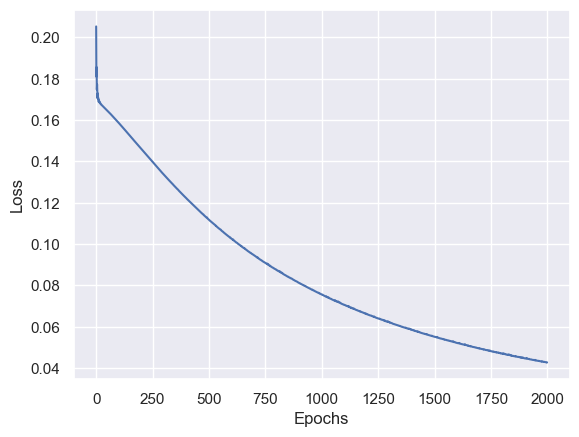

In [137]:
# plota as loss para ver se está treinando
plt.plot(historyCAFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

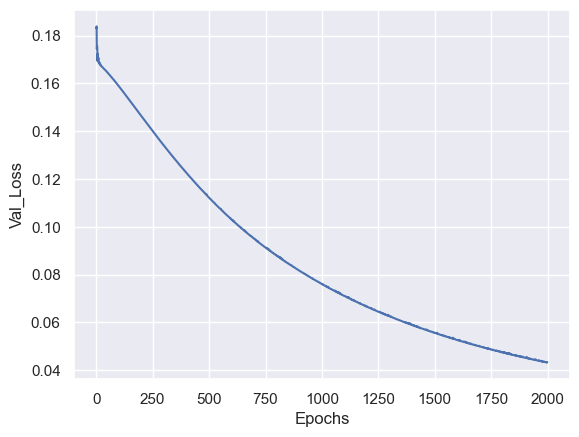

In [138]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCAFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [139]:
modelCAFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\CAFE-Dwarfs.h5


In [140]:
predCAFE = modelCAFE.predict(X_test)

15/26 [================>.............] - ETA: 0s

26/26 [==============================] - 0s 4ms/step


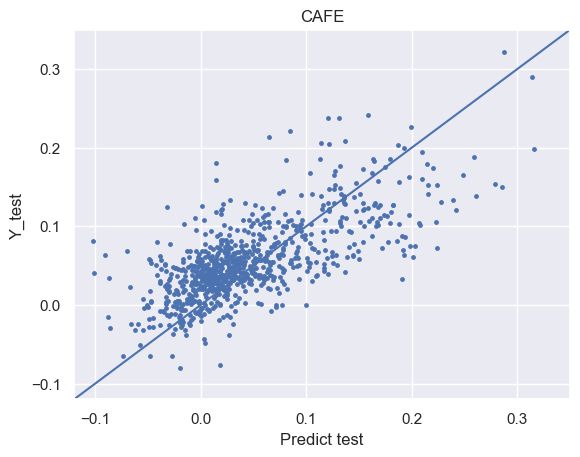

In [141]:
plt.scatter(Y_test[[columnTrain]], predCAFE, s=6)
plt.title(Parametro)
plt.xlim(-0.12, 0.35)
plt.ylim(-0.12, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [142]:
score = r2_score(Y_test[columnTrain], predCAFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 46.0%


In [143]:
Y_test['CAFE_predict'] = predCAFE

In [144]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0038417   4921.37     4.651   -0.181        0.005   
iDR4_3_SPLUS-n06s42_0007379    6030.42     4.245    0.130       -0.008   
iDR4_3_STRIPE82-0132_0036437   5819.09     4.285   -0.549        0.182   
iDR4_3_STRIPE82-0004_0008822   5544.12     4.224   -0.151        0.115   
iDR4_3_SPLUS-n02s28_0005543    6092.42     4.536   -0.048       -0.021   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0004_0017908   6040.59     4.168   -0.192        0.037   
iDR4_3_STRIPE82-0001_0018941   5714.94     4.069    0.052        0.003   
iDR4_3_STRIPE82-0024_0032338   5304.86     4.456   -0.138        0.064   
iDR4_3_SPLUS-n06s42_0023601    5391.21     4.178    0.211       -0.013   
iDR4_3_SPLUS-n04s43_0004434    5591.29     4.069   -0.129        0.004   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0024_0038417 -0.04975 -0.01964 -0.00570  0.00842 -0.07885   
iDR4_3_SPLUS-n06s42_0007379   0.01449 -0.04694  0.23062 -0.02586  0.02393   
iDR4_3_STRIPE82-0132_0036437  0.20548  0.04547  0.07696  0.31184  0.16932   
iDR4_3_STRIPE82-0004_0008822  0.13684  0.03922  0.08200  0.21118  0.11384   
iDR4_3_SPLUS-n02s28_0005543  -0.01856 -0.06742  0.27131 -0.03767 -0.01378   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0004_0017908  0.06951  0.03663  0.05333  0.05084  0.04985   
iDR4_3_STRIPE82-0001_0018941  0.01061  0.00962  0.16620  0.01764  0.01869   
iDR4_3_STRIPE82-0024_0032338  0.02239  0.06251 -0.05183  0.12319  0.02592   
iDR4_3_SPLUS-n06s42_0023601   0.01314 -0.01790  0.12130  0.00432  0.01938   
iDR4_3_SPLUS-n04s43_0004434   0.01163  0.01534  0.09806  0.02079 -0.00273   

                                ni_fe  alpha_predict  MGFE_predict  \
ID                                                                   
iDR4_3_STRIPE82-0024_0038417 -0.04684       0.031706      0.034746   
iDR4_3_SPLUS-n06s42_0007379   0.05594       0.015877     -0.002261   
iDR4_3_STRIPE82-0132_0036437  0.05811       0.097206      0.148232   
iDR4_3_STRIPE82-0004_0008822  0.07739       0.069076      0.090235   
iDR4_3_SPLUS-n02s28_0005543  -0.01454       0.022098      0.016284   
...                               ...            ...           ...   
iDR4_3_STRIPE82-0004_0017908  0.02317       0.037217      0.057804   
iDR4_3_STRIPE82-0001_0018941  0.03555       0.087026      0.147576   
iDR4_3_STRIPE82-0024_0032338  0.01970       0.074271      0.111157   
iDR4_3_SPLUS-n06s42_0023601   0.07138      -0.013350     -0.006724   
iDR4_3_SPLUS-n04s43_0004434  -0.01214       0.076826      0.097196   

                              CFE_predict  CAFE_predict  
ID                                                       
iDR4_3_STRIPE82-0024_0038417    -0.037071      0.029063  
iDR4_3_SPLUS-n06s42_0007379     -0.002022      0.003106  
iDR4_3_STRIPE82-0132_0036437     0.097223      0.107484  
iDR4_3_STRIPE82-0004_0008822     0.054439      0.075208  
iDR4_3_SPLUS-n02s28_0005543      0.025007      0.022129  
...                                   ...           ...  
iDR4_3_STRIPE82-0004_0017908     0.060792      0.008898  
iDR4_3_STRIPE82-0001_0018941     0.061029      0.094511  
iDR4_3_STRIPE82-0024_0032338    -0.010455      0.064061  
iDR4_3_SPLUS-n06s42_0023601      0.009435     -0.025255  
iDR4_3_SPLUS-n04s43_0004434      0.037957      0.073772  

[813 rows x 14 columns]

In [145]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NFE

In [146]:
Parametro = "NFE"
columnTrain = 'n_fe'

AouG = "Dwarfs"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [147]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n02s28_0024382    5863.83     4.149   -0.438        0.136   
iDR4_3_STRIPE82-0024_0040109   5886.29     4.223   -0.192        0.021   
iDR4_3_SPLUS-n01s26_0011164    5833.90     4.186   -0.197        0.016   
iDR4_3_STRIPE82-0168_0030169   5628.83     4.293   -0.265        0.014   
iDR4_3_SPLUS-n05s43_0030378    5505.30     4.278    0.312       -0.029   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0004_0030892   5714.67     4.127   -0.897        0.196   
iDR4_3_SPLUS-n02n44_0028655    5910.35     4.008   -0.449        0.062   
iDR4_3_STRIPE82-0048_0018333   5867.85     4.365   -0.245        0.152   
iDR4_3_STRIPE82-0026_0033157   5646.33     4.319   -0.002       -0.005   
iDR4_3_SPLUS-n05s44_0009627    5603.38     4.235   -0.314        0.162   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n02s28_0024382   0.08000  0.08117  0.05482  0.19230  0.12617   
iDR4_3_STRIPE82-0024_0040109  0.04634  0.00635  0.13555  0.03607  0.02003   
iDR4_3_SPLUS-n01s26_0011164   0.01951  0.02248 -0.00912  0.03087  0.01324   
iDR4_3_STRIPE82-0168_0030169 -0.01721  0.05954 -0.05187  0.04548 -0.03024   
iDR4_3_SPLUS-n05s43_0030378  -0.05027 -0.06468  0.26555 -0.03097  0.02786   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0004_0030892  0.24237  0.16171  0.06538  0.25412  0.18343   
iDR4_3_SPLUS-n02n44_0028655   0.00484  0.06539  0.14547  0.08856  0.05541   
iDR4_3_STRIPE82-0048_0018333  0.10387  0.10507  0.23299  0.23443  0.15001   
iDR4_3_STRIPE82-0026_0033157  0.00953 -0.01291  0.31148  0.03218 -0.00939   
iDR4_3_SPLUS-n05s44_0009627   0.17746  0.17021  0.04441  0.24426  0.14131   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-n02s28_0024382   0.03700  
iDR4_3_STRIPE82-0024_0040109 -0.00277  
iDR4_3_SPLUS-n01s26_0011164   0.00809  
iDR4_3_STRIPE82-0168_0030169  0.02231  
iDR4_3_SPLUS-n05s43_0030378   0.05162  
...                               ...  
iDR4_3_STRIPE82-0004_0030892  0.06915  
iDR4_3_SPLUS-n02n44_0028655  -0.03434  
iDR4_3_STRIPE82-0048_0018333  0.04617  
iDR4_3_STRIPE82-0026_0033157  0.03679  
iDR4_3_SPLUS-n05s44_0009627   0.08938  

[2925 rows x 10 columns]

In [148]:
modelNFE = training_model()

In [149]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNFE = modelNFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


2/2 - 1s - loss: 0.2725 - val_loss: 0.2251 - 664ms/epoch - 332ms/step
Epoch 2/2000
2/2 - 0s - loss: 0.2199 - val_loss: 0.1945 - 43ms/epoch - 22ms/step
Epoch 3/2000
2/2 - 0s - loss: 0.1980 - val_loss: 0.1975 - 41ms/epoch - 21ms/step
Epoch 4/2000
2/2 - 0s - loss: 0.1942 - val_loss: 0.1833 - 40ms/epoch - 20ms/step
Epoch 5/2000
2/2 - 0s - loss: 0.1851 - val_loss: 0.1917 - 41ms/epoch - 20ms/step
Epoch 6/2000
2/2 - 0s - loss: 0.1904 - val_loss: 0.1826 - 41ms/epoch - 20ms/step
Epoch 7/2000
2/2 - 0s - loss: 0.1820 - val_loss: 0.1843 - 40ms/epoch - 20ms/step
Epoch 8/2000
2/2 - 0s - loss: 0.1835 - val_loss: 0.1820 - 41ms/epoch - 21ms/step
Epoch 9/2000
2/2 - 0s - loss: 0.1806 - val_loss: 0.1784 - 41ms/epoch - 21ms/step
Epoch 10/2000
2/2 - 0s - loss: 0.1792 - val_loss: 0.1803 - 40ms/epoch - 20ms/step
Epoch 11/2000
2/2 - 0s - loss: 0.1810 - val_loss: 0.1784 - 42ms/epoch - 21ms/step
Epoch 12/2000
2/2 - 0s - loss: 0.1787 - val_loss: 0.1788 - 50ms/epoch - 25ms/step
Epoch 13/2000
2/2 - 0s - loss: 0.179

Text(0, 0.5, 'Loss')

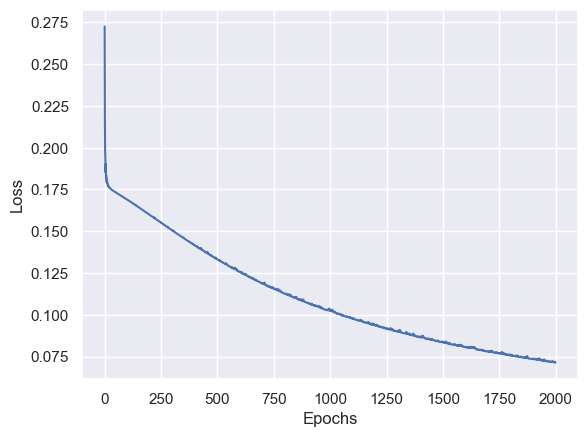

In [150]:
# plota as loss para ver se está treinando
plt.plot(historyNFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

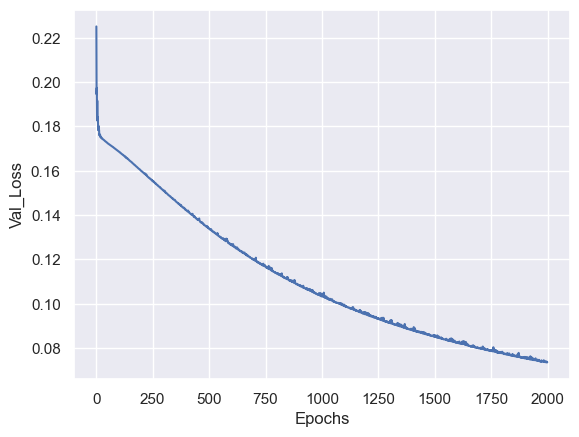

In [151]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [152]:
modelNFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\NFE-Dwarfs.h5


In [153]:
predNFE = modelNFE.predict(X_test)

11/26 [===========>..................] - ETA: 0s

26/26 [==============================] - 0s 5ms/step


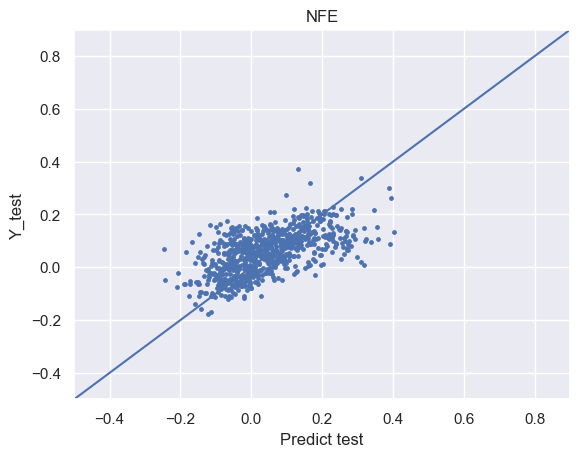

In [154]:
plt.scatter(Y_test[[columnTrain]], predNFE, s=6)
plt.title(Parametro)
plt.xlim(-0.5, 0.9)
plt.ylim(-0.5, 0.9)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [155]:
score = r2_score(Y_test[columnTrain], predNFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 32.0%


In [156]:
Y_test['NFE_predict'] = predNFE

In [157]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0038417   4921.37     4.651   -0.181        0.005   
iDR4_3_SPLUS-n06s42_0007379    6030.42     4.245    0.130       -0.008   
iDR4_3_STRIPE82-0132_0036437   5819.09     4.285   -0.549        0.182   
iDR4_3_STRIPE82-0004_0008822   5544.12     4.224   -0.151        0.115   
iDR4_3_SPLUS-n02s28_0005543    6092.42     4.536   -0.048       -0.021   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0004_0017908   6040.59     4.168   -0.192        0.037   
iDR4_3_STRIPE82-0001_0018941   5714.94     4.069    0.052        0.003   
iDR4_3_STRIPE82-0024_0032338   5304.86     4.456   -0.138        0.064   
iDR4_3_SPLUS-n06s42_0023601    5391.21     4.178    0.211       -0.013   
iDR4_3_SPLUS-n04s43_0004434    5591.29     4.069   -0.129        0.004   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0024_0038417 -0.04975 -0.01964 -0.00570  0.00842 -0.07885   
iDR4_3_SPLUS-n06s42_0007379   0.01449 -0.04694  0.23062 -0.02586  0.02393   
iDR4_3_STRIPE82-0132_0036437  0.20548  0.04547  0.07696  0.31184  0.16932   
iDR4_3_STRIPE82-0004_0008822  0.13684  0.03922  0.08200  0.21118  0.11384   
iDR4_3_SPLUS-n02s28_0005543  -0.01856 -0.06742  0.27131 -0.03767 -0.01378   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0004_0017908  0.06951  0.03663  0.05333  0.05084  0.04985   
iDR4_3_STRIPE82-0001_0018941  0.01061  0.00962  0.16620  0.01764  0.01869   
iDR4_3_STRIPE82-0024_0032338  0.02239  0.06251 -0.05183  0.12319  0.02592   
iDR4_3_SPLUS-n06s42_0023601   0.01314 -0.01790  0.12130  0.00432  0.01938   
iDR4_3_SPLUS-n04s43_0004434   0.01163  0.01534  0.09806  0.02079 -0.00273   

                                ni_fe  alpha_predict  MGFE_predict  \
ID                                                                   
iDR4_3_STRIPE82-0024_0038417 -0.04684       0.031706      0.034746   
iDR4_3_SPLUS-n06s42_0007379   0.05594       0.015877     -0.002261   
iDR4_3_STRIPE82-0132_0036437  0.05811       0.097206      0.148232   
iDR4_3_STRIPE82-0004_0008822  0.07739       0.069076      0.090235   
iDR4_3_SPLUS-n02s28_0005543  -0.01454       0.022098      0.016284   
...                               ...            ...           ...   
iDR4_3_STRIPE82-0004_0017908  0.02317       0.037217      0.057804   
iDR4_3_STRIPE82-0001_0018941  0.03555       0.087026      0.147576   
iDR4_3_STRIPE82-0024_0032338  0.01970       0.074271      0.111157   
iDR4_3_SPLUS-n06s42_0023601   0.07138      -0.013350     -0.006724   
iDR4_3_SPLUS-n04s43_0004434  -0.01214       0.076826      0.097196   

                              CFE_predict  CAFE_predict  NFE_predict  
ID                                                                    
iDR4_3_STRIPE82-0024_0038417    -0.037071      0.029063    -0.067694  
iDR4_3_SPLUS-n06s42_0007379     -0.002022      0.003106     0.200099  
iDR4_3_STRIPE82-0132_0036437     0.097223      0.107484     0.099071  
iDR4_3_STRIPE82-0004_0008822     0.054439      0.075208     0.035233  
iDR4_3_SPLUS-n02s28_0005543      0.025007      0.022129     0.073782  
...                                   ...           ...          ...  
iDR4_3_STRIPE82-0004_0017908     0.060792      0.008898     0.117047  
iDR4_3_STRIPE82-0001_0018941     0.061029      0.094511     0.010159  
iDR4_3_STRIPE82-0024_0032338    -0.010455      0.064061    -0.040794  
iDR4_3_SPLUS-n06s42_0023601      0.009435     -0.025255     0.178920  
iDR4_3_SPLUS-n04s43_0004434      0.037957      0.073772     0.017820  

[813 rows x 15 columns]

In [158]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### SIFE

In [159]:
Parametro = "SIFE"
columnTrain = 'si_fe'

AouG = "Dwarfs"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [160]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n02s28_0024382    5863.83     4.149   -0.438        0.136   
iDR4_3_STRIPE82-0024_0040109   5886.29     4.223   -0.192        0.021   
iDR4_3_SPLUS-n01s26_0011164    5833.90     4.186   -0.197        0.016   
iDR4_3_STRIPE82-0168_0030169   5628.83     4.293   -0.265        0.014   
iDR4_3_SPLUS-n05s43_0030378    5505.30     4.278    0.312       -0.029   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0004_0030892   5714.67     4.127   -0.897        0.196   
iDR4_3_SPLUS-n02n44_0028655    5910.35     4.008   -0.449        0.062   
iDR4_3_STRIPE82-0048_0018333   5867.85     4.365   -0.245        0.152   
iDR4_3_STRIPE82-0026_0033157   5646.33     4.319   -0.002       -0.005   
iDR4_3_SPLUS-n05s44_0009627    5603.38     4.235   -0.314        0.162   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n02s28_0024382   0.08000  0.08117  0.05482  0.19230  0.12617   
iDR4_3_STRIPE82-0024_0040109  0.04634  0.00635  0.13555  0.03607  0.02003   
iDR4_3_SPLUS-n01s26_0011164   0.01951  0.02248 -0.00912  0.03087  0.01324   
iDR4_3_STRIPE82-0168_0030169 -0.01721  0.05954 -0.05187  0.04548 -0.03024   
iDR4_3_SPLUS-n05s43_0030378  -0.05027 -0.06468  0.26555 -0.03097  0.02786   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0004_0030892  0.24237  0.16171  0.06538  0.25412  0.18343   
iDR4_3_SPLUS-n02n44_0028655   0.00484  0.06539  0.14547  0.08856  0.05541   
iDR4_3_STRIPE82-0048_0018333  0.10387  0.10507  0.23299  0.23443  0.15001   
iDR4_3_STRIPE82-0026_0033157  0.00953 -0.01291  0.31148  0.03218 -0.00939   
iDR4_3_SPLUS-n05s44_0009627   0.17746  0.17021  0.04441  0.24426  0.14131   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-n02s28_0024382   0.03700  
iDR4_3_STRIPE82-0024_0040109 -0.00277  
iDR4_3_SPLUS-n01s26_0011164   0.00809  
iDR4_3_STRIPE82-0168_0030169  0.02231  
iDR4_3_SPLUS-n05s43_0030378   0.05162  
...                               ...  
iDR4_3_STRIPE82-0004_0030892  0.06915  
iDR4_3_SPLUS-n02n44_0028655  -0.03434  
iDR4_3_STRIPE82-0048_0018333  0.04617  
iDR4_3_STRIPE82-0026_0033157  0.03679  
iDR4_3_SPLUS-n05s44_0009627   0.08938  

[2925 rows x 10 columns]

In [161]:
modelSIFE = training_model()

In [162]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historySIFE = modelSIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


2/2 - 1s - loss: 0.2918 - val_loss: 0.2034 - 670ms/epoch - 335ms/step
Epoch 2/2000
2/2 - 0s - loss: 0.2028 - val_loss: 0.1823 - 140ms/epoch - 70ms/step
Epoch 3/2000
2/2 - 0s - loss: 0.1808 - val_loss: 0.1869 - 53ms/epoch - 27ms/step
Epoch 4/2000
2/2 - 0s - loss: 0.1867 - val_loss: 0.1865 - 51ms/epoch - 26ms/step
Epoch 5/2000
2/2 - 0s - loss: 0.1836 - val_loss: 0.1748 - 52ms/epoch - 26ms/step
Epoch 6/2000
2/2 - 0s - loss: 0.1742 - val_loss: 0.1763 - 53ms/epoch - 27ms/step
Epoch 7/2000
2/2 - 0s - loss: 0.1769 - val_loss: 0.1753 - 51ms/epoch - 26ms/step
Epoch 8/2000
2/2 - 0s - loss: 0.1749 - val_loss: 0.1721 - 53ms/epoch - 27ms/step
Epoch 9/2000
2/2 - 0s - loss: 0.1720 - val_loss: 0.1744 - 58ms/epoch - 29ms/step
Epoch 10/2000
2/2 - 0s - loss: 0.1739 - val_loss: 0.1738 - 49ms/epoch - 25ms/step
Epoch 11/2000
2/2 - 0s - loss: 0.1727 - val_loss: 0.1707 - 48ms/epoch - 24ms/step
Epoch 12/2000
2/2 - 0s - loss: 0.1704 - val_loss: 0.1707 - 52ms/epoch - 26ms/step
Epoch 13/2000
2/2 - 0s - loss: 0.17

Text(0, 0.5, 'Loss')

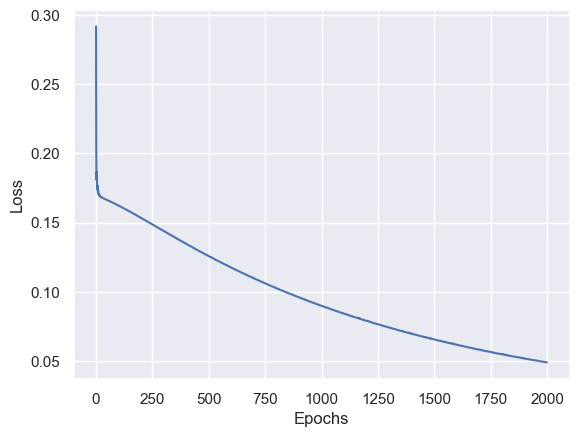

In [163]:
# plota as loss para ver se está treinando
plt.plot(historySIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

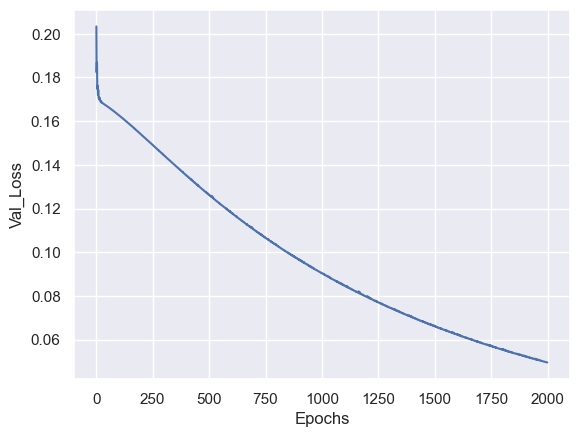

In [164]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historySIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [165]:
modelSIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\SIFE-Dwarfs.h5


In [166]:
predSIFE = modelSIFE.predict(X_test)

 1/26 [>.............................] - ETA: 1s

26/26 [==============================] - 0s 4ms/step


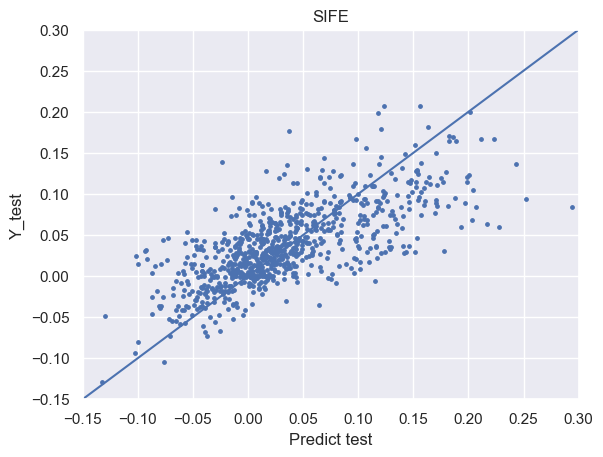

In [167]:
plt.scatter(Y_test[[columnTrain]], predSIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.15, 0.3)
plt.ylim(-0.15, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [168]:
score = r2_score(Y_test[columnTrain], predSIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 50.0%


In [169]:
Y_test[f'{Parametro}_predict'] = predSIFE

In [170]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0038417   4921.37     4.651   -0.181        0.005   
iDR4_3_SPLUS-n06s42_0007379    6030.42     4.245    0.130       -0.008   
iDR4_3_STRIPE82-0132_0036437   5819.09     4.285   -0.549        0.182   
iDR4_3_STRIPE82-0004_0008822   5544.12     4.224   -0.151        0.115   
iDR4_3_SPLUS-n02s28_0005543    6092.42     4.536   -0.048       -0.021   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0004_0017908   6040.59     4.168   -0.192        0.037   
iDR4_3_STRIPE82-0001_0018941   5714.94     4.069    0.052        0.003   
iDR4_3_STRIPE82-0024_0032338   5304.86     4.456   -0.138        0.064   
iDR4_3_SPLUS-n06s42_0023601    5391.21     4.178    0.211       -0.013   
iDR4_3_SPLUS-n04s43_0004434    5591.29     4.069   -0.129        0.004   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0024_0038417 -0.04975 -0.01964 -0.00570  0.00842 -0.07885   
iDR4_3_SPLUS-n06s42_0007379   0.01449 -0.04694  0.23062 -0.02586  0.02393   
iDR4_3_STRIPE82-0132_0036437  0.20548  0.04547  0.07696  0.31184  0.16932   
iDR4_3_STRIPE82-0004_0008822  0.13684  0.03922  0.08200  0.21118  0.11384   
iDR4_3_SPLUS-n02s28_0005543  -0.01856 -0.06742  0.27131 -0.03767 -0.01378   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0004_0017908  0.06951  0.03663  0.05333  0.05084  0.04985   
iDR4_3_STRIPE82-0001_0018941  0.01061  0.00962  0.16620  0.01764  0.01869   
iDR4_3_STRIPE82-0024_0032338  0.02239  0.06251 -0.05183  0.12319  0.02592   
iDR4_3_SPLUS-n06s42_0023601   0.01314 -0.01790  0.12130  0.00432  0.01938   
iDR4_3_SPLUS-n04s43_0004434   0.01163  0.01534  0.09806  0.02079 -0.00273   

                                ni_fe  alpha_predict  MGFE_predict  \
ID                                                                   
iDR4_3_STRIPE82-0024_0038417 -0.04684       0.031706      0.034746   
iDR4_3_SPLUS-n06s42_0007379   0.05594       0.015877     -0.002261   
iDR4_3_STRIPE82-0132_0036437  0.05811       0.097206      0.148232   
iDR4_3_STRIPE82-0004_0008822  0.07739       0.069076      0.090235   
iDR4_3_SPLUS-n02s28_0005543  -0.01454       0.022098      0.016284   
...                               ...            ...           ...   
iDR4_3_STRIPE82-0004_0017908  0.02317       0.037217      0.057804   
iDR4_3_STRIPE82-0001_0018941  0.03555       0.087026      0.147576   
iDR4_3_STRIPE82-0024_0032338  0.01970       0.074271      0.111157   
iDR4_3_SPLUS-n06s42_0023601   0.07138      -0.013350     -0.006724   
iDR4_3_SPLUS-n04s43_0004434  -0.01214       0.076826      0.097196   

                              CFE_predict  CAFE_predict  NFE_predict  \
ID                                                                     
iDR4_3_STRIPE82-0024_0038417    -0.037071      0.029063    -0.067694   
iDR4_3_SPLUS-n06s42_0007379     -0.002022      0.003106     0.200099   
iDR4_3_STRIPE82-0132_0036437     0.097223      0.107484     0.099071   
iDR4_3_STRIPE82-0004_0008822     0.054439      0.075208     0.035233   
iDR4_3_SPLUS-n02s28_0005543      0.025007      0.022129     0.073782   
...                                   ...           ...          ...   
iDR4_3_STRIPE82-0004_0017908     0.060792      0.008898     0.117047   
iDR4_3_STRIPE82-0001_0018941     0.061029      0.094511     0.010159   
iDR4_3_STRIPE82-0024_0032338    -0.010455      0.064061    -0.040794   
iDR4_3_SPLUS-n06s42_0023601      0.009435     -0.025255     0.178920   
iDR4_3_SPLUS-n04s43_0004434      0.037957      0.073772     0.017820   

                              SIFE_predict  
ID                                          
iDR4_3_STRIPE82-0024_0038417     -0.036352  
iDR4_3_SPLUS-n06s42_0007379       0.021825  
iDR4_3_STRIPE82-0132_0036437      0.0

In [171]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NIFE

In [172]:
Parametro = "NIFE"
columnTrain = 'ni_fe'

AouG = "Dwarfs"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [173]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n02s28_0024382    5863.83     4.149   -0.438        0.136   
iDR4_3_STRIPE82-0024_0040109   5886.29     4.223   -0.192        0.021   
iDR4_3_SPLUS-n01s26_0011164    5833.90     4.186   -0.197        0.016   
iDR4_3_STRIPE82-0168_0030169   5628.83     4.293   -0.265        0.014   
iDR4_3_SPLUS-n05s43_0030378    5505.30     4.278    0.312       -0.029   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0004_0030892   5714.67     4.127   -0.897        0.196   
iDR4_3_SPLUS-n02n44_0028655    5910.35     4.008   -0.449        0.062   
iDR4_3_STRIPE82-0048_0018333   5867.85     4.365   -0.245        0.152   
iDR4_3_STRIPE82-0026_0033157   5646.33     4.319   -0.002       -0.005   
iDR4_3_SPLUS-n05s44_0009627    5603.38     4.235   -0.314        0.162   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n02s28_0024382   0.08000  0.08117  0.05482  0.19230  0.12617   
iDR4_3_STRIPE82-0024_0040109  0.04634  0.00635  0.13555  0.03607  0.02003   
iDR4_3_SPLUS-n01s26_0011164   0.01951  0.02248 -0.00912  0.03087  0.01324   
iDR4_3_STRIPE82-0168_0030169 -0.01721  0.05954 -0.05187  0.04548 -0.03024   
iDR4_3_SPLUS-n05s43_0030378  -0.05027 -0.06468  0.26555 -0.03097  0.02786   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0004_0030892  0.24237  0.16171  0.06538  0.25412  0.18343   
iDR4_3_SPLUS-n02n44_0028655   0.00484  0.06539  0.14547  0.08856  0.05541   
iDR4_3_STRIPE82-0048_0018333  0.10387  0.10507  0.23299  0.23443  0.15001   
iDR4_3_STRIPE82-0026_0033157  0.00953 -0.01291  0.31148  0.03218 -0.00939   
iDR4_3_SPLUS-n05s44_0009627   0.17746  0.17021  0.04441  0.24426  0.14131   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-n02s28_0024382   0.03700  
iDR4_3_STRIPE82-0024_0040109 -0.00277  
iDR4_3_SPLUS-n01s26_0011164   0.00809  
iDR4_3_STRIPE82-0168_0030169  0.02231  
iDR4_3_SPLUS-n05s43_0030378   0.05162  
...                               ...  
iDR4_3_STRIPE82-0004_0030892  0.06915  
iDR4_3_SPLUS-n02n44_0028655  -0.03434  
iDR4_3_STRIPE82-0048_0018333  0.04617  
iDR4_3_STRIPE82-0026_0033157  0.03679  
iDR4_3_SPLUS-n05s44_0009627   0.08938  

[2925 rows x 10 columns]

In [174]:
modelNIFE = training_model()

In [175]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNIFE = modelNIFE.fit(X_train, Y_train[[columnTrain]], epochs = 3000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000


2/2 - 1s - loss: 0.5074 - val_loss: 0.1872 - 668ms/epoch - 334ms/step
Epoch 2/3000
2/2 - 0s - loss: 0.2154 - val_loss: 0.2950 - 42ms/epoch - 21ms/step
Epoch 3/3000
2/2 - 0s - loss: 0.2968 - val_loss: 0.2193 - 44ms/epoch - 22ms/step
Epoch 4/3000
2/2 - 0s - loss: 0.2124 - val_loss: 0.1717 - 42ms/epoch - 21ms/step
Epoch 5/3000
2/2 - 0s - loss: 0.1736 - val_loss: 0.1935 - 41ms/epoch - 21ms/step
Epoch 6/3000
2/2 - 0s - loss: 0.1963 - val_loss: 0.2031 - 40ms/epoch - 20ms/step
Epoch 7/3000
2/2 - 0s - loss: 0.1997 - val_loss: 0.1823 - 43ms/epoch - 22ms/step
Epoch 8/3000
2/2 - 0s - loss: 0.1787 - val_loss: 0.1701 - 42ms/epoch - 21ms/step
Epoch 9/3000
2/2 - 0s - loss: 0.1711 - val_loss: 0.1773 - 41ms/epoch - 21ms/step
Epoch 10/3000
2/2 - 0s - loss: 0.1799 - val_loss: 0.1803 - 42ms/epoch - 21ms/step
Epoch 11/3000
2/2 - 0s - loss: 0.1809 - val_loss: 0.1729 - 42ms/epoch - 21ms/step
Epoch 12/3000
2/2 - 0s - loss: 0.1725 - val_loss: 0.1689 - 42ms/epoch - 21ms/step
Epoch 13/3000
2/2 - 0s - loss: 0.169

Text(0, 0.5, 'Loss')

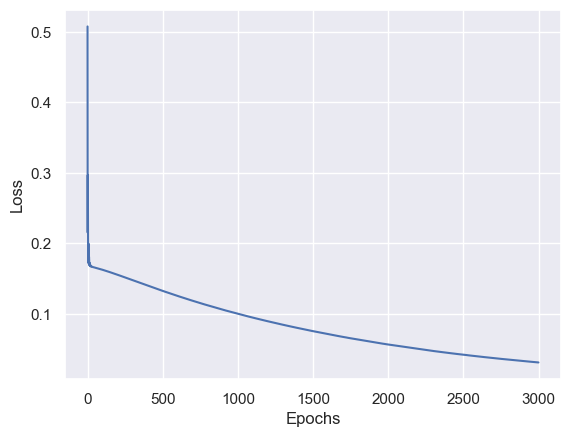

In [176]:
# plota as loss para ver se está treinando
plt.plot(historyNIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

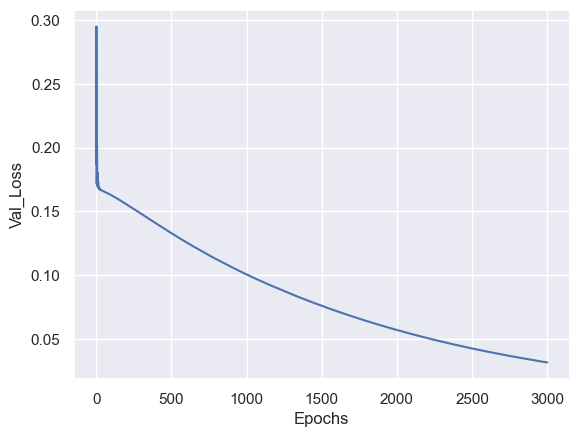

In [177]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [178]:
modelNIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\NIFE-Dwarfs.h5


In [179]:
predNIFE = modelNIFE.predict(X_test)

 1/26 [>.............................] - ETA: 2s

26/26 [==============================] - 0s 2ms/step


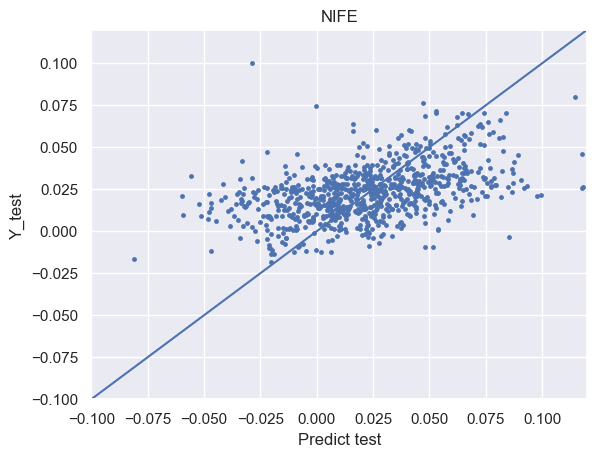

In [180]:
plt.scatter(Y_test[[columnTrain]], predNIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.12)
plt.ylim(-0.1, 0.12)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [181]:
score = r2_score(Y_test[columnTrain], predNIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 22.0%


In [182]:
Y_test[f'{Parametro}_predict'] = predNIFE

In [183]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0024_0038417   4921.37     4.651   -0.181        0.005   
iDR4_3_SPLUS-n06s42_0007379    6030.42     4.245    0.130       -0.008   
iDR4_3_STRIPE82-0132_0036437   5819.09     4.285   -0.549        0.182   
iDR4_3_STRIPE82-0004_0008822   5544.12     4.224   -0.151        0.115   
iDR4_3_SPLUS-n02s28_0005543    6092.42     4.536   -0.048       -0.021   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0004_0017908   6040.59     4.168   -0.192        0.037   
iDR4_3_STRIPE82-0001_0018941   5714.94     4.069    0.052        0.003   
iDR4_3_STRIPE82-0024_0032338   5304.86     4.456   -0.138        0.064   
iDR4_3_SPLUS-n06s42_0023601    5391.21     4.178    0.211       -0.013   
iDR4_3_SPLUS-n04s43_0004434    5591.29     4.069   -0.129        0.004   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0024_0038417 -0.04975 -0.01964 -0.00570  0.00842 -0.07885   
iDR4_3_SPLUS-n06s42_0007379   0.01449 -0.04694  0.23062 -0.02586  0.02393   
iDR4_3_STRIPE82-0132_0036437  0.20548  0.04547  0.07696  0.31184  0.16932   
iDR4_3_STRIPE82-0004_0008822  0.13684  0.03922  0.08200  0.21118  0.11384   
iDR4_3_SPLUS-n02s28_0005543  -0.01856 -0.06742  0.27131 -0.03767 -0.01378   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0004_0017908  0.06951  0.03663  0.05333  0.05084  0.04985   
iDR4_3_STRIPE82-0001_0018941  0.01061  0.00962  0.16620  0.01764  0.01869   
iDR4_3_STRIPE82-0024_0032338  0.02239  0.06251 -0.05183  0.12319  0.02592   
iDR4_3_SPLUS-n06s42_0023601   0.01314 -0.01790  0.12130  0.00432  0.01938   
iDR4_3_SPLUS-n04s43_0004434   0.01163  0.01534  0.09806  0.02079 -0.00273   

                                ni_fe  alpha_predict  MGFE_predict  \
ID                                                                   
iDR4_3_STRIPE82-0024_0038417 -0.04684       0.031706      0.034746   
iDR4_3_SPLUS-n06s42_0007379   0.05594       0.015877     -0.002261   
iDR4_3_STRIPE82-0132_0036437  0.05811       0.097206      0.148232   
iDR4_3_STRIPE82-0004_0008822  0.07739       0.069076      0.090235   
iDR4_3_SPLUS-n02s28_0005543  -0.01454       0.022098      0.016284   
...                               ...            ...           ...   
iDR4_3_STRIPE82-0004_0017908  0.02317       0.037217      0.057804   
iDR4_3_STRIPE82-0001_0018941  0.03555       0.087026      0.147576   
iDR4_3_STRIPE82-0024_0032338  0.01970       0.074271      0.111157   
iDR4_3_SPLUS-n06s42_0023601   0.07138      -0.013350     -0.006724   
iDR4_3_SPLUS-n04s43_0004434  -0.01214       0.076826      0.097196   

                              CFE_predict  CAFE_predict  NFE_predict  \
ID                                                                     
iDR4_3_STRIPE82-0024_0038417    -0.037071      0.029063    -0.067694   
iDR4_3_SPLUS-n06s42_0007379     -0.002022      0.003106     0.200099   
iDR4_3_STRIPE82-0132_0036437     0.097223      0.107484     0.099071   
iDR4_3_STRIPE82-0004_0008822     0.054439      0.075208     0.035233   
iDR4_3_SPLUS-n02s28_0005543      0.025007      0.022129     0.073782   
...                                   ...           ...          ...   
iDR4_3_STRIPE82-0004_0017908     0.060792      0.008898     0.117047   
iDR4_3_STRIPE82-0001_0018941     0.061029      0.094511     0.010159   
iDR4_3_STRIPE82-0024_0032338    -0.010455      0.064061    -0.040794   
iDR4_3_SPLUS-n06s42_0023601      0.009435     -0.025255     0.178920   
iDR4_3_SPLUS-n04s43_0004434      0.037957      0.073772     0.017820   

                              SIFE_predict  NIFE_predict  
ID                                                        
iDR4_3_STRIPE82-0024_0038417     -0.036352     -0.012003  
iDR4_3_SPLUS-n06s42_0007379       0.0218

In [184]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

# Giants

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import models
from package import encoder

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns; sns.set()

NomeBase = "Galah"
AouG = "Giants"

Loaded  11 encoders.


In [2]:
# baseline MLP for mnist dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Input, Dense, Lambda, Layer, LeakyReLU, BatchNormalization,Activation
# from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout

import math
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from keras.models import Model
from keras import backend as K

import plotly.express as px

from pympler import muppy, summary

In [3]:
def training_model():
    input_x0 = Input(shape=(66,), name='inp0')
    encoded0 = Dense(224, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(input_x0)
    a0=LeakyReLU(alpha=0.1)(encoded0)
    encoded1 = Dense(320, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a0)
    a1=LeakyReLU(alpha=0.1)(encoded1)
    encoded2 = Dense(608, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a1)
    a2=LeakyReLU(alpha=0.1)(encoded2)
    encoded3 = Dense(320, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a2)
    a3=LeakyReLU(alpha=0.1)(encoded3)
    encoded4 = Dense(128, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a3)
    a4=LeakyReLU(alpha=0.1)(encoded4)
    encoded5 = Dense(64, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "HeUniform")(a4)
    a5=LeakyReLU(alpha=0.1)(encoded5)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "HeUniform", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

In [4]:
GigCores = pd.read_csv(f"E:\\IC\\BasesTreino\\{NomeBase}-Colors-{AouG}.csv", index_col = 'ID')

In [5]:
GigCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n02n18_0040367   0.4047  0.5127  1.3164  1.4722  2.0192  2.2783   
iDR4_3_SPLUS-n02n18_0040367   0.4047  0.5127  1.3164  1.4722  2.0192  2.2783   
iDR4_3_SPLUS-n02n18_0011183   0.2466  0.5170  1.1153  1.2514  1.7919  1.9920   
iDR4_3_SPLUS-n02n18_0025206   0.4007  0.4971  1.2608  1.4048  1.9161  2.1693   
iDR4_3_SPLUS-n02n18_0003092   0.3187  0.5650  1.4537  1.6906  2.2825  2.5805   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0163_0031103  0.3416  0.5984  1.4870  1.7115  2.3309  2.5716   
iDR4_3_STRIPE82-0163_0041976  0.3780  0.5719  1.3213  1.5276  2.1548  2.3771   
iDR4_3_STRIPE82-0166_0028340  0.4236  0.4585  1.0713  1.1690  1.6709  1.8890   
iDR4_3_STRIPE82-0165_0031237  0.4161  0.4727  1.1106  1.1908  1.7291  1.9392   
iDR4_3_STRIPE82-0163_0039628  0.4417  0.5778  1.3876  1.6307  2.3564  2.6011   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n02n18_0040367   2.6965  2.7886  2.8625  3.0889  ...   4789.15   
iDR4_3_SPLUS-n02n18_0040367   2.6965  2.7886  2.8625  3.0889  ...   4804.06   
iDR4_3_SPLUS-n02n18_0011183   2.4705  2.5338  2.6716  2.7148  ...   5123.46   
iDR4_3_SPLUS-n02n18_0025206   2.5588  2.6398  2.8074  2.8809  ...   4959.57   
iDR4_3_SPLUS-n02n18_0003092   2.5372  2.8415  2.6261  3.1762  ...   4680.74   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0163_0031103  3.0602  3.1522  3.3478  3.3961  ...   4715.12   
iDR4_3_STRIPE82-0163_0041976  2.9205  3.0236  3.2169  3.3138  ...   4671.20   
iDR4_3_STRIPE82-0166_0028340  2.3085  2.3802  2.5155  2.5999  ...   5008.00   
iDR4_3_STRIPE82-0165_0031237  2.3197  2.3805  2.5584  2.6231  ...   5032.06   
iDR4_3_STRIPE82-0163_0039628  3.2250  3.3316  3.5800  3.6980  ...   4378.86   

                              logg_cnn  feh_cnn  alpha_m_cnn     c_fe  \
ID                                                                      
iDR4_3_SPLUS-n02n18_0040367      2.296   -0.498        0.240  0.16620   
iDR4_3_SPLUS-n02n18_0040367      2.361   -0.453        0.218  0.10956   
iDR4_3_SPLUS-n02n18_0011183      3.404   -0.311        0.018  0.06569   
iDR4_3_SPLUS-n02n18_0025206      2.426   -0.571        0.199  0.06753   
iDR4_3_SPLUS-n02n18_0003092      2.295   -0.233        0.115  0.08496   
...                                ...      ...          ...      ...   
iDR4_3_STRIPE82-0163_0031103     2.569   -0.239        0.050  0.04375   
iDR4_3_STRIPE82-0163_0041976     2.624   -0.443        0.205  0.13203   
iDR4_3_STRIPE82-0166_0028340     2.954   -0.681        0.186  0.02060   
iDR4_3_STRIPE82-0165_0031237     2.894   -0.641        0.067  0.00494   
iDR4_3_STRIPE82-0163_0039628     1.842   -0.739        0.230  0.06055   

                                ca_fe     n_fe    mg_fe    si_fe    ni_fe  
ID                                                                         
iDR4_3_SPLUS-n02n18_0040367   0.18384  0.05803  0.32707  0.24229  0.10500  
iDR4_3_SPLUS-n02n18_0040367   0.16368  0.06610  0.29503  0.22026  0.10765  
iDR4_3_SPLUS-n02n18_0011183   0.07622  0.04410  0.03736  0.01077  0.04453  
iDR4_3_SPLUS-n02n18_0025206   0.17040  0.31093  0.26964  0.19081  0.05049  
iDR4_3_SPLUS-n02n18_0003092   0.06443  0.05352  0.15806  0.12744  0.02627  
...                               ...      ...      ...      ...      ...  
iDR4_3_STRIPE82-0163_0031103  0.05086  0.11851  0.08580  0.04740  0.02504  
iDR4_3_STRIPE82-0163_0041976  0.20183 -0.01378  0.28625  0.18080  0.08982  
iDR4_3_STRIPE82-0166_0028340  0.20256  0.02479  0.24607  0.18357  0.05406  
iDR4_3_STRIPE82-0165_0031237  0.07843 -0.03247  0.09768  0.03390 -0.02448  
iDR4_3_STRIPE82-0163_0039628  0.19273  0.04158  0.30523  0.23189  0.07277  

[602 rows x 76 columns

In [6]:
print('TEFF =', GigCores['teff_cnn'].min())
print('LOGG = ', GigCores['logg_cnn'].min())
print('Feh = ', GigCores['feh_cnn'].min())
print('Alpha = ', GigCores['alpha_m_cnn'].min())

print('cfe =', GigCores['c_fe'].min())
print('cafe = ', GigCores['ca_fe'].min())
print('nfe = ', GigCores['n_fe'].min())
print('mgfe = ', GigCores['mg_fe'].min())
print('sife = ', GigCores['si_fe'].min())
print('nife = ', GigCores['ni_fe'].min())

TEFF = 4034.06
LOGG =  0.308
Feh =  -1.862
Alpha =  -0.016
cfe = -0.8645
cafe =  -0.08675
nfe =  -0.26151
mgfe =  -0.09373
sife =  -0.05048
nife =  -0.13236


In [7]:
GigCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n02n18_0040367   0.4047  0.5127  1.3164  1.4722  2.0192  2.2783   
iDR4_3_SPLUS-n02n18_0040367   0.4047  0.5127  1.3164  1.4722  2.0192  2.2783   
iDR4_3_SPLUS-n02n18_0011183   0.2466  0.5170  1.1153  1.2514  1.7919  1.9920   
iDR4_3_SPLUS-n02n18_0025206   0.4007  0.4971  1.2608  1.4048  1.9161  2.1693   
iDR4_3_SPLUS-n02n18_0003092   0.3187  0.5650  1.4537  1.6906  2.2825  2.5805   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0163_0031103  0.3416  0.5984  1.4870  1.7115  2.3309  2.5716   
iDR4_3_STRIPE82-0163_0041976  0.3780  0.5719  1.3213  1.5276  2.1548  2.3771   
iDR4_3_STRIPE82-0166_0028340  0.4236  0.4585  1.0713  1.1690  1.6709  1.8890   
iDR4_3_STRIPE82-0165_0031237  0.4161  0.4727  1.1106  1.1908  1.7291  1.9392   
iDR4_3_STRIPE82-0163_0039628  0.4417  0.5778  1.3876  1.6307  2.3564  2.6011   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n02n18_0040367   2.6965  2.7886  2.8625  3.0889  ...   4789.15   
iDR4_3_SPLUS-n02n18_0040367   2.6965  2.7886  2.8625  3.0889  ...   4804.06   
iDR4_3_SPLUS-n02n18_0011183   2.4705  2.5338  2.6716  2.7148  ...   5123.46   
iDR4_3_SPLUS-n02n18_0025206   2.5588  2.6398  2.8074  2.8809  ...   4959.57   
iDR4_3_SPLUS-n02n18_0003092   2.5372  2.8415  2.6261  3.1762  ...   4680.74   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0163_0031103  3.0602  3.1522  3.3478  3.3961  ...   4715.12   
iDR4_3_STRIPE82-0163_0041976  2.9205  3.0236  3.2169  3.3138  ...   4671.20   
iDR4_3_STRIPE82-0166_0028340  2.3085  2.3802  2.5155  2.5999  ...   5008.00   
iDR4_3_STRIPE82-0165_0031237  2.3197  2.3805  2.5584  2.6231  ...   5032.06   
iDR4_3_STRIPE82-0163_0039628  3.2250  3.3316  3.5800  3.6980  ...   4378.86   

                              logg_cnn  feh_cnn  alpha_m_cnn     c_fe  \
ID                                                                      
iDR4_3_SPLUS-n02n18_0040367      2.296   -0.498        0.240  0.16620   
iDR4_3_SPLUS-n02n18_0040367      2.361   -0.453        0.218  0.10956   
iDR4_3_SPLUS-n02n18_0011183      3.404   -0.311        0.018  0.06569   
iDR4_3_SPLUS-n02n18_0025206      2.426   -0.571        0.199  0.06753   
iDR4_3_SPLUS-n02n18_0003092      2.295   -0.233        0.115  0.08496   
...                                ...      ...          ...      ...   
iDR4_3_STRIPE82-0163_0031103     2.569   -0.239        0.050  0.04375   
iDR4_3_STRIPE82-0163_0041976     2.624   -0.443        0.205  0.13203   
iDR4_3_STRIPE82-0166_0028340     2.954   -0.681        0.186  0.02060   
iDR4_3_STRIPE82-0165_0031237     2.894   -0.641        0.067  0.00494   
iDR4_3_STRIPE82-0163_0039628     1.842   -0.739        0.230  0.06055   

                                ca_fe     n_fe    mg_fe    si_fe    ni_fe  
ID                                                                         
iDR4_3_SPLUS-n02n18_0040367   0.18384  0.05803  0.32707  0.24229  0.10500  
iDR4_3_SPLUS-n02n18_0040367   0.16368  0.06610  0.29503  0.22026  0.10765  
iDR4_3_SPLUS-n02n18_0011183   0.07622  0.04410  0.03736  0.01077  0.04453  
iDR4_3_SPLUS-n02n18_0025206   0.17040  0.31093  0.26964  0.19081  0.05049  
iDR4_3_SPLUS-n02n18_0003092   0.06443  0.05352  0.15806  0.12744  0.02627  
...                               ...      ...      ...      ...      ...  
iDR4_3_STRIPE82-0163_0031103  0.05086  0.11851  0.08580  0.04740  0.02504  
iDR4_3_STRIPE82-0163_0041976  0.20183 -0.01378  0.28625  0.18080  0.08982  
iDR4_3_STRIPE82-0166_0028340  0.20256  0.02479  0.24607  0.18357  0.05406  
iDR4_3_STRIPE82-0165_0031237  0.07843 -0.03247  0.09768  0.03390 -0.02448  
iDR4_3_STRIPE82-0163_0039628  0.19273  0.04158  0.30523  0.23189  0.07277  

[602 rows x 76 columns

In [8]:
xtrain = GigCores.iloc[:, :66]

In [9]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [10]:
ytrain = GigCores[columnYtrain]

In [11]:
ytrain['teffEncoded'] = encoder.encode_DataFrame(pd.DataFrame(ytrain['teff_cnn']), 'teffGalah')

In [12]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [13]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [14]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [15]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s43_0032581    4621.06     2.721    0.049        0.087   
iDR4_3_SPLUS-n03s28_0022725    4915.16     3.345   -0.236        0.105   
iDR4_3_SPLUS-n06s41_0032552    4782.32     2.387   -0.342        0.195   
iDR4_3_SPLUS-n01s38_0009714    5031.46     2.494   -0.726        0.187   
iDR4_3_STRIPE82-0132_0031788   4705.35     2.332   -0.292        0.155   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n05s44_0037296    5154.54     3.250   -0.579        0.049   
iDR4_3_SPLUS-n06s44_0004132    4916.93     3.109   -0.388        0.201   
iDR4_3_SPLUS-n01s28_0034030    4760.56     2.942   -0.248        0.188   
iDR4_3_SPLUS-n02n27_0037228    4794.98     2.741   -0.492        0.188   
iDR4_3_SPLUS-n06s42_0005899    4034.96     1.026   -1.068        0.288   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s43_0032581   0.14650  0.05069  0.15441  0.14531  0.08344   
iDR4_3_SPLUS-n03s28_0022725   0.08444  0.10858 -0.08554  0.16891  0.08693   
iDR4_3_SPLUS-n06s41_0032552   0.18332  0.12514  0.04605  0.26762  0.21114   
iDR4_3_SPLUS-n01s38_0009714   0.07441  0.11427  0.16901  0.26308  0.17898   
iDR4_3_STRIPE82-0132_0031788  0.14501  0.09157  0.11296  0.22066  0.15755   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n05s44_0037296   0.09404  0.05752  0.02645  0.08959  0.01584   
iDR4_3_SPLUS-n06s44_0004132   0.12854  0.20141  0.03762  0.29212  0.18138   
iDR4_3_SPLUS-n01s28_0034030   0.12487  0.15327  0.06312  0.27966  0.16952   
iDR4_3_SPLUS-n02n27_0037228   0.18303  0.16797 -0.00265  0.26885  0.17485   
iDR4_3_SPLUS-n06s42_0005899  -0.04898  0.27867  0.17740  0.37943  0.30575   

                                ni_fe  teffEncoded  
ID                                                  
iDR4_3_SPLUS-n06s43_0032581   0.07233    -0.304408  
iDR4_3_SPLUS-n03s28_0022725   0.06500     0.044100  
iDR4_3_SPLUS-n06s41_0032552   0.08854    -0.113315  
iDR4_3_SPLUS-n01s38_0009714   0.08427     0.181915  
iDR4_3_STRIPE82-0132_0031788  0.06102    -0.204524  
...                               ...          ...  
iDR4_3_SPLUS-n05s44_0037296   0.06125     0.327764  
iDR4_3_SPLUS-n06s44_0004132   0.06613     0.046197  
iDR4_3_SPLUS-n01s28_0034030   0.08634    -0.139101  
iDR4_3_SPLUS-n02n27_0037228   0.08755    -0.098313  
iDR4_3_SPLUS-n06s42_0005899   0.02684    -0.998934  

[432 rows x 11 columns]

### Teff

In [16]:
Parametro = "TEFF"
columnTrain = 'teffEncoded'

AouG = "Giants"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [17]:
modelTEFF = training_model()

In [18]:
# Training model
historyTEFF = modelTEFF.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 1000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 - 3s - loss: 0.3231 - val_loss: 0.2240 - 3s/epoch - 3s/step
Epoch 2/2000
1/1 - 0s - loss: 0.2199 - val_loss: 0.2102 - 55ms/epoch - 55ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.2093 - val_loss: 0.2184 - 60ms/epoch - 60ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.2197 - val_loss: 0.2248 - 60ms/epoch - 60ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.2206 - val_loss: 0.2259 - 48ms/epoch - 48ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.2120 - val_loss: 0.2220 - 86ms/epoch - 86ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.2008 - val_loss: 0.2152 - 65ms/epoch - 65ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.1924 - val_loss: 0.2094 - 56ms/epoch - 56ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.1887 - val_loss: 0.2047 - 51ms/epoch - 51ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.1888 - val_loss: 0.2009 - 58ms/epoch - 58ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.1905 - val_loss: 0.1975 - 56ms/epoch - 56ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.1915 - val_loss: 0.1940 - 73ms/epoch - 73ms/step
Epoch 13/2000
1/1 - 0s - loss

Text(0, 0.5, 'Loss')

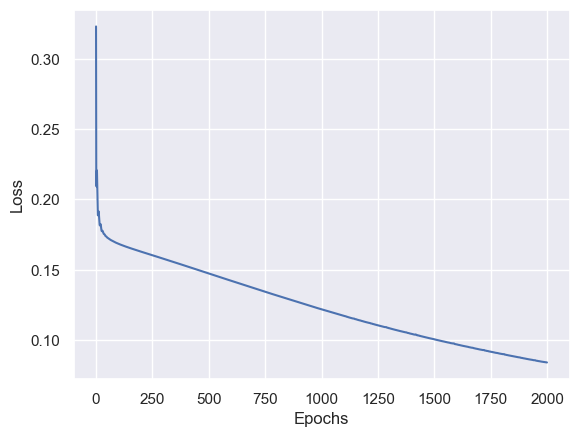

In [19]:
# Verify if is training correctly
plt.plot(historyTEFF.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

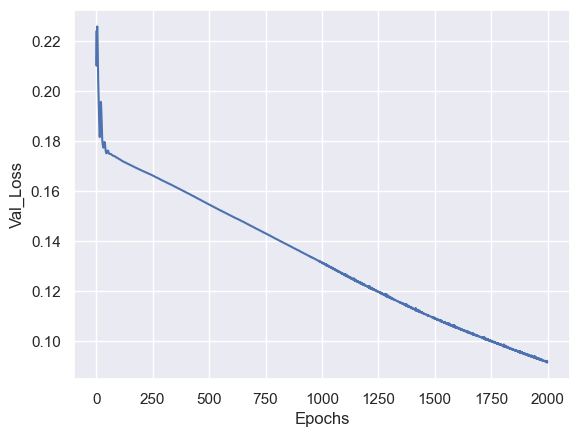

In [20]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyTEFF.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [21]:
modelTEFF.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\TEFF-Giants.h5


In [22]:
predTeff = modelTEFF.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [23]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0085_0019351   5050.93     2.429   -0.781        0.100   
iDR4_3_STRIPE82-0006_0021187   4939.77     3.278   -0.233        0.125   
iDR4_3_STRIPE82-0008_0022177   4715.82     2.321   -0.690        0.206   
iDR4_3_SPLUS-s02s23_0002586    4664.33     2.520   -0.433        0.217   
iDR4_3_SPLUS-n05s44_0037296    5213.97     3.351   -0.591        0.059   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0130_0030550   4758.38     2.520   -0.401        0.162   
iDR4_3_STRIPE82-0004_0021650   5090.87     3.427   -0.303        0.154   
iDR4_3_SPLUS-s02s23_0002586    4643.88     2.501   -0.444        0.192   
iDR4_3_STRIPE82-0132_0037300   5481.54     2.869   -1.001        0.209   
iDR4_3_STRIPE82-0134_0035285   4903.08     2.312   -0.604        0.214   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0085_0019351  0.00060 -0.00584  0.18966  0.12192  0.08413   
iDR4_3_STRIPE82-0006_0021187  0.13984  0.08199 -0.00253  0.22732  0.04072   
iDR4_3_STRIPE82-0008_0022177  0.12551  0.21158 -0.02777  0.27152  0.20610   
iDR4_3_SPLUS-s02s23_0002586   0.11889  0.18692  0.06594  0.30839  0.20952   
iDR4_3_SPLUS-n05s44_0037296   0.14198  0.07521  0.04166  0.09914  0.03649   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0130_0030550  0.19900  0.09656  0.07049  0.21585  0.17819   
iDR4_3_STRIPE82-0004_0021650  0.14779  0.15247  0.03833  0.23704  0.12388   
iDR4_3_SPLUS-s02s23_0002586   0.09952  0.17624  0.05140  0.26303  0.19020   
iDR4_3_STRIPE82-0132_0037300  0.01152  0.07769  0.06400  0.26638  0.19381   
iDR4_3_STRIPE82-0134_0035285  0.15979  0.15678  0.10605  0.29186  0.21162   

                                ni_fe  teffEncoded  
ID                                                  
iDR4_3_STRIPE82-0085_0019351  0.03775     0.204986  
iDR4_3_STRIPE82-0006_0021187  0.05824     0.073262  
iDR4_3_STRIPE82-0008_0022177  0.06707    -0.192117  
iDR4_3_SPLUS-s02s23_0002586   0.10566    -0.253133  
iDR4_3_SPLUS-n05s44_0037296   0.06461     0.398188  
...                               ...          ...  
iDR4_3_STRIPE82-0130_0030550  0.10353    -0.141684  
iDR4_3_STRIPE82-0004_0021650  0.08799     0.252315  
iDR4_3_SPLUS-s02s23_0002586   0.08703    -0.277366  
iDR4_3_STRIPE82-0132_0037300  0.04946     0.715257  
iDR4_3_STRIPE82-0134_0035285  0.06509     0.029785  

[121 rows x 11 columns]

In [24]:
predaux = encoder.decode_DataFrame(predTeff, 'teffGalah')
Y_test['TEFF_PredictDecoded'] = predaux

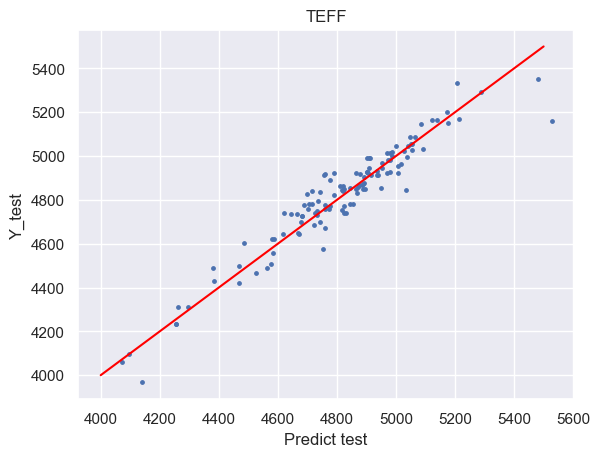

In [25]:
plt.scatter(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'], s=6)
plt.title(Parametro)
#plt.xlim(-0.5, 1)
#plt.ylim(-0.5, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([4000, 5500], [4000, 5500], c='red')

In [26]:
score = r2_score(Y_test['teff_cnn'], Y_test['TEFF_PredictDecoded'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 91.0%


In [27]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0085_0019351   5050.93     2.429   -0.781        0.100   
iDR4_3_STRIPE82-0006_0021187   4939.77     3.278   -0.233        0.125   
iDR4_3_STRIPE82-0008_0022177   4715.82     2.321   -0.690        0.206   
iDR4_3_SPLUS-s02s23_0002586    4664.33     2.520   -0.433        0.217   
iDR4_3_SPLUS-n05s44_0037296    5213.97     3.351   -0.591        0.059   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0130_0030550   4758.38     2.520   -0.401        0.162   
iDR4_3_STRIPE82-0004_0021650   5090.87     3.427   -0.303        0.154   
iDR4_3_SPLUS-s02s23_0002586    4643.88     2.501   -0.444        0.192   
iDR4_3_STRIPE82-0132_0037300   5481.54     2.869   -1.001        0.209   
iDR4_3_STRIPE82-0134_0035285   4903.08     2.312   -0.604        0.214   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0085_0019351  0.00060 -0.00584  0.18966  0.12192  0.08413   
iDR4_3_STRIPE82-0006_0021187  0.13984  0.08199 -0.00253  0.22732  0.04072   
iDR4_3_STRIPE82-0008_0022177  0.12551  0.21158 -0.02777  0.27152  0.20610   
iDR4_3_SPLUS-s02s23_0002586   0.11889  0.18692  0.06594  0.30839  0.20952   
iDR4_3_SPLUS-n05s44_0037296   0.14198  0.07521  0.04166  0.09914  0.03649   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0130_0030550  0.19900  0.09656  0.07049  0.21585  0.17819   
iDR4_3_STRIPE82-0004_0021650  0.14779  0.15247  0.03833  0.23704  0.12388   
iDR4_3_SPLUS-s02s23_0002586   0.09952  0.17624  0.05140  0.26303  0.19020   
iDR4_3_STRIPE82-0132_0037300  0.01152  0.07769  0.06400  0.26638  0.19381   
iDR4_3_STRIPE82-0134_0035285  0.15979  0.15678  0.10605  0.29186  0.21162   

                                ni_fe  teffEncoded  TEFF_PredictDecoded  
ID                                                                       
iDR4_3_STRIPE82-0085_0019351  0.03775     0.204986          5054.622559  
iDR4_3_STRIPE82-0006_0021187  0.05824     0.073262          4912.376953  
iDR4_3_STRIPE82-0008_0022177  0.06707    -0.192117          4839.132324  
iDR4_3_SPLUS-s02s23_0002586   0.10566    -0.253133          4737.731445  
iDR4_3_SPLUS-n05s44_0037296   0.06461     0.398188          5168.571289  
...                               ...          ...                  ...  
iDR4_3_STRIPE82-0130_0030550  0.10353    -0.141684          4670.283203  
iDR4_3_STRIPE82-0004_0021650  0.08799     0.252315          5033.336914  
iDR4_3_SPLUS-s02s23_0002586   0.08703    -0.277366          4737.661133  
iDR4_3_STRIPE82-0132_0037300  0.04946     0.715257          5351.095215  
iDR4_3_STRIPE82-0134_0035285  0.06509     0.029785          4926.880371  

[121 rows x 12 columns]

In [28]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Logg

In [29]:
Parametro = "LOGG"
columnTrain = 'logg_cnn'

AouG = "Giants"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [30]:
modelLOGG = training_model()

In [31]:
# Treinando e guardando o modelo
historyLOGG = modelLOGG.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 6.6254 - val_loss: 5.3339 - 829ms/epoch - 829ms/step
Epoch 2/2000
1/1 - 0s - loss: 5.4747 - val_loss: 4.4040 - 67ms/epoch - 67ms/step
Epoch 3/2000
1/1 - 0s - loss: 4.4967 - val_loss: 3.6141 - 59ms/epoch - 59ms/step
Epoch 4/2000
1/1 - 0s - loss: 3.6625 - val_loss: 2.9320 - 58ms/epoch - 58ms/step
Epoch 5/2000
1/1 - 0s - loss: 2.9554 - val_loss: 2.3725 - 56ms/epoch - 56ms/step
Epoch 6/2000
1/1 - 0s - loss: 2.3803 - val_loss: 1.9435 - 54ms/epoch - 54ms/step
Epoch 7/2000
1/1 - 0s - loss: 1.9404 - val_loss: 1.6374 - 57ms/epoch - 57ms/step
Epoch 8/2000
1/1 - 0s - loss: 1.6356 - val_loss: 1.4462 - 54ms/epoch - 54ms/step
Epoch 9/2000
1/1 - 0s - loss: 1.4501 - val_loss: 1.3490 - 56ms/epoch - 56ms/step
Epoch 10/2000
1/1 - 0s - loss: 1.3574 - val_loss: 1.3091 - 50ms/epoch - 50ms/step
Epoch 11/2000
1/1 - 0s - loss: 1.3215 - val_loss: 1.2882 - 55ms/epoch - 55ms/step
Epoch 12/2000
1/1 - 0s - loss: 1.3045 - val_loss: 1.2556 - 53ms/epoch - 53ms/step
Epoch 13/2000
1/1 - 0s - loss: 1.273

Text(0, 0.5, 'Loss')

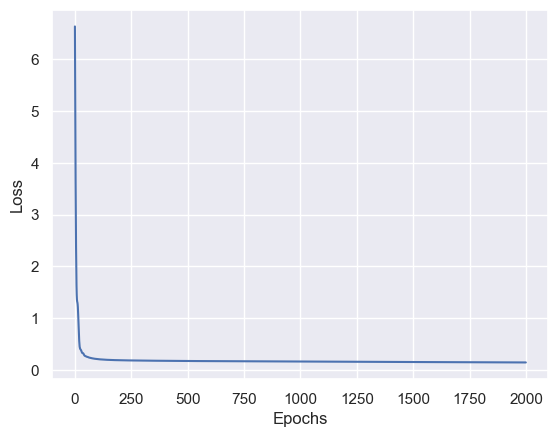

In [32]:
# plota as loss para ver se está treinando
plt.plot(historyLOGG.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

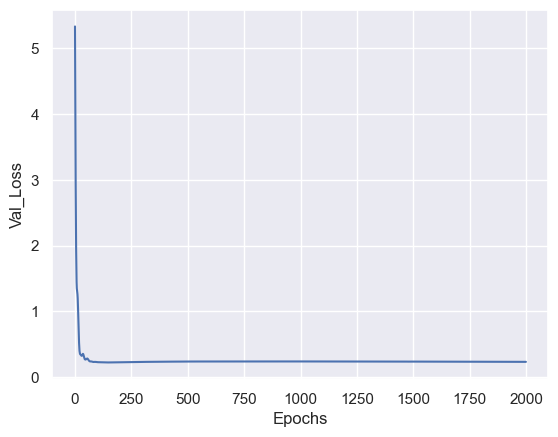

In [33]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyLOGG.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [34]:
modelLOGG.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\LOGG-Giants.h5


In [35]:
predlogg = modelLOGG.predict(X_test)

1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 3ms/step


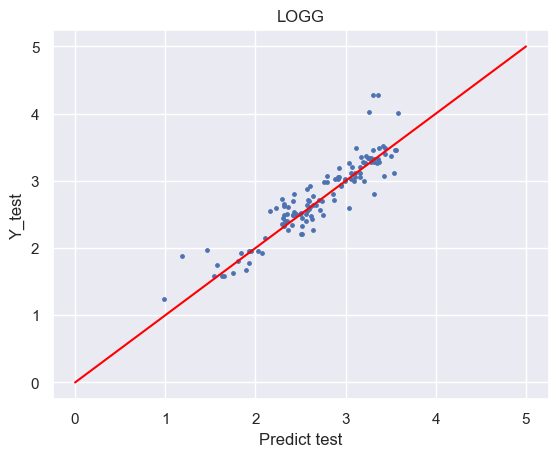

In [36]:
plt.scatter(Y_test[[columnTrain]], predlogg, s=6)
plt.title(Parametro)
#plt.xlim(3.8, 4.8)
#plt.ylim(3.8, 4.8)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([0, 5], [0, 5], c='red')

plt.grid(True)

In [37]:
score = r2_score(Y_test[columnTrain], predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 81.0%


In [38]:
Y_test['LOGG_Predict'] = predlogg

In [39]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0085_0019351   5050.93     2.429   -0.781        0.100   
iDR4_3_STRIPE82-0006_0021187   4939.77     3.278   -0.233        0.125   
iDR4_3_STRIPE82-0008_0022177   4715.82     2.321   -0.690        0.206   
iDR4_3_SPLUS-s02s23_0002586    4664.33     2.520   -0.433        0.217   
iDR4_3_SPLUS-n05s44_0037296    5213.97     3.351   -0.591        0.059   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0130_0030550   4758.38     2.520   -0.401        0.162   
iDR4_3_STRIPE82-0004_0021650   5090.87     3.427   -0.303        0.154   
iDR4_3_SPLUS-s02s23_0002586    4643.88     2.501   -0.444        0.192   
iDR4_3_STRIPE82-0132_0037300   5481.54     2.869   -1.001        0.209   
iDR4_3_STRIPE82-0134_0035285   4903.08     2.312   -0.604        0.214   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0085_0019351  0.00060 -0.00584  0.18966  0.12192  0.08413   
iDR4_3_STRIPE82-0006_0021187  0.13984  0.08199 -0.00253  0.22732  0.04072   
iDR4_3_STRIPE82-0008_0022177  0.12551  0.21158 -0.02777  0.27152  0.20610   
iDR4_3_SPLUS-s02s23_0002586   0.11889  0.18692  0.06594  0.30839  0.20952   
iDR4_3_SPLUS-n05s44_0037296   0.14198  0.07521  0.04166  0.09914  0.03649   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0130_0030550  0.19900  0.09656  0.07049  0.21585  0.17819   
iDR4_3_STRIPE82-0004_0021650  0.14779  0.15247  0.03833  0.23704  0.12388   
iDR4_3_SPLUS-s02s23_0002586   0.09952  0.17624  0.05140  0.26303  0.19020   
iDR4_3_STRIPE82-0132_0037300  0.01152  0.07769  0.06400  0.26638  0.19381   
iDR4_3_STRIPE82-0134_0035285  0.15979  0.15678  0.10605  0.29186  0.21162   

                                ni_fe  teffEncoded  TEFF_PredictDecoded  \
ID                                                                        
iDR4_3_STRIPE82-0085_0019351  0.03775     0.204986          5054.622559   
iDR4_3_STRIPE82-0006_0021187  0.05824     0.073262          4912.376953   
iDR4_3_STRIPE82-0008_0022177  0.06707    -0.192117          4839.132324   
iDR4_3_SPLUS-s02s23_0002586   0.10566    -0.253133          4737.731445   
iDR4_3_SPLUS-n05s44_0037296   0.06461     0.398188          5168.571289   
...                               ...          ...                  ...   
iDR4_3_STRIPE82-0130_0030550  0.10353    -0.141684          4670.283203   
iDR4_3_STRIPE82-0004_0021650  0.08799     0.252315          5033.336914   
iDR4_3_SPLUS-s02s23_0002586   0.08703    -0.277366          4737.661133   
iDR4_3_STRIPE82-0132_0037300  0.04946     0.715257          5351.095215   
iDR4_3_STRIPE82-0134_0035285  0.06509     0.029785          4926.880371   

                              LOGG_Predict  
ID                                          
iDR4_3_STRIPE82-0085_0019351      2.540922  
iDR4_3_STRIPE82-0006_0021187      3.336416  
iDR4_3_STRIPE82-0008_0022177      2.624899  
iDR4_3_SPLUS-s02s23_0002586       2.211818  
iDR4_3_SPLUS-n05s44_0037296       3.272360  
...                                    ...  
iDR4_3_STRIPE82-0130_0030550      2.334772  
iDR4_3_STRIPE82-0004_0021650      3.072844  
iDR4_3_SPLUS-s02s23_0002586       2.212369  
iDR4_3_STRIPE82-0132_0037300      2.718287  
iDR4_3_STRIPE82-0134_0035285      2.497504  

[121 rows x 13 columns]

In [40]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### FEH

In [41]:
Parametro = "FEH"
columnTrain = 'feh_cnn'

AouG = "Giants"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [42]:
modelFEH = training_model()

In [43]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyFEH = modelFEH.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 0.6841 - val_loss: 0.3610 - 670ms/epoch - 670ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.4171 - val_loss: 0.2431 - 65ms/epoch - 65ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.2722 - val_loss: 0.2151 - 66ms/epoch - 66ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.2312 - val_loss: 0.2380 - 64ms/epoch - 64ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.2507 - val_loss: 0.2654 - 62ms/epoch - 62ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.2796 - val_loss: 0.2736 - 53ms/epoch - 53ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.2887 - val_loss: 0.2626 - 57ms/epoch - 57ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.2767 - val_loss: 0.2430 - 62ms/epoch - 62ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.2539 - val_loss: 0.2248 - 47ms/epoch - 47ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.2314 - val_loss: 0.2137 - 51ms/epoch - 51ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.2156 - val_loss: 0.2098 - 52ms/epoch - 52ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.2084 - val_loss: 0.2113 - 50ms/epoch - 50ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.208

Text(0, 0.5, 'Loss')

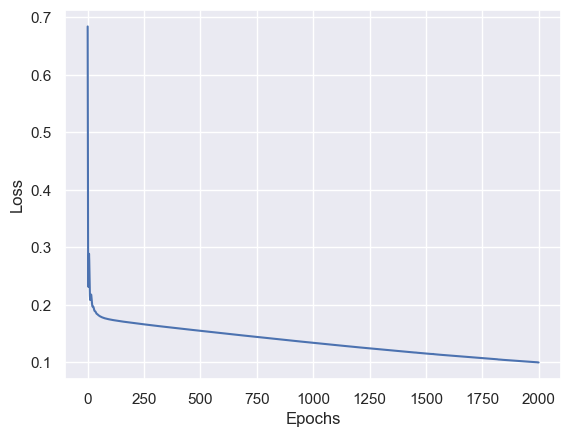

In [44]:
# plota as loss para ver se está treinando
plt.plot(historyFEH.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

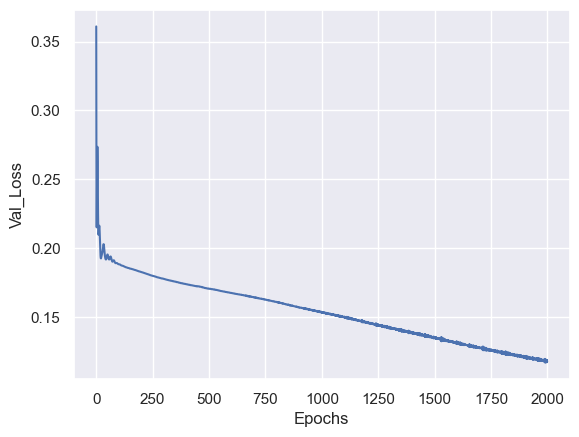

In [45]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyFEH.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [46]:
modelFEH.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\FEH-Giants.h5


In [47]:
predfeh = modelFEH.predict(X_test)

4/4 [==============================] - 0s 5ms/step


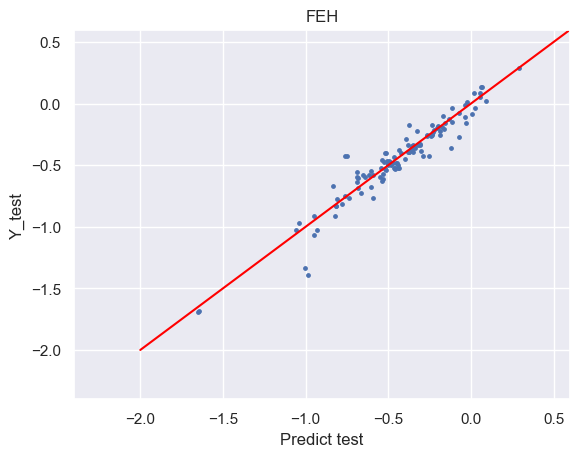

In [48]:
plt.scatter(Y_test[[columnTrain]], predfeh, s=6)
plt.title(Parametro)
plt.xlim(-2.4, 0.6)
plt.ylim(-2.4, 0.6)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([-2, 1], [-2, 1], c='red')

In [49]:
score = r2_score(Y_test[columnTrain], predfeh)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 91.0%


In [50]:
Y_test['FEH_Predict'] = predfeh

In [51]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0085_0019351   5050.93     2.429   -0.781        0.100   
iDR4_3_STRIPE82-0006_0021187   4939.77     3.278   -0.233        0.125   
iDR4_3_STRIPE82-0008_0022177   4715.82     2.321   -0.690        0.206   
iDR4_3_SPLUS-s02s23_0002586    4664.33     2.520   -0.433        0.217   
iDR4_3_SPLUS-n05s44_0037296    5213.97     3.351   -0.591        0.059   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0130_0030550   4758.38     2.520   -0.401        0.162   
iDR4_3_STRIPE82-0004_0021650   5090.87     3.427   -0.303        0.154   
iDR4_3_SPLUS-s02s23_0002586    4643.88     2.501   -0.444        0.192   
iDR4_3_STRIPE82-0132_0037300   5481.54     2.869   -1.001        0.209   
iDR4_3_STRIPE82-0134_0035285   4903.08     2.312   -0.604        0.214   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0085_0019351  0.00060 -0.00584  0.18966  0.12192  0.08413   
iDR4_3_STRIPE82-0006_0021187  0.13984  0.08199 -0.00253  0.22732  0.04072   
iDR4_3_STRIPE82-0008_0022177  0.12551  0.21158 -0.02777  0.27152  0.20610   
iDR4_3_SPLUS-s02s23_0002586   0.11889  0.18692  0.06594  0.30839  0.20952   
iDR4_3_SPLUS-n05s44_0037296   0.14198  0.07521  0.04166  0.09914  0.03649   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0130_0030550  0.19900  0.09656  0.07049  0.21585  0.17819   
iDR4_3_STRIPE82-0004_0021650  0.14779  0.15247  0.03833  0.23704  0.12388   
iDR4_3_SPLUS-s02s23_0002586   0.09952  0.17624  0.05140  0.26303  0.19020   
iDR4_3_STRIPE82-0132_0037300  0.01152  0.07769  0.06400  0.26638  0.19381   
iDR4_3_STRIPE82-0134_0035285  0.15979  0.15678  0.10605  0.29186  0.21162   

                                ni_fe  teffEncoded  TEFF_PredictDecoded  \
ID                                                                        
iDR4_3_STRIPE82-0085_0019351  0.03775     0.204986          5054.622559   
iDR4_3_STRIPE82-0006_0021187  0.05824     0.073262          4912.376953   
iDR4_3_STRIPE82-0008_0022177  0.06707    -0.192117          4839.132324   
iDR4_3_SPLUS-s02s23_0002586   0.10566    -0.253133          4737.731445   
iDR4_3_SPLUS-n05s44_0037296   0.06461     0.398188          5168.571289   
...                               ...          ...                  ...   
iDR4_3_STRIPE82-0130_0030550  0.10353    -0.141684          4670.283203   
iDR4_3_STRIPE82-0004_0021650  0.08799     0.252315          5033.336914   
iDR4_3_SPLUS-s02s23_0002586   0.08703    -0.277366          4737.661133   
iDR4_3_STRIPE82-0132_0037300  0.04946     0.715257          5351.095215   
iDR4_3_STRIPE82-0134_0035285  0.06509     0.029785          4926.880371   

                              LOGG_Predict  FEH_Predict  
ID                                                       
iDR4_3_STRIPE82-0085_0019351      2.540922    -0.816936  
iDR4_3_STRIPE82-0006_0021187      3.336416    -0.244105  
iDR4_3_STRIPE82-0008_0022177      2.624899    -0.555577  
iDR4_3_SPLUS-s02s23_0002586       2.211818    -0.520649  
iDR4_3_SPLUS-n05s44_0037296       3.272360    -0.581928  
...                                    ...          ...  
iDR4_3_STRIPE82-0130_0030550      2.334772    -0.446089  
iDR4_3_STRIPE82-0004_0021650      3.072844    -0.388557  
iDR4_3_SPLUS-s02s23_0002586       2.212369    -0.520551  
iDR4_3_STRIPE82-0132_0037300      2.718287    -1.336620  
iDR4_3_STRIPE82-0134_0035285      2.497504    -0.677981  

[121 rows x 14 columns]

In [52]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### Outros Parametros

In [53]:
GigCores = pd.read_csv(f"E:\\IC\\BasesTreino\\{NomeBase}-Colors-{AouG}.csv", index_col = 'ID')

In [54]:
GigCores

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n02n18_0040367   0.4047  0.5127  1.3164  1.4722  2.0192  2.2783   
iDR4_3_SPLUS-n02n18_0040367   0.4047  0.5127  1.3164  1.4722  2.0192  2.2783   
iDR4_3_SPLUS-n02n18_0011183   0.2466  0.5170  1.1153  1.2514  1.7919  1.9920   
iDR4_3_SPLUS-n02n18_0025206   0.4007  0.4971  1.2608  1.4048  1.9161  2.1693   
iDR4_3_SPLUS-n02n18_0003092   0.3187  0.5650  1.4537  1.6906  2.2825  2.5805   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0163_0031103  0.3416  0.5984  1.4870  1.7115  2.3309  2.5716   
iDR4_3_STRIPE82-0163_0041976  0.3780  0.5719  1.3213  1.5276  2.1548  2.3771   
iDR4_3_STRIPE82-0166_0028340  0.4236  0.4585  1.0713  1.1690  1.6709  1.8890   
iDR4_3_STRIPE82-0165_0031237  0.4161  0.4727  1.1106  1.1908  1.7291  1.9392   
iDR4_3_STRIPE82-0163_0039628  0.4417  0.5778  1.3876  1.6307  2.3564  2.6011   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n02n18_0040367   2.6965  2.7886  2.8625  3.0889  ...   4789.15   
iDR4_3_SPLUS-n02n18_0040367   2.6965  2.7886  2.8625  3.0889  ...   4804.06   
iDR4_3_SPLUS-n02n18_0011183   2.4705  2.5338  2.6716  2.7148  ...   5123.46   
iDR4_3_SPLUS-n02n18_0025206   2.5588  2.6398  2.8074  2.8809  ...   4959.57   
iDR4_3_SPLUS-n02n18_0003092   2.5372  2.8415  2.6261  3.1762  ...   4680.74   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0163_0031103  3.0602  3.1522  3.3478  3.3961  ...   4715.12   
iDR4_3_STRIPE82-0163_0041976  2.9205  3.0236  3.2169  3.3138  ...   4671.20   
iDR4_3_STRIPE82-0166_0028340  2.3085  2.3802  2.5155  2.5999  ...   5008.00   
iDR4_3_STRIPE82-0165_0031237  2.3197  2.3805  2.5584  2.6231  ...   5032.06   
iDR4_3_STRIPE82-0163_0039628  3.2250  3.3316  3.5800  3.6980  ...   4378.86   

                              logg_cnn  feh_cnn  alpha_m_cnn     c_fe  \
ID                                                                      
iDR4_3_SPLUS-n02n18_0040367      2.296   -0.498        0.240  0.16620   
iDR4_3_SPLUS-n02n18_0040367      2.361   -0.453        0.218  0.10956   
iDR4_3_SPLUS-n02n18_0011183      3.404   -0.311        0.018  0.06569   
iDR4_3_SPLUS-n02n18_0025206      2.426   -0.571        0.199  0.06753   
iDR4_3_SPLUS-n02n18_0003092      2.295   -0.233        0.115  0.08496   
...                                ...      ...          ...      ...   
iDR4_3_STRIPE82-0163_0031103     2.569   -0.239        0.050  0.04375   
iDR4_3_STRIPE82-0163_0041976     2.624   -0.443        0.205  0.13203   
iDR4_3_STRIPE82-0166_0028340     2.954   -0.681        0.186  0.02060   
iDR4_3_STRIPE82-0165_0031237     2.894   -0.641        0.067  0.00494   
iDR4_3_STRIPE82-0163_0039628     1.842   -0.739        0.230  0.06055   

                                ca_fe     n_fe    mg_fe    si_fe    ni_fe  
ID                                                                         
iDR4_3_SPLUS-n02n18_0040367   0.18384  0.05803  0.32707  0.24229  0.10500  
iDR4_3_SPLUS-n02n18_0040367   0.16368  0.06610  0.29503  0.22026  0.10765  
iDR4_3_SPLUS-n02n18_0011183   0.07622  0.04410  0.03736  0.01077  0.04453  
iDR4_3_SPLUS-n02n18_0025206   0.17040  0.31093  0.26964  0.19081  0.05049  
iDR4_3_SPLUS-n02n18_0003092   0.06443  0.05352  0.15806  0.12744  0.02627  
...                               ...      ...      ...      ...      ...  
iDR4_3_STRIPE82-0163_0031103  0.05086  0.11851  0.08580  0.04740  0.02504  
iDR4_3_STRIPE82-0163_0041976  0.20183 -0.01378  0.28625  0.18080  0.08982  
iDR4_3_STRIPE82-0166_0028340  0.20256  0.02479  0.24607  0.18357  0.05406  
iDR4_3_STRIPE82-0165_0031237  0.07843 -0.03247  0.09768  0.03390 -0.02448  
iDR4_3_STRIPE82-0163_0039628  0.19273  0.04158  0.30523  0.23189  0.07277  

[602 rows x 76 columns

In [55]:
print('TEFF =', GigCores['teff_cnn'].min())
print('LOGG = ', GigCores['logg_cnn'].min())
print('Feh = ', GigCores['feh_cnn'].min())
print('Alpha = ', GigCores['alpha_m_cnn'].min())

print('cfe =', GigCores['c_fe'].min())
print('cafe = ', GigCores['ca_fe'].min())
print('nfe = ', GigCores['n_fe'].min())
print('mgfe = ', GigCores['mg_fe'].min())
print('sife = ', GigCores['si_fe'].min())
print('nife = ', GigCores['ni_fe'].min())

TEFF = 4034.06
LOGG =  0.308
Feh =  -1.862
Alpha =  -0.016
cfe = -0.8645
cafe =  -0.08675
nfe =  -0.26151
mgfe =  -0.09373
sife =  -0.05048
nife =  -0.13236


In [56]:
GigCoresParams = GigCores

In [57]:
GigCoresParams

u-J378  u-J395  u-J410  u-J430     u-g  u-J515  \
ID                                                                             
iDR4_3_SPLUS-n02n18_0040367   0.4047  0.5127  1.3164  1.4722  2.0192  2.2783   
iDR4_3_SPLUS-n02n18_0040367   0.4047  0.5127  1.3164  1.4722  2.0192  2.2783   
iDR4_3_SPLUS-n02n18_0011183   0.2466  0.5170  1.1153  1.2514  1.7919  1.9920   
iDR4_3_SPLUS-n02n18_0025206   0.4007  0.4971  1.2608  1.4048  1.9161  2.1693   
iDR4_3_SPLUS-n02n18_0003092   0.3187  0.5650  1.4537  1.6906  2.2825  2.5805   
...                              ...     ...     ...     ...     ...     ...   
iDR4_3_STRIPE82-0163_0031103  0.3416  0.5984  1.4870  1.7115  2.3309  2.5716   
iDR4_3_STRIPE82-0163_0041976  0.3780  0.5719  1.3213  1.5276  2.1548  2.3771   
iDR4_3_STRIPE82-0166_0028340  0.4236  0.4585  1.0713  1.1690  1.6709  1.8890   
iDR4_3_STRIPE82-0165_0031237  0.4161  0.4727  1.1106  1.1908  1.7291  1.9392   
iDR4_3_STRIPE82-0163_0039628  0.4417  0.5778  1.3876  1.6307  2.3564  2.6011   

                                 u-r  u-J660     u-i  u-J861  ...  teff_cnn  \
ID                                                            ...             
iDR4_3_SPLUS-n02n18_0040367   2.6965  2.7886  2.8625  3.0889  ...   4789.15   
iDR4_3_SPLUS-n02n18_0040367   2.6965  2.7886  2.8625  3.0889  ...   4804.06   
iDR4_3_SPLUS-n02n18_0011183   2.4705  2.5338  2.6716  2.7148  ...   5123.46   
iDR4_3_SPLUS-n02n18_0025206   2.5588  2.6398  2.8074  2.8809  ...   4959.57   
iDR4_3_SPLUS-n02n18_0003092   2.5372  2.8415  2.6261  3.1762  ...   4680.74   
...                              ...     ...     ...     ...  ...       ...   
iDR4_3_STRIPE82-0163_0031103  3.0602  3.1522  3.3478  3.3961  ...   4715.12   
iDR4_3_STRIPE82-0163_0041976  2.9205  3.0236  3.2169  3.3138  ...   4671.20   
iDR4_3_STRIPE82-0166_0028340  2.3085  2.3802  2.5155  2.5999  ...   5008.00   
iDR4_3_STRIPE82-0165_0031237  2.3197  2.3805  2.5584  2.6231  ...   5032.06   
iDR4_3_STRIPE82-0163_0039628  3.2250  3.3316  3.5800  3.6980  ...   4378.86   

                              logg_cnn  feh_cnn  alpha_m_cnn     c_fe  \
ID                                                                      
iDR4_3_SPLUS-n02n18_0040367      2.296   -0.498        0.240  0.16620   
iDR4_3_SPLUS-n02n18_0040367      2.361   -0.453        0.218  0.10956   
iDR4_3_SPLUS-n02n18_0011183      3.404   -0.311        0.018  0.06569   
iDR4_3_SPLUS-n02n18_0025206      2.426   -0.571        0.199  0.06753   
iDR4_3_SPLUS-n02n18_0003092      2.295   -0.233        0.115  0.08496   
...                                ...      ...          ...      ...   
iDR4_3_STRIPE82-0163_0031103     2.569   -0.239        0.050  0.04375   
iDR4_3_STRIPE82-0163_0041976     2.624   -0.443        0.205  0.13203   
iDR4_3_STRIPE82-0166_0028340     2.954   -0.681        0.186  0.02060   
iDR4_3_STRIPE82-0165_0031237     2.894   -0.641        0.067  0.00494   
iDR4_3_STRIPE82-0163_0039628     1.842   -0.739        0.230  0.06055   

                                ca_fe     n_fe    mg_fe    si_fe    ni_fe  
ID                                                                         
iDR4_3_SPLUS-n02n18_0040367   0.18384  0.05803  0.32707  0.24229  0.10500  
iDR4_3_SPLUS-n02n18_0040367   0.16368  0.06610  0.29503  0.22026  0.10765  
iDR4_3_SPLUS-n02n18_0011183   0.07622  0.04410  0.03736  0.01077  0.04453  
iDR4_3_SPLUS-n02n18_0025206   0.17040  0.31093  0.26964  0.19081  0.05049  
iDR4_3_SPLUS-n02n18_0003092   0.06443  0.05352  0.15806  0.12744  0.02627  
...                               ...      ...      ...      ...      ...  
iDR4_3_STRIPE82-0163_0031103  0.05086  0.11851  0.08580  0.04740  0.02504  
iDR4_3_STRIPE82-0163_0041976  0.20183 -0.01378  0.28625  0.18080  0.08982  
iDR4_3_STRIPE82-0166_0028340  0.20256  0.02479  0.24607  0.18357  0.05406  
iDR4_3_STRIPE82-0165_0031237  0.07843 -0.03247  0.09768  0.03390 -0.02448  
iDR4_3_STRIPE82-0163_0039628  0.19273  0.04158  0.30523  0.23189  0.07277  

[602 rows x 76 columns

In [59]:
xtrain = GigCoresParams.iloc[:, :66]

In [60]:
columnYtrain =  ['teff_cnn', 'logg_cnn', 'feh_cnn', 'alpha_m_cnn', 
                 'c_fe', 'ca_fe', 'n_fe',
                 'mg_fe', 'si_fe', 'ni_fe']

In [61]:
ytrain = GigCoresParams[columnYtrain]

In [62]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores") #The input vector: 66 stellar colors

train_y = ytrain

In [63]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [64]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [65]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s43_0032581    4621.06     2.721    0.049        0.087   
iDR4_3_SPLUS-n03s28_0022725    4915.16     3.345   -0.236        0.105   
iDR4_3_SPLUS-n06s41_0032552    4782.32     2.387   -0.342        0.195   
iDR4_3_SPLUS-n01s38_0009714    5031.46     2.494   -0.726        0.187   
iDR4_3_STRIPE82-0132_0031788   4705.35     2.332   -0.292        0.155   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n05s44_0037296    5154.54     3.250   -0.579        0.049   
iDR4_3_SPLUS-n06s44_0004132    4916.93     3.109   -0.388        0.201   
iDR4_3_SPLUS-n01s28_0034030    4760.56     2.942   -0.248        0.188   
iDR4_3_SPLUS-n02n27_0037228    4794.98     2.741   -0.492        0.188   
iDR4_3_SPLUS-n06s42_0005899    4034.96     1.026   -1.068        0.288   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s43_0032581   0.14650  0.05069  0.15441  0.14531  0.08344   
iDR4_3_SPLUS-n03s28_0022725   0.08444  0.10858 -0.08554  0.16891  0.08693   
iDR4_3_SPLUS-n06s41_0032552   0.18332  0.12514  0.04605  0.26762  0.21114   
iDR4_3_SPLUS-n01s38_0009714   0.07441  0.11427  0.16901  0.26308  0.17898   
iDR4_3_STRIPE82-0132_0031788  0.14501  0.09157  0.11296  0.22066  0.15755   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n05s44_0037296   0.09404  0.05752  0.02645  0.08959  0.01584   
iDR4_3_SPLUS-n06s44_0004132   0.12854  0.20141  0.03762  0.29212  0.18138   
iDR4_3_SPLUS-n01s28_0034030   0.12487  0.15327  0.06312  0.27966  0.16952   
iDR4_3_SPLUS-n02n27_0037228   0.18303  0.16797 -0.00265  0.26885  0.17485   
iDR4_3_SPLUS-n06s42_0005899  -0.04898  0.27867  0.17740  0.37943  0.30575   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-n06s43_0032581   0.07233  
iDR4_3_SPLUS-n03s28_0022725   0.06500  
iDR4_3_SPLUS-n06s41_0032552   0.08854  
iDR4_3_SPLUS-n01s38_0009714   0.08427  
iDR4_3_STRIPE82-0132_0031788  0.06102  
...                               ...  
iDR4_3_SPLUS-n05s44_0037296   0.06125  
iDR4_3_SPLUS-n06s44_0004132   0.06613  
iDR4_3_SPLUS-n01s28_0034030   0.08634  
iDR4_3_SPLUS-n02n27_0037228   0.08755  
iDR4_3_SPLUS-n06s42_0005899   0.02684  

[432 rows x 10 columns]

### Alpha

In [168]:
Parametro = "Alpha"
columnTrain = 'alpha_m_cnn'

AouG = "Giants"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [67]:
modelAlpha = training_model()

In [68]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyAlpha = modelAlpha.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 0.4743 - val_loss: 0.2546 - 607ms/epoch - 607ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.2497 - val_loss: 0.2384 - 42ms/epoch - 42ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.2655 - val_loss: 0.2644 - 40ms/epoch - 40ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.3004 - val_loss: 0.2497 - 39ms/epoch - 39ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.2753 - val_loss: 0.2172 - 40ms/epoch - 40ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.2270 - val_loss: 0.1960 - 38ms/epoch - 38ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.1932 - val_loss: 0.1969 - 40ms/epoch - 40ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.1881 - val_loss: 0.2101 - 41ms/epoch - 41ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.2010 - val_loss: 0.2188 - 41ms/epoch - 41ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.2119 - val_loss: 0.2164 - 41ms/epoch - 41ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.2107 - val_loss: 0.2063 - 40ms/epoch - 40ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.2001 - val_loss: 0.1951 - 41ms/epoch - 41ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.187

Text(0, 0.5, 'Loss')

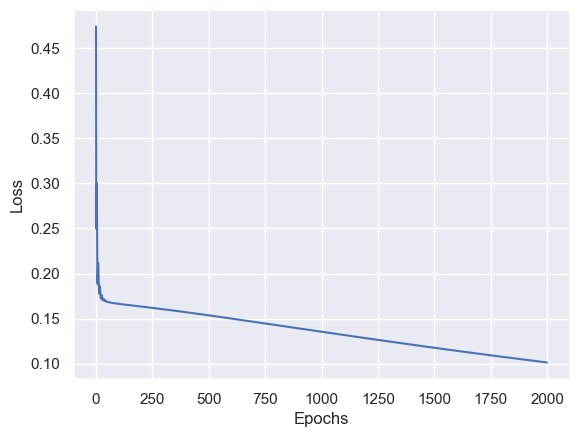

In [69]:
# plota as loss para ver se está treinando
plt.plot(historyAlpha.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

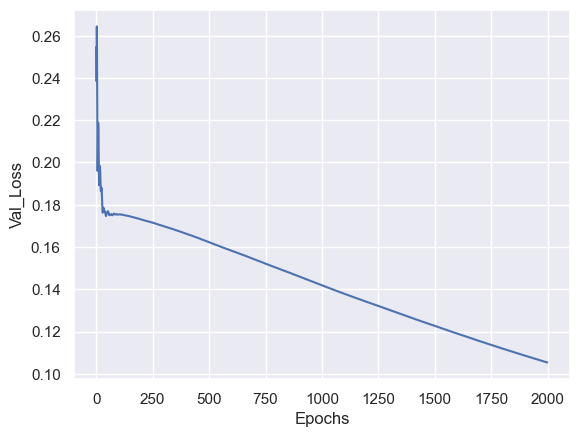

In [70]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyAlpha.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [71]:
modelAlpha.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\Alpha-Giants.h5


In [72]:
predalpha = modelAlpha.predict(X_test)

4/4 [==============================] - 0s 3ms/step


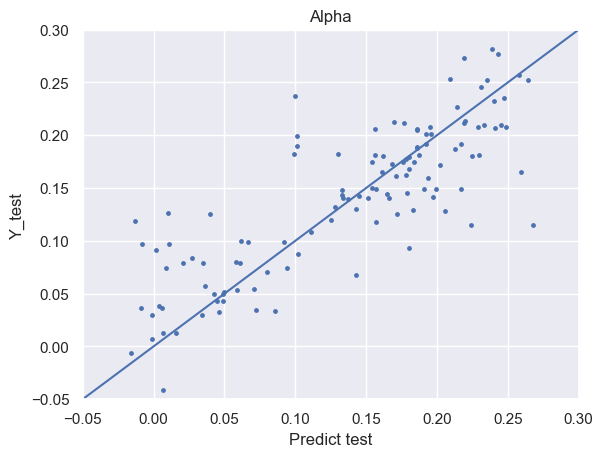

In [169]:
plt.scatter(Y_test[[columnTrain]], predalpha, s=6)
plt.title(Parametro)
plt.xlim(-0.05, 0.3)
plt.ylim(-0.05, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [74]:
score = r2_score(Y_test[columnTrain], predalpha)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 60.0%


In [75]:
Y_test['alpha_predict'] = predalpha

In [76]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0085_0019351   5050.93     2.429   -0.781        0.100   
iDR4_3_STRIPE82-0006_0021187   4939.77     3.278   -0.233        0.125   
iDR4_3_STRIPE82-0008_0022177   4715.82     2.321   -0.690        0.206   
iDR4_3_SPLUS-s02s23_0002586    4664.33     2.520   -0.433        0.217   
iDR4_3_SPLUS-n05s44_0037296    5213.97     3.351   -0.591        0.059   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0130_0030550   4758.38     2.520   -0.401        0.162   
iDR4_3_STRIPE82-0004_0021650   5090.87     3.427   -0.303        0.154   
iDR4_3_SPLUS-s02s23_0002586    4643.88     2.501   -0.444        0.192   
iDR4_3_STRIPE82-0132_0037300   5481.54     2.869   -1.001        0.209   
iDR4_3_STRIPE82-0134_0035285   4903.08     2.312   -0.604        0.214   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0085_0019351  0.00060 -0.00584  0.18966  0.12192  0.08413   
iDR4_3_STRIPE82-0006_0021187  0.13984  0.08199 -0.00253  0.22732  0.04072   
iDR4_3_STRIPE82-0008_0022177  0.12551  0.21158 -0.02777  0.27152  0.20610   
iDR4_3_SPLUS-s02s23_0002586   0.11889  0.18692  0.06594  0.30839  0.20952   
iDR4_3_SPLUS-n05s44_0037296   0.14198  0.07521  0.04166  0.09914  0.03649   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0130_0030550  0.19900  0.09656  0.07049  0.21585  0.17819   
iDR4_3_STRIPE82-0004_0021650  0.14779  0.15247  0.03833  0.23704  0.12388   
iDR4_3_SPLUS-s02s23_0002586   0.09952  0.17624  0.05140  0.26303  0.19020   
iDR4_3_STRIPE82-0132_0037300  0.01152  0.07769  0.06400  0.26638  0.19381   
iDR4_3_STRIPE82-0134_0035285  0.15979  0.15678  0.10605  0.29186  0.21162   

                                ni_fe  alpha_predict  
ID                                                    
iDR4_3_STRIPE82-0085_0019351  0.03775       0.236931  
iDR4_3_STRIPE82-0006_0021187  0.05824       0.119353  
iDR4_3_STRIPE82-0008_0022177  0.06707       0.128474  
iDR4_3_SPLUS-s02s23_0002586   0.10566       0.191741  
iDR4_3_SPLUS-n05s44_0037296   0.06461       0.053854  
...                               ...            ...  
iDR4_3_STRIPE82-0130_0030550  0.10353       0.180334  
iDR4_3_STRIPE82-0004_0021650  0.08799       0.150344  
iDR4_3_SPLUS-s02s23_0002586   0.08703       0.191600  
iDR4_3_STRIPE82-0132_0037300  0.04946       0.253103  
iDR4_3_STRIPE82-0134_0035285  0.06509       0.226863  

[121 rows x 11 columns]

In [77]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CFE

In [166]:
Parametro = "CFE"
columnTrain = 'c_fe'

AouG = "Giants"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [79]:
modelCFE = training_model()

In [80]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCFE = modelCFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 3.2980 - val_loss: 2.0306 - 770ms/epoch - 770ms/step
Epoch 2/2000
1/1 - 0s - loss: 2.1525 - val_loss: 1.2815 - 49ms/epoch - 49ms/step
Epoch 3/2000
1/1 - 0s - loss: 1.3483 - val_loss: 0.7801 - 58ms/epoch - 58ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.8020 - val_loss: 0.4680 - 50ms/epoch - 50ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.4609 - val_loss: 0.3007 - 48ms/epoch - 48ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.2781 - val_loss: 0.2410 - 50ms/epoch - 50ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.2102 - val_loss: 0.2511 - 45ms/epoch - 45ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.2226 - val_loss: 0.2986 - 51ms/epoch - 51ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.2815 - val_loss: 0.3531 - 61ms/epoch - 61ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.3468 - val_loss: 0.3895 - 48ms/epoch - 48ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.3906 - val_loss: 0.3999 - 45ms/epoch - 45ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.4029 - val_loss: 0.3856 - 42ms/epoch - 42ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.386

Text(0, 0.5, 'Loss')

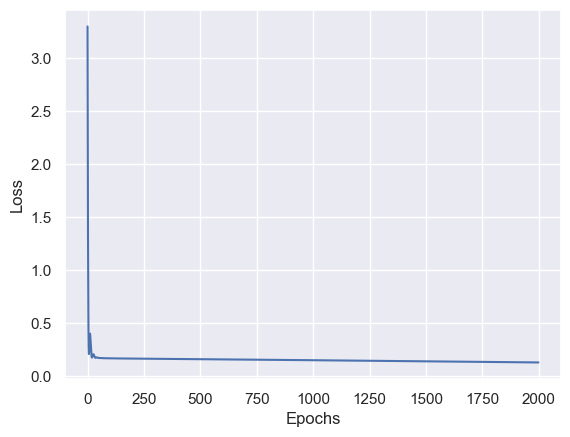

In [81]:
# plota as loss para ver se está treinando
plt.plot(historyCFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

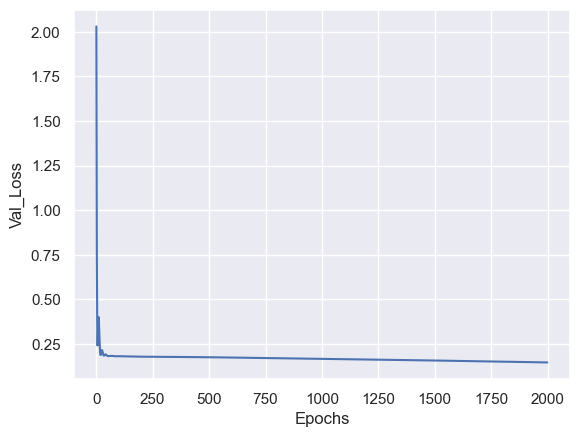

In [82]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [83]:
modelCFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\CFE-Giants.h5


In [84]:
predCFE = modelCFE.predict(X_test)

4/4 [==============================] - 0s 5ms/step


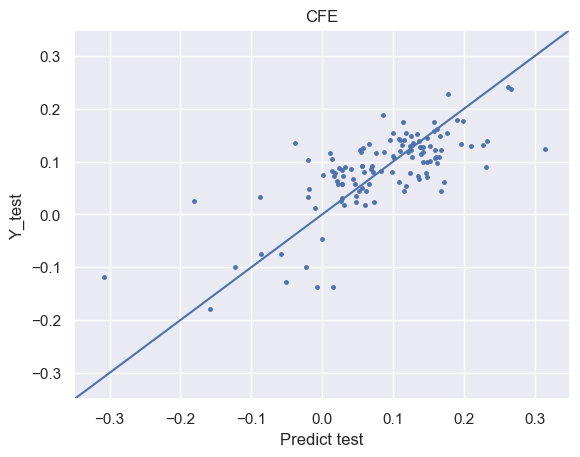

In [167]:
plt.scatter(Y_test[[columnTrain]], predCFE, s=6)
plt.title(Parametro)
plt.xlim(-0.35, 0.35)
plt.ylim(-0.35, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [86]:
score = r2_score(Y_test[columnTrain], predCFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 51.0%


In [87]:
Y_test['CFE_predict'] = predCFE

In [88]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0085_0019351   5050.93     2.429   -0.781        0.100   
iDR4_3_STRIPE82-0006_0021187   4939.77     3.278   -0.233        0.125   
iDR4_3_STRIPE82-0008_0022177   4715.82     2.321   -0.690        0.206   
iDR4_3_SPLUS-s02s23_0002586    4664.33     2.520   -0.433        0.217   
iDR4_3_SPLUS-n05s44_0037296    5213.97     3.351   -0.591        0.059   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0130_0030550   4758.38     2.520   -0.401        0.162   
iDR4_3_STRIPE82-0004_0021650   5090.87     3.427   -0.303        0.154   
iDR4_3_SPLUS-s02s23_0002586    4643.88     2.501   -0.444        0.192   
iDR4_3_STRIPE82-0132_0037300   5481.54     2.869   -1.001        0.209   
iDR4_3_STRIPE82-0134_0035285   4903.08     2.312   -0.604        0.214   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0085_0019351  0.00060 -0.00584  0.18966  0.12192  0.08413   
iDR4_3_STRIPE82-0006_0021187  0.13984  0.08199 -0.00253  0.22732  0.04072   
iDR4_3_STRIPE82-0008_0022177  0.12551  0.21158 -0.02777  0.27152  0.20610   
iDR4_3_SPLUS-s02s23_0002586   0.11889  0.18692  0.06594  0.30839  0.20952   
iDR4_3_SPLUS-n05s44_0037296   0.14198  0.07521  0.04166  0.09914  0.03649   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0130_0030550  0.19900  0.09656  0.07049  0.21585  0.17819   
iDR4_3_STRIPE82-0004_0021650  0.14779  0.15247  0.03833  0.23704  0.12388   
iDR4_3_SPLUS-s02s23_0002586   0.09952  0.17624  0.05140  0.26303  0.19020   
iDR4_3_STRIPE82-0132_0037300  0.01152  0.07769  0.06400  0.26638  0.19381   
iDR4_3_STRIPE82-0134_0035285  0.15979  0.15678  0.10605  0.29186  0.21162   

                                ni_fe  alpha_predict  CFE_predict  
ID                                                                 
iDR4_3_STRIPE82-0085_0019351  0.03775       0.236931     0.074960  
iDR4_3_STRIPE82-0006_0021187  0.05824       0.119353     0.113962  
iDR4_3_STRIPE82-0008_0022177  0.06707       0.128474     0.148594  
iDR4_3_SPLUS-s02s23_0002586   0.10566       0.191741     0.154891  
iDR4_3_SPLUS-n05s44_0037296   0.06461       0.053854     0.099842  
...                               ...            ...          ...  
iDR4_3_STRIPE82-0130_0030550  0.10353       0.180334     0.177887  
iDR4_3_STRIPE82-0004_0021650  0.08799       0.150344     0.070671  
iDR4_3_SPLUS-s02s23_0002586   0.08703       0.191600     0.154849  
iDR4_3_STRIPE82-0132_0037300  0.04946       0.253103     0.116629  
iDR4_3_STRIPE82-0134_0035285  0.06509       0.226863     0.106675  

[121 rows x 12 columns]

In [89]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### CAFE

In [163]:
Parametro = "CAFE"
columnTrain = 'ca_fe'

AouG = "Giants"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [91]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s43_0032581    4621.06     2.721    0.049        0.087   
iDR4_3_SPLUS-n03s28_0022725    4915.16     3.345   -0.236        0.105   
iDR4_3_SPLUS-n06s41_0032552    4782.32     2.387   -0.342        0.195   
iDR4_3_SPLUS-n01s38_0009714    5031.46     2.494   -0.726        0.187   
iDR4_3_STRIPE82-0132_0031788   4705.35     2.332   -0.292        0.155   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n05s44_0037296    5154.54     3.250   -0.579        0.049   
iDR4_3_SPLUS-n06s44_0004132    4916.93     3.109   -0.388        0.201   
iDR4_3_SPLUS-n01s28_0034030    4760.56     2.942   -0.248        0.188   
iDR4_3_SPLUS-n02n27_0037228    4794.98     2.741   -0.492        0.188   
iDR4_3_SPLUS-n06s42_0005899    4034.96     1.026   -1.068        0.288   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s43_0032581   0.14650  0.05069  0.15441  0.14531  0.08344   
iDR4_3_SPLUS-n03s28_0022725   0.08444  0.10858 -0.08554  0.16891  0.08693   
iDR4_3_SPLUS-n06s41_0032552   0.18332  0.12514  0.04605  0.26762  0.21114   
iDR4_3_SPLUS-n01s38_0009714   0.07441  0.11427  0.16901  0.26308  0.17898   
iDR4_3_STRIPE82-0132_0031788  0.14501  0.09157  0.11296  0.22066  0.15755   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n05s44_0037296   0.09404  0.05752  0.02645  0.08959  0.01584   
iDR4_3_SPLUS-n06s44_0004132   0.12854  0.20141  0.03762  0.29212  0.18138   
iDR4_3_SPLUS-n01s28_0034030   0.12487  0.15327  0.06312  0.27966  0.16952   
iDR4_3_SPLUS-n02n27_0037228   0.18303  0.16797 -0.00265  0.26885  0.17485   
iDR4_3_SPLUS-n06s42_0005899  -0.04898  0.27867  0.17740  0.37943  0.30575   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-n06s43_0032581   0.07233  
iDR4_3_SPLUS-n03s28_0022725   0.06500  
iDR4_3_SPLUS-n06s41_0032552   0.08854  
iDR4_3_SPLUS-n01s38_0009714   0.08427  
iDR4_3_STRIPE82-0132_0031788  0.06102  
...                               ...  
iDR4_3_SPLUS-n05s44_0037296   0.06125  
iDR4_3_SPLUS-n06s44_0004132   0.06613  
iDR4_3_SPLUS-n01s28_0034030   0.08634  
iDR4_3_SPLUS-n02n27_0037228   0.08755  
iDR4_3_SPLUS-n06s42_0005899   0.02684  

[432 rows x 10 columns]

In [92]:
modelCAFE = training_model()

In [93]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCAFE = modelCAFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/4000


1/1 - 1s - loss: 0.3363 - val_loss: 0.2140 - 625ms/epoch - 625ms/step
Epoch 2/4000
1/1 - 0s - loss: 0.2130 - val_loss: 0.2016 - 81ms/epoch - 81ms/step
Epoch 3/4000
1/1 - 0s - loss: 0.2030 - val_loss: 0.2155 - 74ms/epoch - 74ms/step
Epoch 4/4000
1/1 - 0s - loss: 0.2220 - val_loss: 0.2131 - 52ms/epoch - 52ms/step
Epoch 5/4000
1/1 - 0s - loss: 0.2190 - val_loss: 0.1995 - 46ms/epoch - 46ms/step
Epoch 6/4000
1/1 - 0s - loss: 0.2014 - val_loss: 0.1870 - 41ms/epoch - 41ms/step
Epoch 7/4000
1/1 - 0s - loss: 0.1845 - val_loss: 0.1824 - 44ms/epoch - 44ms/step
Epoch 8/4000
1/1 - 0s - loss: 0.1763 - val_loss: 0.1847 - 48ms/epoch - 48ms/step
Epoch 9/4000
1/1 - 0s - loss: 0.1765 - val_loss: 0.1898 - 54ms/epoch - 54ms/step
Epoch 10/4000
1/1 - 0s - loss: 0.1809 - val_loss: 0.1936 - 44ms/epoch - 44ms/step
Epoch 11/4000
1/1 - 0s - loss: 0.1844 - val_loss: 0.1939 - 51ms/epoch - 51ms/step
Epoch 12/4000
1/1 - 0s - loss: 0.1844 - val_loss: 0.1913 - 47ms/epoch - 47ms/step
Epoch 13/4000
1/1 - 0s - loss: 0.181

Text(0, 0.5, 'Loss')

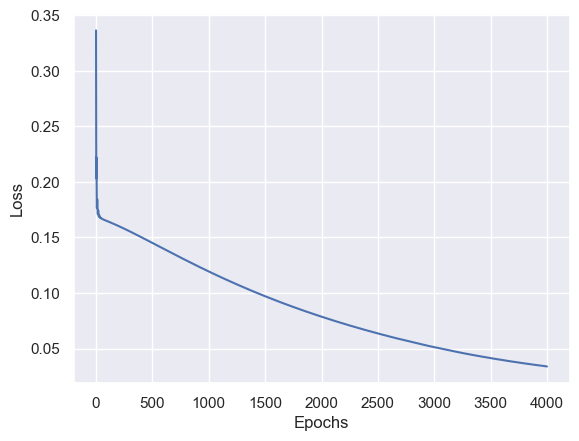

In [94]:
# plota as loss para ver se está treinando
plt.plot(historyCAFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

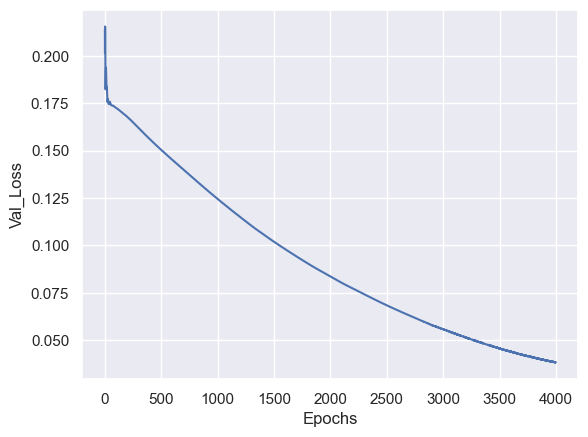

In [95]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCAFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [96]:
modelCAFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\CAFE-Giants.h5


In [97]:
predCAFE = modelCAFE.predict(X_test)

1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 7ms/step


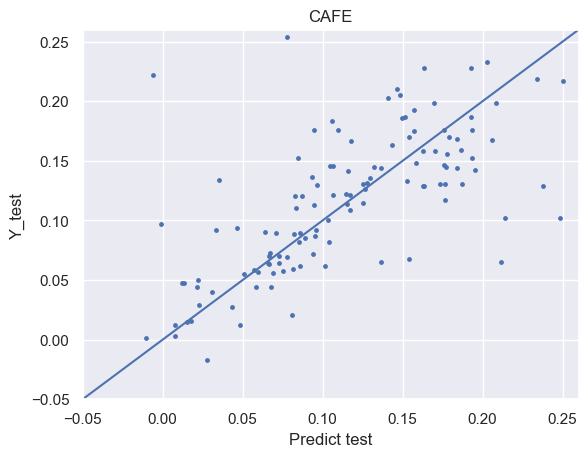

In [165]:
plt.scatter(Y_test[[columnTrain]], predCAFE, s=6)
plt.title(Parametro)
plt.xlim(-0.05, 0.26)
plt.ylim(-0.05, 0.26)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [99]:
score = r2_score(Y_test[columnTrain], predCAFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 27.0%


In [100]:
Y_test['CAFE_predict'] = predCAFE

In [101]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0085_0019351   5050.93     2.429   -0.781        0.100   
iDR4_3_STRIPE82-0006_0021187   4939.77     3.278   -0.233        0.125   
iDR4_3_STRIPE82-0008_0022177   4715.82     2.321   -0.690        0.206   
iDR4_3_SPLUS-s02s23_0002586    4664.33     2.520   -0.433        0.217   
iDR4_3_SPLUS-n05s44_0037296    5213.97     3.351   -0.591        0.059   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0130_0030550   4758.38     2.520   -0.401        0.162   
iDR4_3_STRIPE82-0004_0021650   5090.87     3.427   -0.303        0.154   
iDR4_3_SPLUS-s02s23_0002586    4643.88     2.501   -0.444        0.192   
iDR4_3_STRIPE82-0132_0037300   5481.54     2.869   -1.001        0.209   
iDR4_3_STRIPE82-0134_0035285   4903.08     2.312   -0.604        0.214   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0085_0019351  0.00060 -0.00584  0.18966  0.12192  0.08413   
iDR4_3_STRIPE82-0006_0021187  0.13984  0.08199 -0.00253  0.22732  0.04072   
iDR4_3_STRIPE82-0008_0022177  0.12551  0.21158 -0.02777  0.27152  0.20610   
iDR4_3_SPLUS-s02s23_0002586   0.11889  0.18692  0.06594  0.30839  0.20952   
iDR4_3_SPLUS-n05s44_0037296   0.14198  0.07521  0.04166  0.09914  0.03649   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0130_0030550  0.19900  0.09656  0.07049  0.21585  0.17819   
iDR4_3_STRIPE82-0004_0021650  0.14779  0.15247  0.03833  0.23704  0.12388   
iDR4_3_SPLUS-s02s23_0002586   0.09952  0.17624  0.05140  0.26303  0.19020   
iDR4_3_STRIPE82-0132_0037300  0.01152  0.07769  0.06400  0.26638  0.19381   
iDR4_3_STRIPE82-0134_0035285  0.15979  0.15678  0.10605  0.29186  0.21162   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0085_0019351  0.03775       0.236931     0.074960   
iDR4_3_STRIPE82-0006_0021187  0.05824       0.119353     0.113962   
iDR4_3_STRIPE82-0008_0022177  0.06707       0.128474     0.148594   
iDR4_3_SPLUS-s02s23_0002586   0.10566       0.191741     0.154891   
iDR4_3_SPLUS-n05s44_0037296   0.06461       0.053854     0.099842   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0130_0030550  0.10353       0.180334     0.177887   
iDR4_3_STRIPE82-0004_0021650  0.08799       0.150344     0.070671   
iDR4_3_SPLUS-s02s23_0002586   0.08703       0.191600     0.154849   
iDR4_3_STRIPE82-0132_0037300  0.04946       0.253103     0.116629   
iDR4_3_STRIPE82-0134_0035285  0.06509       0.226863     0.106675   

                              CAFE_predict  
ID                                          
iDR4_3_STRIPE82-0085_0019351      0.221684  
iDR4_3_STRIPE82-0006_0021187      0.088309  
iDR4_3_STRIPE82-0008_0022177      0.064948  
iDR4_3_SPLUS-s02s23_0002586       0.130163  
iDR4_3_SPLUS-n05s44_0037296       0.057777  
...                                    ...  
iDR4_3_STRIPE82-0130_0030550      0.129888  
iDR4_3_STRIPE82-0004_0021650      0.133055  
iDR4_3_SPLUS-s02s23_0002586       0.130270  
iDR4_3_STRIPE82-0132_0037300      0.253496  
iDR4_3_STRIPE82-0134_0035285      0.192900  

[121 rows x 13 columns]

In [102]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NFE

In [161]:
Parametro = "NFE"
columnTrain = 'n_fe'

AouG = "Giants"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [104]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s43_0032581    4621.06     2.721    0.049        0.087   
iDR4_3_SPLUS-n03s28_0022725    4915.16     3.345   -0.236        0.105   
iDR4_3_SPLUS-n06s41_0032552    4782.32     2.387   -0.342        0.195   
iDR4_3_SPLUS-n01s38_0009714    5031.46     2.494   -0.726        0.187   
iDR4_3_STRIPE82-0132_0031788   4705.35     2.332   -0.292        0.155   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n05s44_0037296    5154.54     3.250   -0.579        0.049   
iDR4_3_SPLUS-n06s44_0004132    4916.93     3.109   -0.388        0.201   
iDR4_3_SPLUS-n01s28_0034030    4760.56     2.942   -0.248        0.188   
iDR4_3_SPLUS-n02n27_0037228    4794.98     2.741   -0.492        0.188   
iDR4_3_SPLUS-n06s42_0005899    4034.96     1.026   -1.068        0.288   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s43_0032581   0.14650  0.05069  0.15441  0.14531  0.08344   
iDR4_3_SPLUS-n03s28_0022725   0.08444  0.10858 -0.08554  0.16891  0.08693   
iDR4_3_SPLUS-n06s41_0032552   0.18332  0.12514  0.04605  0.26762  0.21114   
iDR4_3_SPLUS-n01s38_0009714   0.07441  0.11427  0.16901  0.26308  0.17898   
iDR4_3_STRIPE82-0132_0031788  0.14501  0.09157  0.11296  0.22066  0.15755   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n05s44_0037296   0.09404  0.05752  0.02645  0.08959  0.01584   
iDR4_3_SPLUS-n06s44_0004132   0.12854  0.20141  0.03762  0.29212  0.18138   
iDR4_3_SPLUS-n01s28_0034030   0.12487  0.15327  0.06312  0.27966  0.16952   
iDR4_3_SPLUS-n02n27_0037228   0.18303  0.16797 -0.00265  0.26885  0.17485   
iDR4_3_SPLUS-n06s42_0005899  -0.04898  0.27867  0.17740  0.37943  0.30575   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-n06s43_0032581   0.07233  
iDR4_3_SPLUS-n03s28_0022725   0.06500  
iDR4_3_SPLUS-n06s41_0032552   0.08854  
iDR4_3_SPLUS-n01s38_0009714   0.08427  
iDR4_3_STRIPE82-0132_0031788  0.06102  
...                               ...  
iDR4_3_SPLUS-n05s44_0037296   0.06125  
iDR4_3_SPLUS-n06s44_0004132   0.06613  
iDR4_3_SPLUS-n01s28_0034030   0.08634  
iDR4_3_SPLUS-n02n27_0037228   0.08755  
iDR4_3_SPLUS-n06s42_0005899   0.02684  

[432 rows x 10 columns]

In [105]:
modelNFE = training_model()

In [106]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNFE = modelNFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 0.2537 - val_loss: 0.2137 - 689ms/epoch - 689ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.1939 - val_loss: 0.2051 - 61ms/epoch - 61ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.2065 - val_loss: 0.1933 - 60ms/epoch - 60ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.1972 - val_loss: 0.1815 - 53ms/epoch - 53ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.1835 - val_loss: 0.1791 - 58ms/epoch - 58ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.1814 - val_loss: 0.1832 - 63ms/epoch - 63ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.1870 - val_loss: 0.1846 - 46ms/epoch - 46ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.1886 - val_loss: 0.1810 - 39ms/epoch - 39ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.1840 - val_loss: 0.1761 - 36ms/epoch - 36ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.1781 - val_loss: 0.1738 - 33ms/epoch - 33ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.1753 - val_loss: 0.1746 - 37ms/epoch - 37ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.1763 - val_loss: 0.1767 - 36ms/epoch - 36ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.178

Text(0, 0.5, 'Loss')

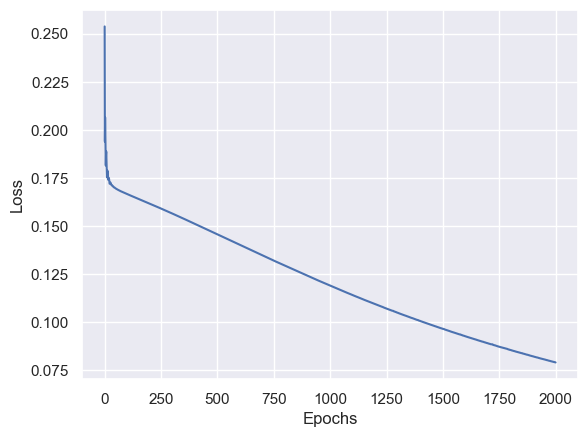

In [107]:
# plota as loss para ver se está treinando
plt.plot(historyNFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

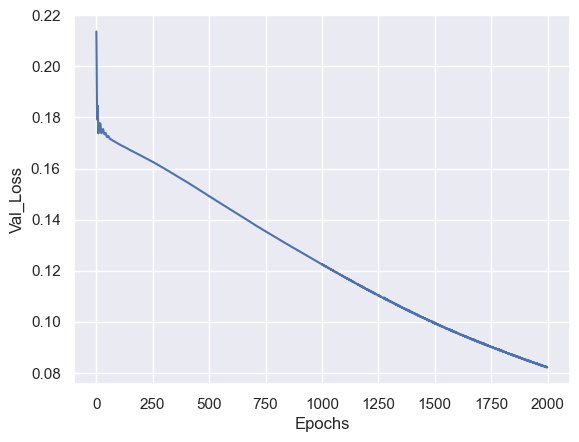

In [108]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [109]:
modelNFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\NFE-Giants.h5


In [110]:
predNFE = modelNFE.predict(X_test)

4/4 [==============================] - 0s 2ms/step


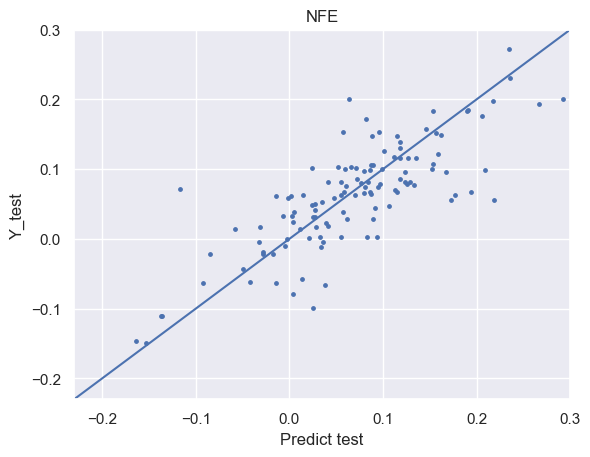

In [162]:
plt.scatter(Y_test[[columnTrain]], predNFE, s=6)
plt.title(Parametro)
plt.xlim(-0.23, 0.3)
plt.ylim(-0.23, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [112]:
score = r2_score(Y_test[columnTrain], predNFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 63.0%


In [113]:
Y_test['NFE_predict'] = predNFE

In [114]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0085_0019351   5050.93     2.429   -0.781        0.100   
iDR4_3_STRIPE82-0006_0021187   4939.77     3.278   -0.233        0.125   
iDR4_3_STRIPE82-0008_0022177   4715.82     2.321   -0.690        0.206   
iDR4_3_SPLUS-s02s23_0002586    4664.33     2.520   -0.433        0.217   
iDR4_3_SPLUS-n05s44_0037296    5213.97     3.351   -0.591        0.059   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0130_0030550   4758.38     2.520   -0.401        0.162   
iDR4_3_STRIPE82-0004_0021650   5090.87     3.427   -0.303        0.154   
iDR4_3_SPLUS-s02s23_0002586    4643.88     2.501   -0.444        0.192   
iDR4_3_STRIPE82-0132_0037300   5481.54     2.869   -1.001        0.209   
iDR4_3_STRIPE82-0134_0035285   4903.08     2.312   -0.604        0.214   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0085_0019351  0.00060 -0.00584  0.18966  0.12192  0.08413   
iDR4_3_STRIPE82-0006_0021187  0.13984  0.08199 -0.00253  0.22732  0.04072   
iDR4_3_STRIPE82-0008_0022177  0.12551  0.21158 -0.02777  0.27152  0.20610   
iDR4_3_SPLUS-s02s23_0002586   0.11889  0.18692  0.06594  0.30839  0.20952   
iDR4_3_SPLUS-n05s44_0037296   0.14198  0.07521  0.04166  0.09914  0.03649   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0130_0030550  0.19900  0.09656  0.07049  0.21585  0.17819   
iDR4_3_STRIPE82-0004_0021650  0.14779  0.15247  0.03833  0.23704  0.12388   
iDR4_3_SPLUS-s02s23_0002586   0.09952  0.17624  0.05140  0.26303  0.19020   
iDR4_3_STRIPE82-0132_0037300  0.01152  0.07769  0.06400  0.26638  0.19381   
iDR4_3_STRIPE82-0134_0035285  0.15979  0.15678  0.10605  0.29186  0.21162   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0085_0019351  0.03775       0.236931     0.074960   
iDR4_3_STRIPE82-0006_0021187  0.05824       0.119353     0.113962   
iDR4_3_STRIPE82-0008_0022177  0.06707       0.128474     0.148594   
iDR4_3_SPLUS-s02s23_0002586   0.10566       0.191741     0.154891   
iDR4_3_SPLUS-n05s44_0037296   0.06461       0.053854     0.099842   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0130_0030550  0.10353       0.180334     0.177887   
iDR4_3_STRIPE82-0004_0021650  0.08799       0.150344     0.070671   
iDR4_3_SPLUS-s02s23_0002586   0.08703       0.191600     0.154849   
iDR4_3_STRIPE82-0132_0037300  0.04946       0.253103     0.116629   
iDR4_3_STRIPE82-0134_0035285  0.06509       0.226863     0.106675   

                              CAFE_predict  NFE_predict  
ID                                                       
iDR4_3_STRIPE82-0085_0019351      0.221684     0.183109  
iDR4_3_STRIPE82-0006_0021187      0.088309     0.000113  
iDR4_3_STRIPE82-0008_0022177      0.064948    -0.019202  
iDR4_3_SPLUS-s02s23_0002586       0.130163     0.102755  
iDR4_3_SPLUS-n05s44_0037296       0.057777     0.019135  
...                                    ...          ...  
iDR4_3_STRIPE82-0130_0030550      0.129888     0.062791  
iDR4_3_STRIPE82-0004_0021650      0.133055    -0.066668  
iDR4_3_SPLUS-s02s23_0002586       0.130270     0.102735  
iDR4_3_STRIPE82-0132_0037300      0.253496     0.200216  
iDR4_3_STRIPE82-0134_0035285      0.192900     0.047233  

[121 rows x 14 columns]

In [115]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### MGFE

In [159]:
Parametro = "MGFE"
columnTrain = 'mg_fe'

AouG = "Giants"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [117]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s43_0032581    4621.06     2.721    0.049        0.087   
iDR4_3_SPLUS-n03s28_0022725    4915.16     3.345   -0.236        0.105   
iDR4_3_SPLUS-n06s41_0032552    4782.32     2.387   -0.342        0.195   
iDR4_3_SPLUS-n01s38_0009714    5031.46     2.494   -0.726        0.187   
iDR4_3_STRIPE82-0132_0031788   4705.35     2.332   -0.292        0.155   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n05s44_0037296    5154.54     3.250   -0.579        0.049   
iDR4_3_SPLUS-n06s44_0004132    4916.93     3.109   -0.388        0.201   
iDR4_3_SPLUS-n01s28_0034030    4760.56     2.942   -0.248        0.188   
iDR4_3_SPLUS-n02n27_0037228    4794.98     2.741   -0.492        0.188   
iDR4_3_SPLUS-n06s42_0005899    4034.96     1.026   -1.068        0.288   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s43_0032581   0.14650  0.05069  0.15441  0.14531  0.08344   
iDR4_3_SPLUS-n03s28_0022725   0.08444  0.10858 -0.08554  0.16891  0.08693   
iDR4_3_SPLUS-n06s41_0032552   0.18332  0.12514  0.04605  0.26762  0.21114   
iDR4_3_SPLUS-n01s38_0009714   0.07441  0.11427  0.16901  0.26308  0.17898   
iDR4_3_STRIPE82-0132_0031788  0.14501  0.09157  0.11296  0.22066  0.15755   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n05s44_0037296   0.09404  0.05752  0.02645  0.08959  0.01584   
iDR4_3_SPLUS-n06s44_0004132   0.12854  0.20141  0.03762  0.29212  0.18138   
iDR4_3_SPLUS-n01s28_0034030   0.12487  0.15327  0.06312  0.27966  0.16952   
iDR4_3_SPLUS-n02n27_0037228   0.18303  0.16797 -0.00265  0.26885  0.17485   
iDR4_3_SPLUS-n06s42_0005899  -0.04898  0.27867  0.17740  0.37943  0.30575   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-n06s43_0032581   0.07233  
iDR4_3_SPLUS-n03s28_0022725   0.06500  
iDR4_3_SPLUS-n06s41_0032552   0.08854  
iDR4_3_SPLUS-n01s38_0009714   0.08427  
iDR4_3_STRIPE82-0132_0031788  0.06102  
...                               ...  
iDR4_3_SPLUS-n05s44_0037296   0.06125  
iDR4_3_SPLUS-n06s44_0004132   0.06613  
iDR4_3_SPLUS-n01s28_0034030   0.08634  
iDR4_3_SPLUS-n02n27_0037228   0.08755  
iDR4_3_SPLUS-n06s42_0005899   0.02684  

[432 rows x 10 columns]

In [118]:
modelMGFE = training_model()

In [119]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyMGFE = modelMGFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 0.3557 - val_loss: 0.1974 - 639ms/epoch - 639ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.1974 - val_loss: 0.2240 - 51ms/epoch - 51ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.2181 - val_loss: 0.2514 - 47ms/epoch - 47ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.2445 - val_loss: 0.2410 - 45ms/epoch - 45ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.2286 - val_loss: 0.2149 - 46ms/epoch - 46ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.1986 - val_loss: 0.1948 - 44ms/epoch - 44ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.1797 - val_loss: 0.1872 - 47ms/epoch - 47ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.1796 - val_loss: 0.1884 - 50ms/epoch - 50ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.1890 - val_loss: 0.1906 - 43ms/epoch - 43ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.1955 - val_loss: 0.1894 - 45ms/epoch - 45ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.1938 - val_loss: 0.1855 - 47ms/epoch - 47ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.1867 - val_loss: 0.1815 - 41ms/epoch - 41ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.179

Text(0, 0.5, 'Loss')

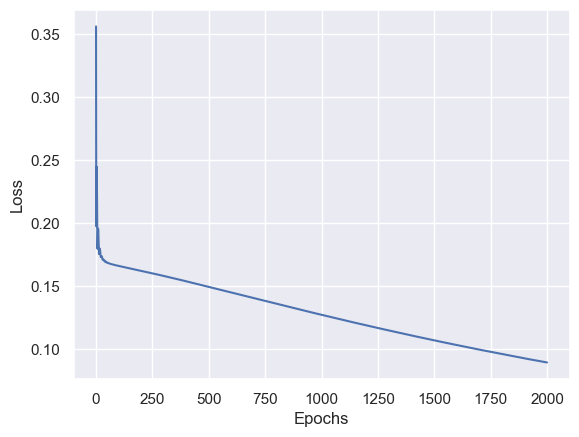

In [120]:
# plota as loss para ver se está treinando
plt.plot(historyMGFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

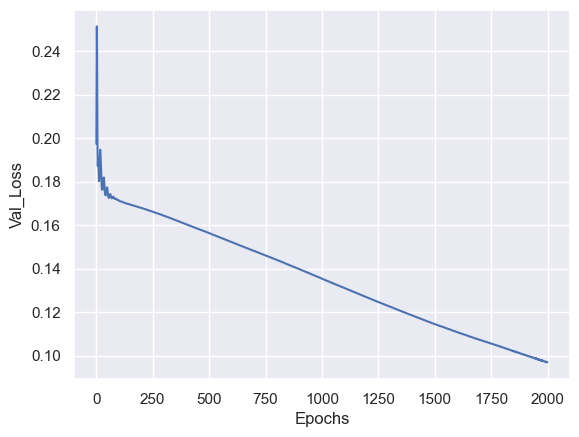

In [121]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyMGFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [122]:
modelMGFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\MGFE-Giants.h5


In [123]:
predMGFE = modelMGFE.predict(X_test)

1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 4ms/step


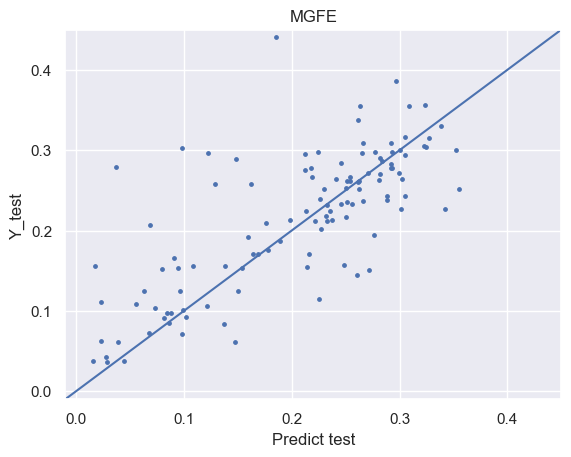

In [160]:
plt.scatter(Y_test[[columnTrain]], predMGFE, s=6)
plt.title(Parametro)
plt.xlim(-0.01, 0.45)
plt.ylim(-0.01, 0.45)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [125]:
score = r2_score(Y_test[columnTrain], predMGFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 46.0%


In [126]:
Y_test['MGFE_predict'] = predMGFE

In [127]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0085_0019351   5050.93     2.429   -0.781        0.100   
iDR4_3_STRIPE82-0006_0021187   4939.77     3.278   -0.233        0.125   
iDR4_3_STRIPE82-0008_0022177   4715.82     2.321   -0.690        0.206   
iDR4_3_SPLUS-s02s23_0002586    4664.33     2.520   -0.433        0.217   
iDR4_3_SPLUS-n05s44_0037296    5213.97     3.351   -0.591        0.059   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0130_0030550   4758.38     2.520   -0.401        0.162   
iDR4_3_STRIPE82-0004_0021650   5090.87     3.427   -0.303        0.154   
iDR4_3_SPLUS-s02s23_0002586    4643.88     2.501   -0.444        0.192   
iDR4_3_STRIPE82-0132_0037300   5481.54     2.869   -1.001        0.209   
iDR4_3_STRIPE82-0134_0035285   4903.08     2.312   -0.604        0.214   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0085_0019351  0.00060 -0.00584  0.18966  0.12192  0.08413   
iDR4_3_STRIPE82-0006_0021187  0.13984  0.08199 -0.00253  0.22732  0.04072   
iDR4_3_STRIPE82-0008_0022177  0.12551  0.21158 -0.02777  0.27152  0.20610   
iDR4_3_SPLUS-s02s23_0002586   0.11889  0.18692  0.06594  0.30839  0.20952   
iDR4_3_SPLUS-n05s44_0037296   0.14198  0.07521  0.04166  0.09914  0.03649   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0130_0030550  0.19900  0.09656  0.07049  0.21585  0.17819   
iDR4_3_STRIPE82-0004_0021650  0.14779  0.15247  0.03833  0.23704  0.12388   
iDR4_3_SPLUS-s02s23_0002586   0.09952  0.17624  0.05140  0.26303  0.19020   
iDR4_3_STRIPE82-0132_0037300  0.01152  0.07769  0.06400  0.26638  0.19381   
iDR4_3_STRIPE82-0134_0035285  0.15979  0.15678  0.10605  0.29186  0.21162   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0085_0019351  0.03775       0.236931     0.074960   
iDR4_3_STRIPE82-0006_0021187  0.05824       0.119353     0.113962   
iDR4_3_STRIPE82-0008_0022177  0.06707       0.128474     0.148594   
iDR4_3_SPLUS-s02s23_0002586   0.10566       0.191741     0.154891   
iDR4_3_SPLUS-n05s44_0037296   0.06461       0.053854     0.099842   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0130_0030550  0.10353       0.180334     0.177887   
iDR4_3_STRIPE82-0004_0021650  0.08799       0.150344     0.070671   
iDR4_3_SPLUS-s02s23_0002586   0.08703       0.191600     0.154849   
iDR4_3_STRIPE82-0132_0037300  0.04946       0.253103     0.116629   
iDR4_3_STRIPE82-0134_0035285  0.06509       0.226863     0.106675   

                              CAFE_predict  NFE_predict  MGFE_predict  
ID                                                                     
iDR4_3_STRIPE82-0085_0019351      0.221684     0.183109      0.296254  
iDR4_3_STRIPE82-0006_0021187      0.088309     0.000113      0.202061  
iDR4_3_STRIPE82-0008_0022177      0.064948    -0.019202      0.150646  
iDR4_3_SPLUS-s02s23_0002586       0.130163     0.102755      0.354819  
iDR4_3_SPLUS-n05s44_0037296       0.057777     0.019135      0.101093  
...                                    ...          ...           ...  
iDR4_3_STRIPE82-0130_0030550      0.129888     0.062791      0.170801  
iDR4_3_STRIPE82-0004_0021650      0.133055    -0.066668      0.212987  
iDR4_3_SPLUS-s02s23_0002586       0.130270     0.102735      0.354764  
iDR4_3_STRIPE82-0132_0037300      0.253496     0.200216      0.308686  
iDR4_3_STRIPE82-0134_0035285      0.192900     0.047233      0.308592  

[121 rows x 15 columns]

In [128]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### SIFE

In [156]:
Parametro = "SIFE"
columnTrain = 'si_fe'

AouG = "Giants"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [130]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s43_0032581    4621.06     2.721    0.049        0.087   
iDR4_3_SPLUS-n03s28_0022725    4915.16     3.345   -0.236        0.105   
iDR4_3_SPLUS-n06s41_0032552    4782.32     2.387   -0.342        0.195   
iDR4_3_SPLUS-n01s38_0009714    5031.46     2.494   -0.726        0.187   
iDR4_3_STRIPE82-0132_0031788   4705.35     2.332   -0.292        0.155   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n05s44_0037296    5154.54     3.250   -0.579        0.049   
iDR4_3_SPLUS-n06s44_0004132    4916.93     3.109   -0.388        0.201   
iDR4_3_SPLUS-n01s28_0034030    4760.56     2.942   -0.248        0.188   
iDR4_3_SPLUS-n02n27_0037228    4794.98     2.741   -0.492        0.188   
iDR4_3_SPLUS-n06s42_0005899    4034.96     1.026   -1.068        0.288   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s43_0032581   0.14650  0.05069  0.15441  0.14531  0.08344   
iDR4_3_SPLUS-n03s28_0022725   0.08444  0.10858 -0.08554  0.16891  0.08693   
iDR4_3_SPLUS-n06s41_0032552   0.18332  0.12514  0.04605  0.26762  0.21114   
iDR4_3_SPLUS-n01s38_0009714   0.07441  0.11427  0.16901  0.26308  0.17898   
iDR4_3_STRIPE82-0132_0031788  0.14501  0.09157  0.11296  0.22066  0.15755   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n05s44_0037296   0.09404  0.05752  0.02645  0.08959  0.01584   
iDR4_3_SPLUS-n06s44_0004132   0.12854  0.20141  0.03762  0.29212  0.18138   
iDR4_3_SPLUS-n01s28_0034030   0.12487  0.15327  0.06312  0.27966  0.16952   
iDR4_3_SPLUS-n02n27_0037228   0.18303  0.16797 -0.00265  0.26885  0.17485   
iDR4_3_SPLUS-n06s42_0005899  -0.04898  0.27867  0.17740  0.37943  0.30575   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-n06s43_0032581   0.07233  
iDR4_3_SPLUS-n03s28_0022725   0.06500  
iDR4_3_SPLUS-n06s41_0032552   0.08854  
iDR4_3_SPLUS-n01s38_0009714   0.08427  
iDR4_3_STRIPE82-0132_0031788  0.06102  
...                               ...  
iDR4_3_SPLUS-n05s44_0037296   0.06125  
iDR4_3_SPLUS-n06s44_0004132   0.06613  
iDR4_3_SPLUS-n01s28_0034030   0.08634  
iDR4_3_SPLUS-n02n27_0037228   0.08755  
iDR4_3_SPLUS-n06s42_0005899   0.02684  

[432 rows x 10 columns]

In [131]:
modelSIFE = training_model()

In [132]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historySIFE = modelSIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 1.2680 - val_loss: 0.5219 - 625ms/epoch - 625ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.6592 - val_loss: 0.2675 - 59ms/epoch - 59ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.3160 - val_loss: 0.2040 - 70ms/epoch - 70ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.1967 - val_loss: 0.2483 - 58ms/epoch - 58ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.2206 - val_loss: 0.3142 - 53ms/epoch - 53ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.2865 - val_loss: 0.3511 - 56ms/epoch - 56ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.3273 - val_loss: 0.3505 - 42ms/epoch - 42ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.3292 - val_loss: 0.3236 - 43ms/epoch - 43ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.3035 - val_loss: 0.2844 - 56ms/epoch - 56ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.2661 - val_loss: 0.2455 - 45ms/epoch - 45ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.2289 - val_loss: 0.2140 - 47ms/epoch - 47ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.2003 - val_loss: 0.1929 - 51ms/epoch - 51ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.183

Text(0, 0.5, 'Loss')

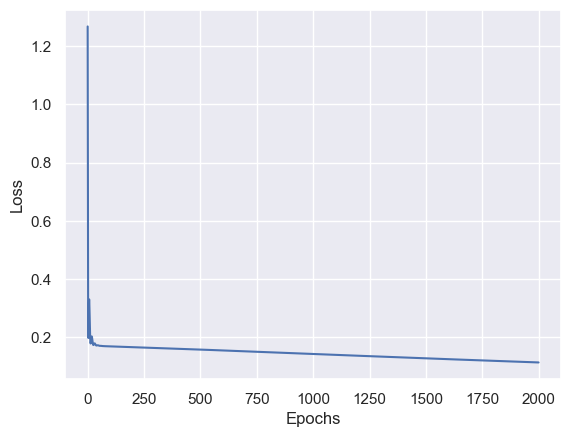

In [133]:
# plota as loss para ver se está treinando
plt.plot(historySIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

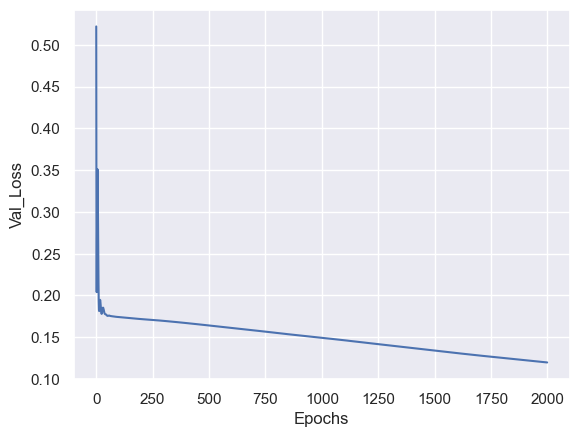

In [134]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historySIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [135]:
modelSIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\SIFE-Giants.h5


In [136]:
predSIFE = modelSIFE.predict(X_test)

4/4 [==============================] - 0s 13ms/step


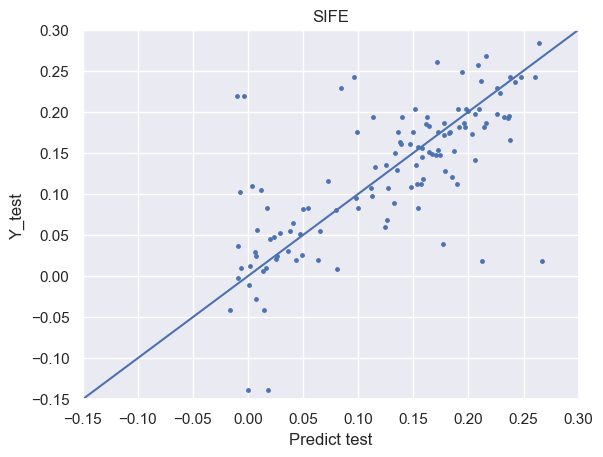

In [157]:
plt.scatter(Y_test[[columnTrain]], predSIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.15, 0.3)
plt.ylim(-0.15, 0.3)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [138]:
score = r2_score(Y_test[columnTrain], predSIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 36.0%


In [139]:
Y_test[f'{Parametro}_predict'] = predSIFE

In [140]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0085_0019351   5050.93     2.429   -0.781        0.100   
iDR4_3_STRIPE82-0006_0021187   4939.77     3.278   -0.233        0.125   
iDR4_3_STRIPE82-0008_0022177   4715.82     2.321   -0.690        0.206   
iDR4_3_SPLUS-s02s23_0002586    4664.33     2.520   -0.433        0.217   
iDR4_3_SPLUS-n05s44_0037296    5213.97     3.351   -0.591        0.059   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0130_0030550   4758.38     2.520   -0.401        0.162   
iDR4_3_STRIPE82-0004_0021650   5090.87     3.427   -0.303        0.154   
iDR4_3_SPLUS-s02s23_0002586    4643.88     2.501   -0.444        0.192   
iDR4_3_STRIPE82-0132_0037300   5481.54     2.869   -1.001        0.209   
iDR4_3_STRIPE82-0134_0035285   4903.08     2.312   -0.604        0.214   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0085_0019351  0.00060 -0.00584  0.18966  0.12192  0.08413   
iDR4_3_STRIPE82-0006_0021187  0.13984  0.08199 -0.00253  0.22732  0.04072   
iDR4_3_STRIPE82-0008_0022177  0.12551  0.21158 -0.02777  0.27152  0.20610   
iDR4_3_SPLUS-s02s23_0002586   0.11889  0.18692  0.06594  0.30839  0.20952   
iDR4_3_SPLUS-n05s44_0037296   0.14198  0.07521  0.04166  0.09914  0.03649   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0130_0030550  0.19900  0.09656  0.07049  0.21585  0.17819   
iDR4_3_STRIPE82-0004_0021650  0.14779  0.15247  0.03833  0.23704  0.12388   
iDR4_3_SPLUS-s02s23_0002586   0.09952  0.17624  0.05140  0.26303  0.19020   
iDR4_3_STRIPE82-0132_0037300  0.01152  0.07769  0.06400  0.26638  0.19381   
iDR4_3_STRIPE82-0134_0035285  0.15979  0.15678  0.10605  0.29186  0.21162   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0085_0019351  0.03775       0.236931     0.074960   
iDR4_3_STRIPE82-0006_0021187  0.05824       0.119353     0.113962   
iDR4_3_STRIPE82-0008_0022177  0.06707       0.128474     0.148594   
iDR4_3_SPLUS-s02s23_0002586   0.10566       0.191741     0.154891   
iDR4_3_SPLUS-n05s44_0037296   0.06461       0.053854     0.099842   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0130_0030550  0.10353       0.180334     0.177887   
iDR4_3_STRIPE82-0004_0021650  0.08799       0.150344     0.070671   
iDR4_3_SPLUS-s02s23_0002586   0.08703       0.191600     0.154849   
iDR4_3_STRIPE82-0132_0037300  0.04946       0.253103     0.116629   
iDR4_3_STRIPE82-0134_0035285  0.06509       0.226863     0.106675   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_STRIPE82-0085_0019351      0.221684     0.183109      0.296254   
iDR4_3_STRIPE82-0006_0021187      0.088309     0.000113      0.202061   
iDR4_3_STRIPE82-0008_0022177      0.064948    -0.019202      0.150646   
iDR4_3_SPLUS-s02s23_0002586       0.130163     0.102755      0.354819   
iDR4_3_SPLUS-n05s44_0037296       0.057777     0.019135      0.101093   
...                                    ...          ...           ...   
iDR4_3_STRIPE82-0130_0030550      0.129888     0.062791      0.170801   
iDR4_3_STRIPE82-0004_0021650      0.133055    -0.066668      0.212987   
iDR4_3_SPLUS-s02s23_0002586       0.130270     0.102735      0.354764   
iDR4_3_STRIPE82-0132_0037300      0.253496     0.200216      0.308686   
iDR4_3_STRIPE82-0134_0035285      0.192900     0.047233      0.308592   

                              SIFE_predict  
ID                                          
iDR4_3_STRIPE82-0085_0019351      0.228536  
iDR4_3_STRIPE82-0006_0021187      0.064726  
iDR4_3_STRIPE82-0008_0022177      0.1

In [141]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")

### NIFE

In [142]:
Parametro = "NIFE"
columnTrain = 'ni_fe'

AouG = "Giants"
NomeBase = "Galah"
BaseSaveModel = "Galah"

In [143]:
Y_train

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_SPLUS-n06s43_0032581    4621.06     2.721    0.049        0.087   
iDR4_3_SPLUS-n03s28_0022725    4915.16     3.345   -0.236        0.105   
iDR4_3_SPLUS-n06s41_0032552    4782.32     2.387   -0.342        0.195   
iDR4_3_SPLUS-n01s38_0009714    5031.46     2.494   -0.726        0.187   
iDR4_3_STRIPE82-0132_0031788   4705.35     2.332   -0.292        0.155   
...                                ...       ...      ...          ...   
iDR4_3_SPLUS-n05s44_0037296    5154.54     3.250   -0.579        0.049   
iDR4_3_SPLUS-n06s44_0004132    4916.93     3.109   -0.388        0.201   
iDR4_3_SPLUS-n01s28_0034030    4760.56     2.942   -0.248        0.188   
iDR4_3_SPLUS-n02n27_0037228    4794.98     2.741   -0.492        0.188   
iDR4_3_SPLUS-n06s42_0005899    4034.96     1.026   -1.068        0.288   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_SPLUS-n06s43_0032581   0.14650  0.05069  0.15441  0.14531  0.08344   
iDR4_3_SPLUS-n03s28_0022725   0.08444  0.10858 -0.08554  0.16891  0.08693   
iDR4_3_SPLUS-n06s41_0032552   0.18332  0.12514  0.04605  0.26762  0.21114   
iDR4_3_SPLUS-n01s38_0009714   0.07441  0.11427  0.16901  0.26308  0.17898   
iDR4_3_STRIPE82-0132_0031788  0.14501  0.09157  0.11296  0.22066  0.15755   
...                               ...      ...      ...      ...      ...   
iDR4_3_SPLUS-n05s44_0037296   0.09404  0.05752  0.02645  0.08959  0.01584   
iDR4_3_SPLUS-n06s44_0004132   0.12854  0.20141  0.03762  0.29212  0.18138   
iDR4_3_SPLUS-n01s28_0034030   0.12487  0.15327  0.06312  0.27966  0.16952   
iDR4_3_SPLUS-n02n27_0037228   0.18303  0.16797 -0.00265  0.26885  0.17485   
iDR4_3_SPLUS-n06s42_0005899  -0.04898  0.27867  0.17740  0.37943  0.30575   

                                ni_fe  
ID                                     
iDR4_3_SPLUS-n06s43_0032581   0.07233  
iDR4_3_SPLUS-n03s28_0022725   0.06500  
iDR4_3_SPLUS-n06s41_0032552   0.08854  
iDR4_3_SPLUS-n01s38_0009714   0.08427  
iDR4_3_STRIPE82-0132_0031788  0.06102  
...                               ...  
iDR4_3_SPLUS-n05s44_0037296   0.06125  
iDR4_3_SPLUS-n06s44_0004132   0.06613  
iDR4_3_SPLUS-n01s28_0034030   0.08634  
iDR4_3_SPLUS-n02n27_0037228   0.08755  
iDR4_3_SPLUS-n06s42_0005899   0.02684  

[432 rows x 10 columns]

In [144]:
modelNIFE = training_model()

In [145]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNIFE = modelNIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 2000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000


1/1 - 1s - loss: 0.2108 - val_loss: 0.1858 - 662ms/epoch - 662ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.1845 - val_loss: 0.1836 - 45ms/epoch - 45ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.1791 - val_loss: 0.1935 - 48ms/epoch - 48ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.1851 - val_loss: 0.1919 - 51ms/epoch - 51ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.1835 - val_loss: 0.1820 - 62ms/epoch - 62ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.1759 - val_loss: 0.1740 - 48ms/epoch - 48ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.1717 - val_loss: 0.1711 - 52ms/epoch - 52ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.1721 - val_loss: 0.1718 - 63ms/epoch - 63ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.1733 - val_loss: 0.1739 - 83ms/epoch - 83ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.1736 - val_loss: 0.1753 - 55ms/epoch - 55ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.1727 - val_loss: 0.1751 - 43ms/epoch - 43ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.1713 - val_loss: 0.1734 - 45ms/epoch - 45ms/step
Epoch 13/2000
1/1 - 0s - loss: 0.169

Text(0, 0.5, 'Loss')

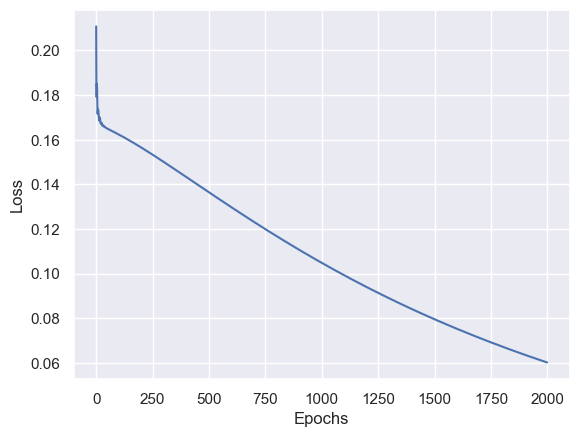

In [146]:
# plota as loss para ver se está treinando
plt.plot(historyNIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

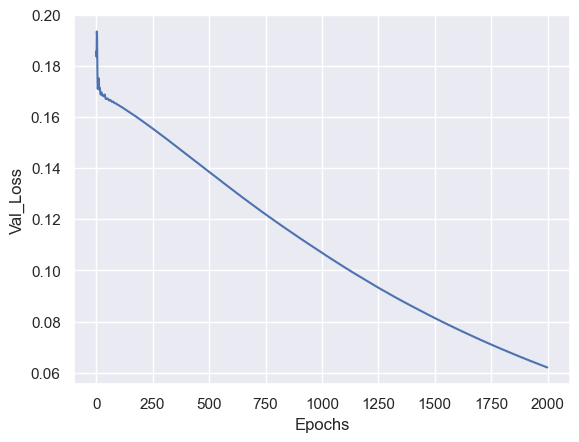

In [147]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [148]:
modelNIFE.save(f'modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5')
print(f"modelo salvo como: modelosPosRio\\{BaseSaveModel}\\{Parametro}-{AouG}.h5")

modelo salvo como: modelosPosRio\Galah\NIFE-Giants.h5


In [149]:
predNIFE = modelNIFE.predict(X_test)

4/4 [==============================] - 0s 2ms/step


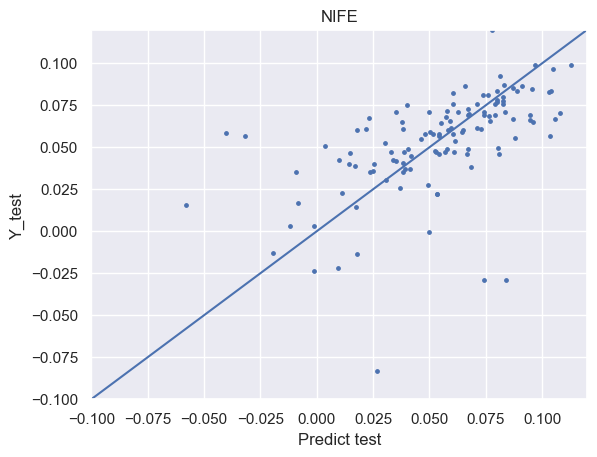

In [155]:
plt.scatter(Y_test[[columnTrain]], predNIFE, s=6)
plt.title(Parametro)
plt.xlim(-0.1, 0.12)
plt.ylim(-0.1, 0.12)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [151]:
score = r2_score(Y_test[columnTrain], predNIFE)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 20.0%


In [152]:
Y_test[f'{Parametro}_predict'] = predNIFE

In [153]:
Y_test

teff_cnn  logg_cnn  feh_cnn  alpha_m_cnn  \
ID                                                                       
iDR4_3_STRIPE82-0085_0019351   5050.93     2.429   -0.781        0.100   
iDR4_3_STRIPE82-0006_0021187   4939.77     3.278   -0.233        0.125   
iDR4_3_STRIPE82-0008_0022177   4715.82     2.321   -0.690        0.206   
iDR4_3_SPLUS-s02s23_0002586    4664.33     2.520   -0.433        0.217   
iDR4_3_SPLUS-n05s44_0037296    5213.97     3.351   -0.591        0.059   
...                                ...       ...      ...          ...   
iDR4_3_STRIPE82-0130_0030550   4758.38     2.520   -0.401        0.162   
iDR4_3_STRIPE82-0004_0021650   5090.87     3.427   -0.303        0.154   
iDR4_3_SPLUS-s02s23_0002586    4643.88     2.501   -0.444        0.192   
iDR4_3_STRIPE82-0132_0037300   5481.54     2.869   -1.001        0.209   
iDR4_3_STRIPE82-0134_0035285   4903.08     2.312   -0.604        0.214   

                                 c_fe    ca_fe     n_fe    mg_fe    si_fe  \
ID                                                                          
iDR4_3_STRIPE82-0085_0019351  0.00060 -0.00584  0.18966  0.12192  0.08413   
iDR4_3_STRIPE82-0006_0021187  0.13984  0.08199 -0.00253  0.22732  0.04072   
iDR4_3_STRIPE82-0008_0022177  0.12551  0.21158 -0.02777  0.27152  0.20610   
iDR4_3_SPLUS-s02s23_0002586   0.11889  0.18692  0.06594  0.30839  0.20952   
iDR4_3_SPLUS-n05s44_0037296   0.14198  0.07521  0.04166  0.09914  0.03649   
...                               ...      ...      ...      ...      ...   
iDR4_3_STRIPE82-0130_0030550  0.19900  0.09656  0.07049  0.21585  0.17819   
iDR4_3_STRIPE82-0004_0021650  0.14779  0.15247  0.03833  0.23704  0.12388   
iDR4_3_SPLUS-s02s23_0002586   0.09952  0.17624  0.05140  0.26303  0.19020   
iDR4_3_STRIPE82-0132_0037300  0.01152  0.07769  0.06400  0.26638  0.19381   
iDR4_3_STRIPE82-0134_0035285  0.15979  0.15678  0.10605  0.29186  0.21162   

                                ni_fe  alpha_predict  CFE_predict  \
ID                                                                  
iDR4_3_STRIPE82-0085_0019351  0.03775       0.236931     0.074960   
iDR4_3_STRIPE82-0006_0021187  0.05824       0.119353     0.113962   
iDR4_3_STRIPE82-0008_0022177  0.06707       0.128474     0.148594   
iDR4_3_SPLUS-s02s23_0002586   0.10566       0.191741     0.154891   
iDR4_3_SPLUS-n05s44_0037296   0.06461       0.053854     0.099842   
...                               ...            ...          ...   
iDR4_3_STRIPE82-0130_0030550  0.10353       0.180334     0.177887   
iDR4_3_STRIPE82-0004_0021650  0.08799       0.150344     0.070671   
iDR4_3_SPLUS-s02s23_0002586   0.08703       0.191600     0.154849   
iDR4_3_STRIPE82-0132_0037300  0.04946       0.253103     0.116629   
iDR4_3_STRIPE82-0134_0035285  0.06509       0.226863     0.106675   

                              CAFE_predict  NFE_predict  MGFE_predict  \
ID                                                                      
iDR4_3_STRIPE82-0085_0019351      0.221684     0.183109      0.296254   
iDR4_3_STRIPE82-0006_0021187      0.088309     0.000113      0.202061   
iDR4_3_STRIPE82-0008_0022177      0.064948    -0.019202      0.150646   
iDR4_3_SPLUS-s02s23_0002586       0.130163     0.102755      0.354819   
iDR4_3_SPLUS-n05s44_0037296       0.057777     0.019135      0.101093   
...                                    ...          ...           ...   
iDR4_3_STRIPE82-0130_0030550      0.129888     0.062791      0.170801   
iDR4_3_STRIPE82-0004_0021650      0.133055    -0.066668      0.212987   
iDR4_3_SPLUS-s02s23_0002586       0.130270     0.102735      0.354764   
iDR4_3_STRIPE82-0132_0037300      0.253496     0.200216      0.308686   
iDR4_3_STRIPE82-0134_0035285      0.192900     0.047233      0.308592   

                              SIFE_predict  NIFE_predict  
ID                                                        
iDR4_3_STRIPE82-0085_0019351      0.228536      0.064896  
iDR4_3_STRIPE82-0006_0021187      0.0647

In [154]:
Y_test.to_csv(f"E:\\IC\\PredictsTreinos\\{NomeBase}\\{AouG}-{Parametro}Predict.csv")